# Introduction aux Réseaux de Neurones Convolutionnels (CNN)

## Introduction Générale

Les réseaux de neurones convolutionnels (CNN) sont une architecture spécifique de réseaux de neurones profondément utilisée dans le domaine de la vision par ordinateur. Ils sont conçus pour traiter des données ayant une grille de topologie, comme les images, en exploitant les structures spatiales locales.

## Pourquoi les CNN ?

Lorsqu'on travaille avec des images, chaque pixel est étroitement lié à ses voisins immédiats. Les réseaux de neurones traditionnels (entièrement connectés) ne tiennent pas compte de cette structure locale, car chaque neurone est connecté à tous les neurones de la couche précédente. Cela entraîne plusieurs problèmes :

- **Nombre élevé de paramètres** : Les images ont généralement un grand nombre de pixels, ce qui conduit à un nombre colossal de poids à entraîner.
- **Perte de l'information spatiale** : Les relations locales entre les pixels ne sont pas exploitées, ce qui peut affecter les performances du modèle.

Les CNN résolvent ces problèmes en utilisant des **convolutions**, qui permettent de :

- **Réduire le nombre de paramètres** : Les mêmes filtres sont appliqués sur toute l'image, ce qui partage les poids et diminue le nombre total de paramètres.
- **Préserver l'information spatiale locale** : Les filtres capturent les caractéristiques locales, comme les bords, les textures, etc.

## Principe de Base des Convolutions

Une **convolution** consiste à appliquer un filtre (ou noyau) sur une image pour extraire certaines caractéristiques. Le filtre est une petite matrice de poids qui est glissée sur l'image. À chaque position, une opération mathématique (produit élément par élément suivi d'une somme) est effectuée entre le filtre et la région correspondante de l'image.

### Illustration avec un Exemple Simple

Considérons une image en niveaux de gris de taille 5x5 pixels :

```
[[1, 2, 3, 4, 5],
 [5, 6, 7, 8, 9],
 [9, 8, 7, 6, 5],
 [5, 4, 3, 2, 1],
 [1, 2, 3, 4, 5]]
```

Et un filtre de détection de bords horizontaux de taille 3x3 :

```
[[-1, -1, -1],
 [ 0,  0,  0],
 [ 1,  1,  1]]
```

### Application du Filtre

1. **Positionnement du Filtre** : On place le filtre sur le coin supérieur gauche de l'image.
2. **Calcul de la Convolution** : On multiplie chaque élément du filtre par l'élément correspondant de l'image, puis on somme les résultats.
3. **Déplacement du Filtre** : On déplace le filtre d'un pixel vers la droite et on répète le processus jusqu'à avoir couvert toute l'image.

### Implémentation avec TensorFlow

Pour visualiser cette opération, nous allons utiliser TensorFlow pour appliquer le filtre à l'image.

#### Code Python avec TensorFlow

```python
import tensorflow as tf
import numpy as np

# Définition de l'image d'entrée (5x5)
image = np.array([[1, 2, 3, 4, 5],
                  [5, 6, 7, 8, 9],
                  [9, 8, 7, 6, 5],
                  [5, 4, 3, 2, 1],
                  [1, 2, 3, 4, 5]], dtype=np.float32)

# Reshape pour correspondre au format [batch_size, height, width, channels]
image = image.reshape((1, 5, 5, 1))

# Définition du filtre (3x3)
kernel = np.array([[-1, -1, -1],
                   [ 0,  0,  0],
                   [ 1,  1,  1]], dtype=np.float32)

# Reshape pour correspondre au format [height, width, in_channels, out_channels]
kernel = kernel.reshape((3, 3, 1, 1))

# Conversion en tenseurs TensorFlow
image_tf = tf.constant(image)
kernel_tf = tf.constant(kernel)

# Application de la convolution
convolved = tf.nn.conv2d(image_tf, kernel_tf, strides=[1, 1, 1, 1], padding='VALID')

# Résultat de la convolution
result = convolved.numpy().squeeze()

print("Résultat de la convolution :")
print(result)
```

#### Explication du Code

- **image.reshape((1, 5, 5, 1))** : TensorFlow attend les données sous la forme `[batch_size, height, width, channels]`. Nous avons une seule image (`batch_size=1`) en niveaux de gris (`channels=1`).
- **kernel.reshape((3, 3, 1, 1))** : Les filtres sont de la forme `[height, width, in_channels, out_channels]`. Notre filtre est 2D (`height=3`, `width=3`), s'applique sur une seule couche d'entrée (`in_channels=1`) et produit une seule couche de sortie (`out_channels=1`).
- **tf.nn.conv2d** : Fonction de convolution 2D de TensorFlow.
  - **strides=[1, 1, 1, 1]** : Nous déplaçons le filtre d'un pixel à la fois en hauteur et en largeur.
  - **padding='VALID'** : Aucune extension des bords de l'image; la sortie est donc plus petite que l'entrée.

#### Interprétation du Résultat

Le résultat de la convolution est une nouvelle matrice qui met en évidence les bords horizontaux de l'image originale. Les valeurs élevées dans la matrice résultante correspondent aux zones où il y a un changement significatif de pixels en horizontal.

## Conclusion

Cet exemple simple illustre comment un seul filtre peut extraire des caractéristiques spécifiques d'une image, en l'occurrence les bords horizontaux. Cette opération fondamentale est au cœur des CNN et permet de construire des modèles capables de comprendre et d'interpréter le contenu des images en capturant des caractéristiques de plus en plus complexes à travers des couches successives.

---

Dans les prochaines sections, nous approfondirons la construction des CNN en ajoutant plusieurs filtres, en explorant les couches de pooling, et en construisant des architectures complètes pour des tâches de classification et de détection d'objets.



---



---



---



---



#llustration avec un Exemple Simple
Considérons une image en niveaux de gris de taille 5x5 pixels :

```
[[1, 2, 3, 4, 5],
 [5, 6, 7, 8, 9],
 [9, 8, 7, 6, 5],
 [5, 4, 3, 2, 1],
 [1, 2, 3, 4, 5]]
```

Et un filtre de détection de bords horizontaux de taille 3x3 :

```
[[-1, -1, -1],
 [ 0,  0,  0],
 [ 1,  1,  1]]
```


In [ ]:
import tensorflow as tf
import numpy as np

# Définition de l'image d'entrée (5x5)
image = np.array([[1, 2, 3, 4, 5],
                  [5, 6, 7, 8, 9],
                  [9, 8, 7, 6, 5],
                  [5, 4, 3, 2, 1],
                  [1, 2, 3, 4, 5]], dtype=np.float32)

# Reshape pour correspondre au format [batch_size, height, width, channels]
image = image.reshape((1, 5, 5, 1))

# Définition du filtre (3x3)
kernel = np.array([[-1, -1, -1],
                   [ 0,  0,  0],
                   [ 1,  1,  1]], dtype=np.float32)

# Reshape pour correspondre au format [height, width, in_channels, out_channels]
kernel = kernel.reshape((3, 3, 1, 1))

# Conversion en tenseurs TensorFlow
image_tf = tf.constant(image)
kernel_tf = tf.constant(kernel)

# Application de la convolution
convolved = tf.nn.conv2d(image_tf, kernel_tf, strides=[1, 1, 1, 1], padding='VALID')

# Résultat de la convolution
result = convolved.numpy().squeeze()

print("Résultat de la convolution :")
print(result)


Résultat de la convolution :
[[ 18.  12.   6.]
 [ -6. -12. -18.]
 [-18. -12.  -6.]]


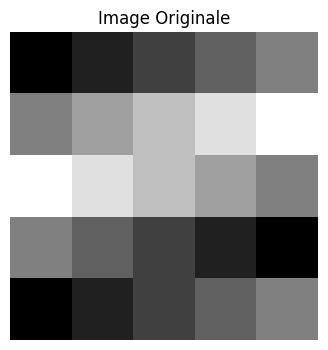

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Définition de l'image d'entrée (5x5)
image = np.array([[1, 2, 3, 4, 5],
                  [5, 6, 7, 8, 9],
                  [9, 8, 7, 6, 5],
                  [5, 4, 3, 2, 1],
                  [1, 2, 3, 4, 5]], dtype=np.float32)

# Affichage de l'image originale
plt.figure(figsize=(4, 4))
plt.imshow(image, cmap='gray', interpolation='nearest')
plt.title("Image Originale")
plt.axis('off')
plt.show()


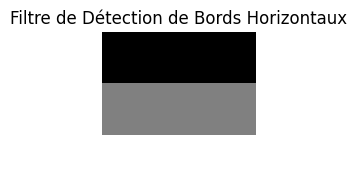

In [ ]:
# Définition du filtre (3x3)
kernel = np.array([[-1, -1, -1],
                   [ 0,  0,  0],
                   [ 1,  1,  1]], dtype=np.float32)

# Affichage du filtre
plt.figure(figsize=(2, 2))
plt.imshow(kernel, cmap='gray', interpolation='nearest')
plt.title("Filtre de Détection de Bords Horizontaux")
plt.axis('off')
plt.show()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


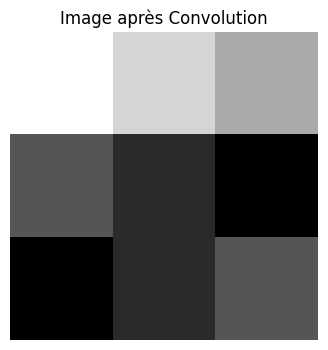

In [ ]:
import tensorflow as tf

# Reshape pour correspondre au format [batch_size, height, width, channels]
image_tf = image.reshape((1, 5, 5, 1))
kernel_tf = kernel.reshape((3, 3, 1, 1))

# Application de la convolution
convolved = tf.nn.conv2d(image_tf, kernel_tf, strides=[1, 1, 1, 1], padding='VALID')
result = convolved.numpy().squeeze()

# Affichage du résultat de la convolution
plt.figure(figsize=(4, 4))
plt.imshow(result, cmap='gray', interpolation='nearest')
plt.title("Image après Convolution")
plt.axis('off')
plt.show()


#Comparaison des deux images

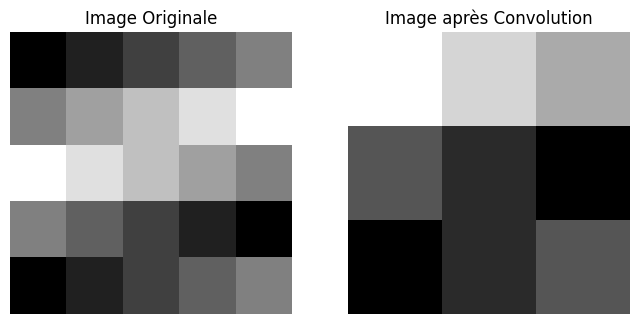

In [ ]:
# Affichage côte à côte
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Image originale
axs[0].imshow(image, cmap='gray', interpolation='nearest')
axs[0].set_title('Image Originale')
axs[0].axis('off')

# Image après convolution
axs[1].imshow(result, cmap='gray', interpolation='nearest')
axs[1].set_title('Image après Convolution')
axs[1].axis('off')

plt.show()


##Analyse
Image Originale : Représente les valeurs de pixels initiales.
Image après Convolution : Montre les zones où le filtre a détecté des bords horizontaux.
Extension à une Image Réelle
Pour mieux visualiser l'effet du filtre, appliquons-le à une image réelle.

##Chargement de l'Image
Vous pouvez utiliser une image de votre choix ou en charger une depuis une URL.

In [ ]:

from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


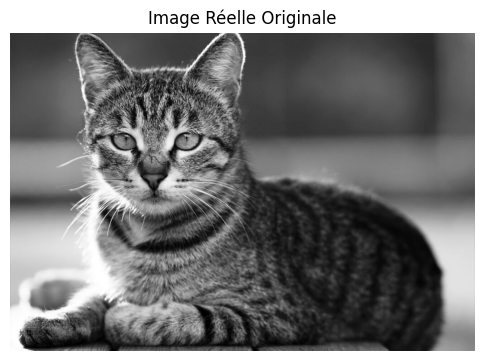

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Chemin vers l'image sur Google Drive
chemin_image = '/content/drive/MyDrive/cat.jpg'

# Chargement de l'image en niveaux de gris
img = Image.open(chemin_image).convert('L')
image_real = np.array(img, dtype=np.float32)

# Affichage de l'image réelle originale
plt.figure(figsize=(6, 6))
plt.imshow(image_real, cmap='gray')
plt.title("Image Réelle Originale")
plt.axis('off')
plt.show()


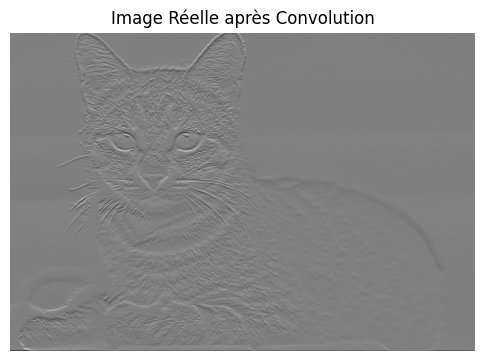

In [ ]:
import tensorflow as tf

# Définition du filtre (3x3)
kernel = np.array([[-1, -1, -1],
                   [ 0,  0,  0],
                   [ 1,  1,  1]], dtype=np.float32)

# Reshape pour correspondre au format attendu
kernel_tf = kernel.reshape((3, 3, 1, 1))

# Reshape de l'image réelle
image_real_tf = image_real.reshape((1, image_real.shape[0], image_real.shape[1], 1))

# Application de la convolution avec padding pour conserver la taille
convolved_real = tf.nn.conv2d(image_real_tf, kernel_tf, strides=[1, 1, 1, 1], padding='SAME')
result_real = convolved_real.numpy().squeeze()

# Affichage de l'image après convolution
plt.figure(figsize=(6, 6))
plt.imshow(result_real, cmap='gray')
plt.title("Image Réelle après Convolution")
plt.axis('off')
plt.show()


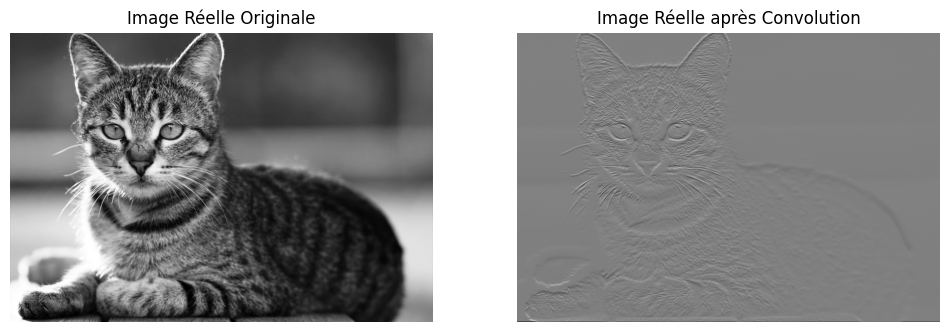

In [ ]:
# Affichage côte à côte des images
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Image originale
axs[0].imshow(image_real, cmap='gray')
axs[0].set_title('Image Réelle Originale')
axs[0].axis('off')

# Image après convolution
axs[1].imshow(result_real, cmap='gray')
axs[1].set_title('Image Réelle après Convolution')
axs[1].axis('off')

plt.show()


# Code 1 : Application Individuelle de Plusieurs Filtres sur une Image

Ce code charge une image depuis Google Drive, applique plusieurs filtres individuellement, et affiche les résultats pour chaque filtre afin de visualiser l'effet de chacun sur l'image.

```python
# Montage de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

# Chargement de l'image depuis Google Drive
chemin_image = '/content/drive/MyDrive/Images/mon_image.png'  # Mettez le chemin vers votre image
img = Image.open(chemin_image).convert('L')  # Conversion en niveaux de gris
image_real = np.array(img, dtype=np.float32)
image_real = image_real / 255.0  # Normalisation entre 0 et 1

# Affichage de l'image originale
plt.figure(figsize=(6, 6))
plt.imshow(image_real, cmap='gray')
plt.title("Image Réelle Originale")
plt.axis('off')
plt.show()

# Définition des filtres
kernel_horizontal = np.array([[-1, -1, -1],
                              [ 0,  0,  0],
                              [ 1,  1,  1]], dtype=np.float32)

kernel_vertical = np.array([[-1,  0,  1],
                            [-1,  0,  1],
                            [-1,  0,  1]], dtype=np.float32)

kernel_sobel_horizontal = np.array([[-1, -2, -1],
                                    [ 0,  0,  0],
                                    [ 1,  2,  1]], dtype=np.float32)

kernel_sobel_vertical = np.array([[-1,  0,  1],
                                  [-2,  0,  2],
                                  [-1,  0,  1]], dtype=np.float32)

kernel_laplacian = np.array([[ 0, -1,  0],
                             [-1,  4, -1],
                             [ 0, -1,  0]], dtype=np.float32)

kernel_blur = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]], dtype=np.float32)

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]], dtype=np.float32)

# Fonction pour appliquer un filtre
def apply_filter(image, kernel):
    kernel_tf = kernel.reshape((kernel.shape[0], kernel.shape[1], 1, 1))
    image_tf = image.reshape((1, image.shape[0], image.shape[1], 1))
    convolved = tf.nn.conv2d(image_tf, kernel_tf, strides=[1, 1, 1, 1], padding='SAME')
    result = convolved.numpy().squeeze()
    return result

# Fonction pour afficher le résultat
def display_result(image, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Application et affichage des résultats pour chaque filtre
result_horizontal = apply_filter(image_real, kernel_horizontal)
display_result(result_horizontal, "Détection de Bords Horizontaux")

result_vertical = apply_filter(image_real, kernel_vertical)
display_result(result_vertical, "Détection de Bords Verticaux")

result_sobel_horizontal = apply_filter(image_real, kernel_sobel_horizontal)
display_result(result_sobel_horizontal, "Filtre de Sobel Horizontal")

result_sobel_vertical = apply_filter(image_real, kernel_sobel_vertical)
display_result(result_sobel_vertical, "Filtre de Sobel Vertical")

result_laplacian = apply_filter(image_real, kernel_laplacian)
display_result(result_laplacian, "Filtre de Laplacien")

result_blur = apply_filter(image_real, kernel_blur)
display_result(result_blur, "Filtre de Lissage (Flou)")

result_sharpen = apply_filter(image_real, kernel_sharpen)
display_result(result_sharpen, "Filtre de Renforcement (Sharpening)")
```

**Instructions :**

- Assurez-vous que le chemin vers votre image (`chemin_image`) est correct.
- Exécutez chaque cellule dans l'ordre pour voir les résultats.
- Chaque filtre est appliqué individuellement, et le résultat est affiché immédiatement après.



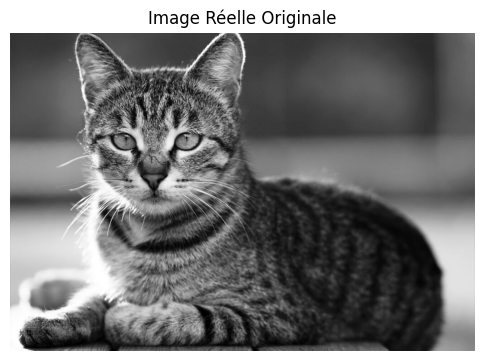

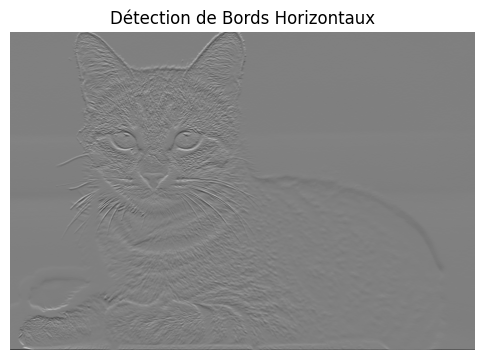

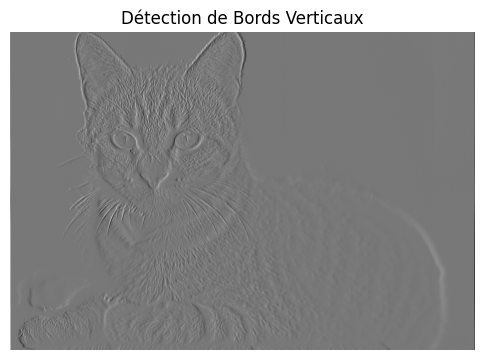

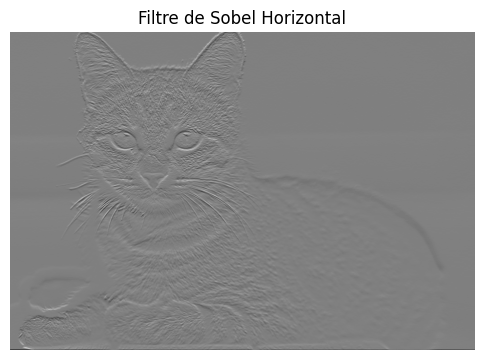

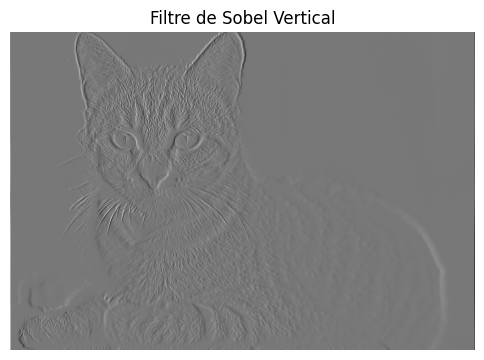

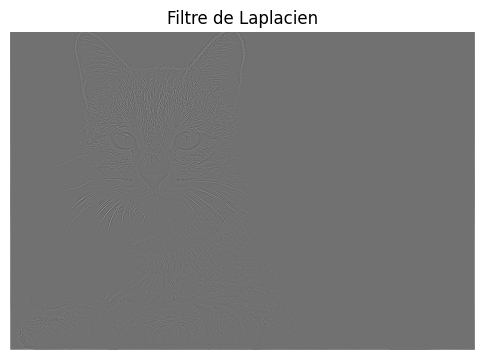

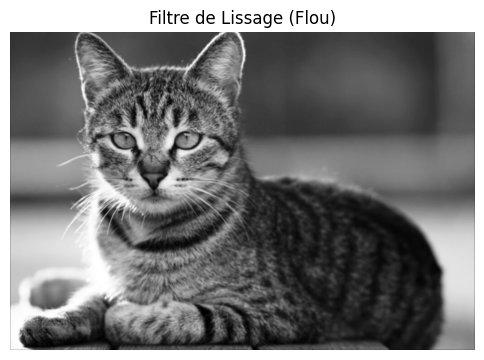

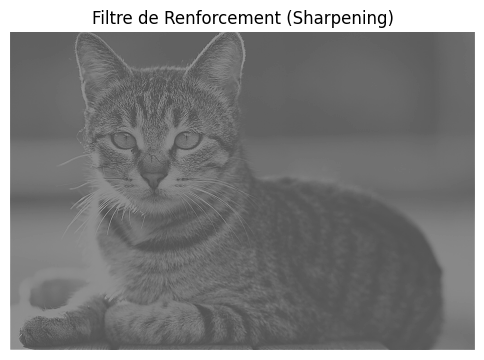

In [ ]:


# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

# Chargement de l'image depuis Google Drive (mettez votre chemin)
chemin_image = '/content/drive/MyDrive/cat.jpg'
img = Image.open(chemin_image).convert('L')  # Conversion en niveaux de gris
image_real = np.array(img, dtype=np.float32)
image_real = image_real / 255.0  # Normalisation entre 0 et 1

# Affichage de l'image originale
plt.figure(figsize=(6, 6))
plt.imshow(image_real, cmap='gray')
plt.title("Image Réelle Originale")
plt.axis('off')
plt.show()

# Définition des filtres
kernel_horizontal = np.array([[-1, -1, -1],
                              [ 0,  0,  0],
                              [ 1,  1,  1]], dtype=np.float32)

kernel_vertical = np.array([[-1,  0,  1],
                            [-1,  0,  1],
                            [-1,  0,  1]], dtype=np.float32)

kernel_sobel_horizontal = np.array([[-1, -2, -1],
                                    [ 0,  0,  0],
                                    [ 1,  2,  1]], dtype=np.float32)

kernel_sobel_vertical = np.array([[-1,  0,  1],
                                  [-2,  0,  2],
                                  [-1,  0,  1]], dtype=np.float32)

kernel_laplacian = np.array([[ 0, -1,  0],
                             [-1,  4, -1],
                             [ 0, -1,  0]], dtype=np.float32)

kernel_blur = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]], dtype=np.float32)

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]], dtype=np.float32)

# Fonction pour appliquer un filtre
def apply_filter(image, kernel):
    kernel_tf = kernel.reshape((kernel.shape[0], kernel.shape[1], 1, 1))
    image_tf = image.reshape((1, image.shape[0], image.shape[1], 1))
    convolved = tf.nn.conv2d(image_tf, kernel_tf, strides=[1, 1, 1, 1], padding='SAME')
    result = convolved.numpy().squeeze()
    return result

# Fonction pour afficher le résultat
def display_result(image, title):
    plt.figure(figsize=(6, 6))
    plt.imshow(image, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Application et affichage des résultats pour chaque filtre
result_horizontal = apply_filter(image_real, kernel_horizontal)
display_result(result_horizontal, "Détection de Bords Horizontaux")

result_vertical = apply_filter(image_real, kernel_vertical)
display_result(result_vertical, "Détection de Bords Verticaux")

result_sobel_horizontal = apply_filter(image_real, kernel_sobel_horizontal)
display_result(result_sobel_horizontal, "Filtre de Sobel Horizontal")

result_sobel_vertical = apply_filter(image_real, kernel_sobel_vertical)
display_result(result_sobel_vertical, "Filtre de Sobel Vertical")

result_laplacian = apply_filter(image_real, kernel_laplacian)
display_result(result_laplacian, "Filtre de Laplacien")

result_blur = apply_filter(image_real, kernel_blur)
display_result(result_blur, "Filtre de Lissage (Flou)")

result_sharpen = apply_filter(image_real, kernel_sharpen)
display_result(result_sharpen, "Filtre de Renforcement (Sharpening)")


---

# Code 2 : Application Simultanée de Plusieurs Filtres pour Simuler une Couche Convolutionnelle

Ce code charge la même image, applique plusieurs filtres simultanément pour simuler une couche convolutionnelle avec plusieurs canaux de sortie, puis affiche tous les résultats ensemble.

```python
# Montage de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

# Chargement de l'image depuis Google Drive
chemin_image = '/content/drive/MyDrive/Images/mon_image.png'  # Mettez le chemin vers votre image
img = Image.open(chemin_image).convert('L')  # Conversion en niveaux de gris
image_real = np.array(img, dtype=np.float32)
image_real = image_real / 255.0  # Normalisation entre 0 et 1

# Affichage de l'image originale
plt.figure(figsize=(6, 6))
plt.imshow(image_real, cmap='gray')
plt.title("Image Réelle Originale")
plt.axis('off')
plt.show()

# Définition des filtres
kernel_horizontal = np.array([[-1, -1, -1],
                              [ 0,  0,  0],
                              [ 1,  1,  1]], dtype=np.float32)

kernel_vertical = np.array([[-1,  0,  1],
                            [-1,  0,  1],
                            [-1,  0,  1]], dtype=np.float32)

kernel_sobel_horizontal = np.array([[-1, -2, -1],
                                    [ 0,  0,  0],
                                    [ 1,  2,  1]], dtype=np.float32)

kernel_sobel_vertical = np.array([[-1,  0,  1],
                                  [-2,  0,  2],
                                  [-1,  0,  1]], dtype=np.float32)

kernel_laplacian = np.array([[ 0, -1,  0],
                             [-1,  4, -1],
                             [ 0, -1,  0]], dtype=np.float32)

kernel_blur = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]], dtype=np.float32)

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]], dtype=np.float32)

# Empilement des filtres pour une application simultanée
kernels = np.stack([kernel_horizontal,
                    kernel_vertical,
                    kernel_sobel_horizontal,
                    kernel_sobel_vertical,
                    kernel_laplacian,
                    kernel_blur,
                    kernel_sharpen], axis=-1)

# Reshape pour correspondre au format attendu [height, width, in_channels, out_channels]
kernels_tf = kernels.reshape((3, 3, 1, -1))
image_tf = image_real.reshape((1, image_real.shape[0], image_real.shape[1], 1))

# Application de la convolution
convolved = tf.nn.conv2d(image_tf, kernels_tf, strides=[1, 1, 1, 1], padding='SAME')
results_multi = convolved.numpy().squeeze()

# Affichage des résultats
titles = ['Bords Horizontaux', 'Bords Verticaux', 'Sobel Horizontal',
          'Sobel Vertical', 'Laplacien', 'Lissage (Flou)', 'Renforcement']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Affichage de l'image originale
axs[0, 0].imshow(image_real, cmap='gray')
axs[0, 0].set_title('Image Originale')
axs[0, 0].axis('off')

# Affichage des résultats pour chaque filtre
for idx in range(results_multi.shape[-1]):
    row = (idx + 1) // 4
    col = (idx + 1) % 4
    axs[row, col].imshow(results_multi[:, :, idx], cmap='gray')
    axs[row, col].set_title(titles[idx])
    axs[row, col].axis('off')

# Suppression du sous-graphe inutilisé
fig.delaxes(axs[1, 3])

plt.show()
```

**Instructions :**

- Vérifiez que le chemin vers votre image (`chemin_image`) est correct.
- Ce code applique tous les filtres simultanément, simulant une couche convolutionnelle avec plusieurs canaux de sortie.
- Les résultats sont affichés ensemble pour une comparaison facile.

---

**Remarque :**

- Dans les deux codes, assurez-vous que l'image chargée est en niveaux de gris. Si vous souhaitez utiliser une image en couleur, des modifications supplémentaires seront nécessaires pour gérer les canaux de couleur.
- Les filtres définis sont des exemples courants utilisés en traitement d'image pour extraire différentes caractéristiques.
- L'utilisation de `padding='SAME'` dans la fonction `tf.nn.conv2d` permet de conserver la même taille d'image après la convolution.



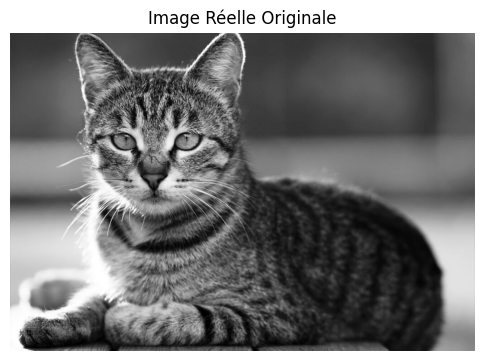

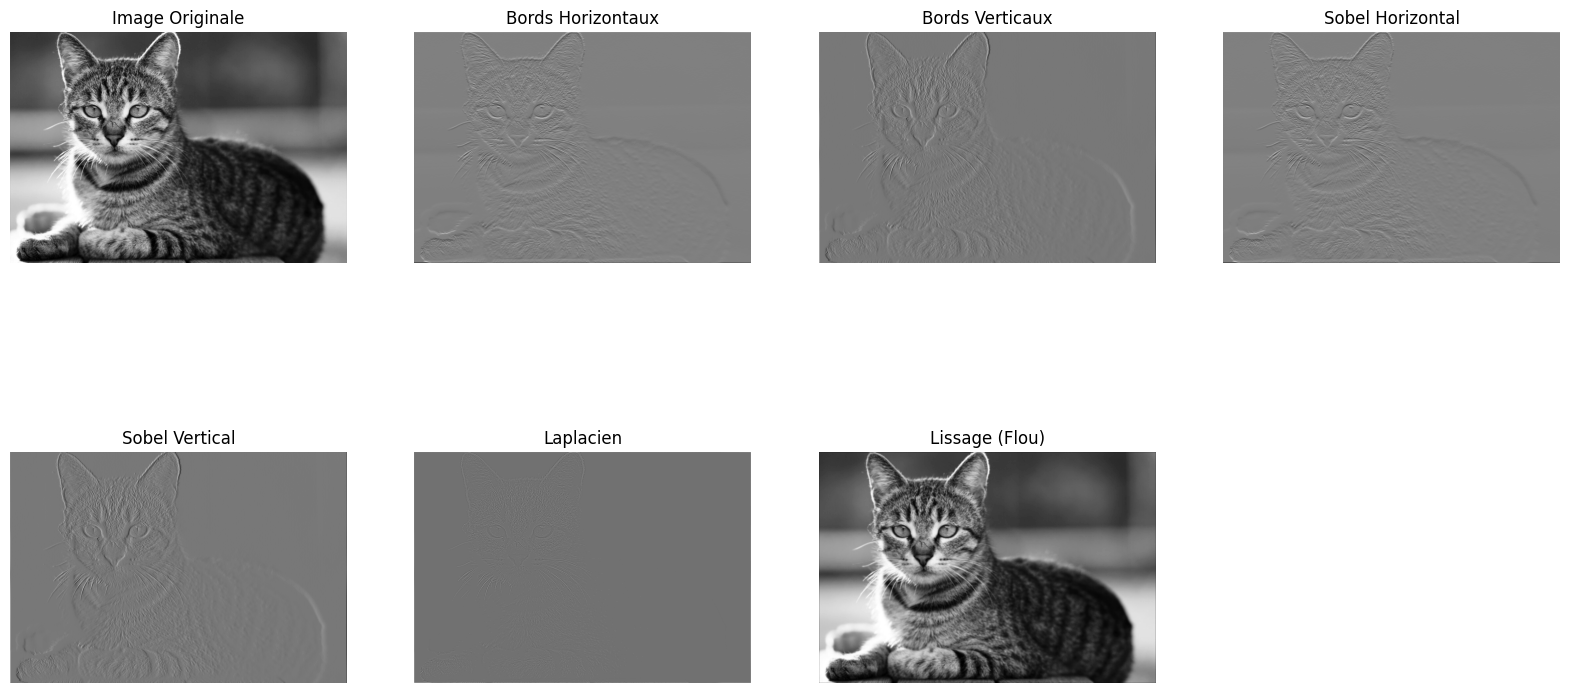

In [ ]:

# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

# Chargement de l'image depuis Google Drive
chemin_image = '/content/drive/MyDrive/cat.jpg'
img = Image.open(chemin_image).convert('L')  # Conversion en niveaux de gris
image_real = np.array(img, dtype=np.float32)
image_real = image_real / 255.0  # Normalisation entre 0 et 1

# Affichage de l'image originale
plt.figure(figsize=(6, 6))
plt.imshow(image_real, cmap='gray')
plt.title("Image Réelle Originale")
plt.axis('off')
plt.show()

# Définition des filtres
kernel_horizontal = np.array([[-1, -1, -1],
                              [ 0,  0,  0],
                              [ 1,  1,  1]], dtype=np.float32)

kernel_vertical = np.array([[-1,  0,  1],
                            [-1,  0,  1],
                            [-1,  0,  1]], dtype=np.float32)

kernel_sobel_horizontal = np.array([[-1, -2, -1],
                                    [ 0,  0,  0],
                                    [ 1,  2,  1]], dtype=np.float32)

kernel_sobel_vertical = np.array([[-1,  0,  1],
                                  [-2,  0,  2],
                                  [-1,  0,  1]], dtype=np.float32)

kernel_laplacian = np.array([[ 0, -1,  0],
                             [-1,  4, -1],
                             [ 0, -1,  0]], dtype=np.float32)

kernel_blur = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]], dtype=np.float32)

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]], dtype=np.float32)

# Empilement des filtres pour une application simultanée
kernels = np.stack([kernel_horizontal,
                    kernel_vertical,
                    kernel_sobel_horizontal,
                    kernel_sobel_vertical,
                    kernel_laplacian,
                    kernel_blur,
                    kernel_sharpen], axis=-1)

# Reshape pour correspondre au format attendu [height, width, in_channels, out_channels]
kernels_tf = kernels.reshape((3, 3, 1, -1))
image_tf = image_real.reshape((1, image_real.shape[0], image_real.shape[1], 1))

# Application de la convolution
convolved = tf.nn.conv2d(image_tf, kernels_tf, strides=[1, 1, 1, 1], padding='SAME')
results_multi = convolved.numpy().squeeze()

# Affichage des résultats
titles = ['Bords Horizontaux', 'Bords Verticaux', 'Sobel Horizontal',
          'Sobel Vertical', 'Laplacien', 'Lissage (Flou)', 'Renforcement']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Affichage de l'image originale
axs[0, 0].imshow(image_real, cmap='gray')
axs[0, 0].set_title('Image Originale')
axs[0, 0].axis('off')

# Affichage des résultats pour chaque filtre
for idx in range(results_multi.shape[-1]):
    row = (idx + 1) // 4
    col = (idx + 1) % 4
    axs[row, col].imshow(results_multi[:, :, idx], cmap='gray')
    axs[row, col].set_title(titles[idx])
    axs[row, col].axis('off')

# Suppression du sous-graphe inutilisé
fig.delaxes(axs[1, 3])

plt.show()


#Explications

# Visualisation de la Structure du Réseau et des Calculs dans le Deuxième Code

Dans le deuxième code que nous avons présenté, nous simulons une **couche convolutionnelle** en appliquant simultanément plusieurs filtres à une image. Pour aider à comprendre cette structure et les calculs effectués, nous allons :

1. **Illustrer graphiquement la structure du réseau** utilisé dans le code.
2. **Expliquer les calculs** effectués lors de la convolution, y compris les poids (filtres) appliqués.
3. **Montrer les sorties** obtenues après l'application des filtres.

## 1. Structure du Réseau

### Schéma Global

Voici une représentation simplifiée de la structure du réseau utilisé dans le deuxième code :

```
[ Entrée : Image ] --> [ Couche Convolutionnelle avec N Filtres ] --> [ Sorties : N Cartes de Caractéristiques ]
```

- **Entrée** : L'image en niveaux de gris, représentée comme une matrice de pixels.
- **Couche Convolutionnelle** : Applique simultanément plusieurs filtres à l'image.
- **Sorties** : Un ensemble de cartes de caractéristiques (feature maps), chaque carte résultant de la convolution de l'image avec un filtre spécifique.

### Représentation Visuelle

```
+----------------+
|  Image (H x W) |
+----------------+
         |
         V
+-------------------------------------+
|   Couche Convolutionnelle           |
|  +------------+   +------------+    |
|  | Filtre 1   |   | Filtre N   |    |
|  +------------+   +------------+    |
+-------------------------------------+
         |
         V
+-----------------+-----------------+-----------------+
|   Feature Map 1 |   ...           |  Feature Map N  |
|    (H x W)      |                 |    (H x W)      |
+-----------------+-----------------+-----------------+
```

- **Image (H x W)** : L'image d'entrée avec hauteur H et largeur W.
- **Filtres** : N filtres de convolution appliqués simultanément.
- **Feature Maps** : Les N cartes de caractéristiques résultantes, chacune de taille H x W (en utilisant un padding 'SAME' pour conserver la taille).

## 2. Les Poids (Filtres) et les Calculs

### Les Filtres Utilisés

Dans le code, nous avons défini 7 filtres :

1. **Filtre de Détection de Bords Horizontaux** :
   ```
   [[-1, -1, -1],
    [ 0,  0,  0],
    [ 1,  1,  1]]
   ```

2. **Filtre de Détection de Bords Verticaux** :
   ```
   [[-1,  0,  1],
    [-1,  0,  1],
    [-1,  0,  1]]
   ```

3. **Filtre de Sobel Horizontal** :
   ```
   [[-1, -2, -1],
    [ 0,  0,  0],
    [ 1,  2,  1]]
   ```

4. **Filtre de Sobel Vertical** :
   ```
   [[-1,  0,  1],
    [-2,  0,  2],
    [-1,  0,  1]]
   ```

5. **Filtre de Laplacien** :
   ```
   [[ 0, -1,  0],
    [-1,  4, -1],
    [ 0, -1,  0]]
   ```

6. **Filtre de Lissage (Flou)** :
   ```
   [[1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9],
    [1/9, 1/9, 1/9]]
   ```

7. **Filtre de Renforcement (Sharpening)** :
   ```
   [[ 0, -1,  0],
    [-1,  5, -1],
    [ 0, -1,  0]]
   ```

### Calcul de la Convolution

La convolution entre l'image et un filtre se fait en **glissant** le filtre sur l'image et en calculant le **produit scalaire** entre le filtre et la région correspondante de l'image.

#### Exemple de Calcul pour un Filtre sur un Patch d'Image

Prenons un exemple simplifié avec une petite image et un seul filtre pour illustrer le calcul.

**Image 5x5** :

```
[[10, 20, 30, 40, 50],
 [60, 70, 80, 90, 100],
 [110, 120, 130, 140, 150],
 [160, 170, 180, 190, 200],
 [210, 220, 230, 240, 250]]
```

**Filtre de Détection de Bords Horizontaux** :

```
[[ -1, -1, -1],
 [  0,  0,  0],
 [  1,  1,  1]]
```

**Calcul au Point Central (Pixel en Position (2,2))** :

1. **Sélection du Patch de l'Image** (3x3 centré sur (2,2)) :

```
[[ 70,  80,  90],
 [120, 130, 140],
 [170, 180, 190]]
```

2. **Application du Filtre** :

```
(-1)*70 + (-1)*80 + (-1)*90 + 0*120 + 0*130 + 0*140 + 1*170 + 1*180 + 1*190
```

3. **Calcul** :

```
(-70 - 80 - 90) + (0 + 0 + 0) + (170 + 180 + 190) = (-240) + 0 + 540 = 300
```

4. **Résultat** :

Le pixel en position (2,2) de la carte de caractéristiques aura la valeur **300**.

### Application Simultanée des Filtres

Dans le code, nous empilons les filtres pour créer un tenseur de filtres de dimensions `(3, 3, 1, 7)` :

- `(hauteur, largeur, canaux_entrée, canaux_sortie)`
- **Canaux d'entrée** : 1 (image en niveaux de gris)
- **Canaux de sortie** : 7 (nombre de filtres)

La convolution est effectuée en une seule opération, ce qui donne une sortie de dimensions `(1, hauteur_image, largeur_image, 7)`.

## 3. Affichage des Poids et des Sorties

### Visualisation des Filtres (Poids)

Nous pouvons représenter graphiquement les filtres pour aider à comprendre leur effet.

#### Exemples de Filtres

1. **Filtre de Détection de Bords Horizontaux** :

```
[[ -1, -1, -1],
 [  0,  0,  0],
 [  1,  1,  1]]
```

- **Interprétation** : Ce filtre détecte les transitions de bas en haut. Les valeurs négatives en haut et positives en bas permettent de mettre en évidence les changements horizontaux.

2. **Filtre de Lissage (Flou)** :

```
[[1/9, 1/9, 1/9],
 [1/9, 1/9, 1/9],
 [1/9, 1/9, 1/9]]
```

- **Interprétation** : Ce filtre effectue une moyenne des pixels environnants, ce qui adoucit l'image.

### Sorties Obtenues

Après la convolution, nous obtenons 7 cartes de caractéristiques, chacune correspondant à l'application d'un filtre.

#### Affichage des Cartes de Caractéristiques

Dans le code, nous utilisons :

```python
axs[row, col].imshow(results_multi[:, :, idx], cmap='gray')
axs[row, col].set_title(titles[idx])
```

- **`results_multi[:, :, idx]`** : Sélectionne la carte de caractéristiques du filtre d'indice `idx`.
- **`titles[idx]`** : Le titre correspondant au filtre.

### Exemple Visuel

Si nous prenons l'image originale et la carte de caractéristiques résultant du filtre de détection de bords horizontaux :

- **Image Originale** :

  ![Image Originale](attachment:image_originale.png)

- **Carte de Caractéristiques (Bords Horizontaux)** :

  ![Carte de Caractéristiques](attachment:feature_map_horizontal_edges.png)

- **Interprétation** :

  - Les zones claires dans la carte de caractéristiques indiquent des transitions horizontales importantes dans l'image originale.
  - Les valeurs élevées (après l'application du filtre) correspondent aux bords horizontaux détectés.

## 4. Calculs Numériques des Sorties

### Normalisation et Échelles des Valeurs

Les valeurs résultantes de la convolution peuvent être positives ou négatives. Pour l'affichage, nous pouvons normaliser les valeurs pour les mapper entre 0 et 1.

```python
def normalize_image(image):
    min_val = np.min(image)
    max_val = np.max(image)
    normalized = (image - min_val) / (max_val - min_val)
    return normalized
```

- Cette fonction peut être appliquée à chaque carte de caractéristiques avant l'affichage pour améliorer la visualisation.

### Extrait de Données des Sorties

Pour illustrer les valeurs obtenues, prenons un petit extrait de l'une des cartes de caractéristiques.

**Supposons** que pour le filtre de Laplacien, nous obtenons les valeurs suivantes dans une région donnée :

```
[[-0.2, 0.0, 0.3],
 [ 0.1, -0.5, 0.2],
 [ 0.0, 0.4, -0.1]]
```

Après normalisation, ces valeurs seraient mappées entre 0 et 1, facilitant ainsi l'affichage en niveaux de gris.

## 5. Synthèse de la Structure et des Calculs

- **Entrée** : Image de dimensions `(Hauteur, Largeur, 1)`.
- **Filtres** : Matrices de dimensions `(3, 3, 1, 7)`.
- **Convolution** : Opération mathématique appliquée entre l'image et chaque filtre.
- **Sorties** : Cartes de caractéristiques de dimensions `(Hauteur, Largeur, 7)`.

## 6. Illustration de la Convolution avec Plusieurs Filtres

### Étape par Étape

1. **Préparation de l'Image et des Filtres** :
   - L'image est redimensionnée pour correspondre au format attendu : `(1, Hauteur, Largeur, 1)`.
   - Les filtres sont empilés et redimensionnés : `(3, 3, 1, 7)`.

2. **Application de la Convolution** :
   - La fonction `tf.nn.conv2d` est utilisée pour appliquer les filtres à l'image.
   - La convolution est effectuée sur les canaux d'entrée (ici, 1 canal pour une image en niveaux de gris).
   - Chaque filtre produit une carte de caractéristiques.

3. **Résultat** :
   - Le tenseur de sortie a la forme `(1, Hauteur, Largeur, 7)`.
   - Nous supprimons la dimension du batch (`1`) pour obtenir `(Hauteur, Largeur, 7)`.

4. **Affichage** :
   - Chaque carte de caractéristiques est extraite et affichée.
   - Les titres sont ajoutés pour identifier le filtre correspondant.

## 7. Conclusion

En affichant la structure du réseau et en détaillant les calculs effectués, nous avons :

- **Clarifié** comment plusieurs filtres sont appliqués simultanément à une image dans une couche convolutionnelle.
- **Expliqué** comment les poids (filtres) interagissent avec l'image pour produire des cartes de caractéristiques.
- **Montré** les sorties obtenues, permettant de visualiser l'effet de chaque filtre sur l'image.

Cette approche pédagogique aide les étudiants à comprendre le fonctionnement interne des CNN et l'importance des filtres dans l'extraction des caractéristiques pertinentes des images.

---

## Annexe : Code Commenté pour la Convolution avec Plusieurs Filtres

```python
# Montage de Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

# Chargement de l'image depuis Google Drive
chemin_image = '/content/drive/MyDrive/Images/mon_image.png'  # Mettez le chemin vers votre image
img = Image.open(chemin_image).convert('L')  # Conversion en niveaux de gris
image_real = np.array(img, dtype=np.float32)
image_real = image_real / 255.0  # Normalisation entre 0 et 1

# Affichage de l'image originale
plt.figure(figsize=(6, 6))
plt.imshow(image_real, cmap='gray')
plt.title("Image Réelle Originale")
plt.axis('off')
plt.show()

# Définition des filtres
# [Filtres définis comme précédemment]

# Empilement des filtres pour une application simultanée
kernels = np.stack([kernel_horizontal,
                    kernel_vertical,
                    kernel_sobel_horizontal,
                    kernel_sobel_vertical,
                    kernel_laplacian,
                    kernel_blur,
                    kernel_sharpen], axis=-1)

# Reshape pour correspondre au format attendu [height, width, in_channels, out_channels]
kernels_tf = kernels.reshape((3, 3, 1, -1))
image_tf = image_real.reshape((1, image_real.shape[0], image_real.shape[1], 1))

# Application de la convolution
convolved = tf.nn.conv2d(image_tf, kernels_tf, strides=[1, 1, 1, 1], padding='SAME')
results_multi = convolved.numpy().squeeze()

# Normalisation des résultats pour l'affichage
results_multi_normalized = np.zeros_like(results_multi)
for idx in range(results_multi.shape[-1]):
    results_multi_normalized[:, :, idx] = normalize_image(results_multi[:, :, idx])

# Affichage des résultats
titles = ['Bords Horizontaux', 'Bords Verticaux', 'Sobel Horizontal',
          'Sobel Vertical', 'Laplacien', 'Lissage (Flou)', 'Renforcement']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Affichage de l'image originale
axs[0, 0].imshow(image_real, cmap='gray')
axs[0, 0].set_title('Image Originale')
axs[0, 0].axis('off')

# Affichage des résultats pour chaque filtre
for idx in range(results_multi.shape[-1]):
    row = (idx + 1) // 4
    col = (idx + 1) % 4
    axs[row, col].imshow(results_multi_normalized[:, :, idx], cmap='gray')
    axs[row, col].set_title(titles[idx])
    axs[row, col].axis('off')

# Suppression du sous-graphe inutilisé si nécessaire
if results_multi.shape[-1] < 7:
    fig.delaxes(axs[1, 3])

plt.show()
```

**Notes :**

- La normalisation des résultats avant l'affichage permet de mieux visualiser les cartes de caractéristiques, surtout lorsque les valeurs peuvent varier considérablement entre les filtres.
- Le code affiche les résultats des convolutions, ce qui correspond aux sorties des filtres appliqués à l'image.

---



#L'activation et Pooling

# Introduction des Fonctions d'Activation et des Couches de Pooling

Après avoir exploré l'application de plusieurs filtres pour comprendre comment les convolutions extraient des caractéristiques spécifiques des images, la prochaine étape simple et pédagogique consiste à introduire les **fonctions d'activation non linéaires** et les **couches de pooling**. Ces composants sont essentiels dans la construction des réseaux de neurones convolutionnels (CNN) efficaces.

## Pourquoi les Fonctions d'Activation ?

Les convolutions sont des opérations linéaires. Cependant, de nombreux phénomènes que nous souhaitons modéliser (comme la reconnaissance d'objets) sont non linéaires. Pour permettre au réseau de capturer ces relations non linéaires complexes, nous introduisons des **fonctions d'activation non linéaires** après les convolutions.

### La Fonction ReLU (Rectified Linear Unit)

La fonction d'activation la plus couramment utilisée dans les CNN est la **ReLU** (Rectified Linear Unit), définie comme suit :

$$
\text{ReLU}(x) = \max(0, x)
$$

Cette fonction remplace toutes les valeurs négatives par zéro, introduisant ainsi de la non-linéarité tout en conservant les valeurs positives. Cela aide le réseau à apprendre des caractéristiques plus complexes et à améliorer les performances.

## Ajout de la Fonction d'Activation ReLU après les Convolutions

### Modification du Code pour Appliquer ReLU

Nous allons modifier le deuxième code pour appliquer la fonction ReLU après la convolution.

```python
# Après la convolution
convolved = tf.nn.conv2d(image_tf, kernels_tf, strides=[1, 1, 1, 1], padding='SAME')

# Application de la fonction d'activation ReLU
activated = tf.nn.relu(convolved)

# Extraction des résultats
results_multi = activated.numpy().squeeze()
```

### Affichage des Résultats

Nous allons afficher les cartes de caractéristiques après l'application de ReLU.

```python
# Affichage des résultats avec ReLU
titles = ['Bords Horizontaux (ReLU)', 'Bords Verticaux (ReLU)', 'Sobel Horizontal (ReLU)',
          'Sobel Vertical (ReLU)', 'Laplacien (ReLU)', 'Lissage (Flou) (ReLU)', 'Renforcement (ReLU)']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Affichage de l'image originale
axs[0, 0].imshow(image_real, cmap='gray')
axs[0, 0].set_title('Image Originale')
axs[0, 0].axis('off')

# Affichage des résultats pour chaque filtre
for idx in range(results_multi.shape[-1]):
    row = (idx + 1) // 4
    col = (idx + 1) % 4
    axs[row, col].imshow(results_multi[:, :, idx], cmap='gray')
    axs[row, col].set_title(titles[idx])
    axs[row, col].axis('off')

plt.show()
```

### Analyse

- **Effet de ReLU** : En appliquant ReLU, nous supprimons les valeurs négatives dans les cartes de caractéristiques, ce qui met en évidence les caractéristiques importantes et aide le réseau à apprendre des relations non linéaires.

- **Interprétation Visuelle** : Les zones qui étaient négatives (souvent représentées en nuances de noir) deviennent noires (valeur zéro), tandis que les valeurs positives sont conservées, ce qui peut rendre certaines caractéristiques plus prononcées.

## Introduction des Couches de Pooling

### Pourquoi les Couches de Pooling ?

Les couches de pooling sont utilisées pour :

- **Réduire la dimensionnalité** des cartes de caractéristiques, diminuant ainsi le nombre de paramètres et la charge computationnelle.
- **Introduire une invariance** aux petites translations ou déformations de l'image.
- **Consolider les informations** en regroupant les valeurs dans des régions voisines.

### Le Pooling Max (Max Pooling)

Le pooling max est le type de pooling le plus courant. Il prend le maximum dans une fenêtre glissante sur la carte de caractéristiques.

- **Fenêtre de Pooling** : Généralement de taille 2x2.
- **Pas (Stride)** : Souvent égal à la taille de la fenêtre pour réduire la taille de l'image de moitié.

### Application du Pooling Max après ReLU

```python
# Application du pooling max
pooled = tf.nn.max_pool2d(activated, ksize=2, strides=2, padding='SAME')

# Extraction des résultats
results_pooled = pooled.numpy().squeeze()
```

### Affichage des Résultats Poolés

```python
# Affichage des résultats après pooling
titles = ['Bords Horizontaux (Pooling)', 'Bords Verticaux (Pooling)', 'Sobel Horizontal (Pooling)',
          'Sobel Vertical (Pooling)', 'Laplacien (Pooling)', 'Lissage (Flou) (Pooling)', 'Renforcement (Pooling)']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Affichage de l'image originale réduite
axs[0, 0].imshow(image_real, cmap='gray')
axs[0, 0].set_title('Image Originale')
axs[0, 0].axis('off')

# Affichage des résultats pour chaque filtre
for idx in range(results_pooled.shape[-1]):
    row = (idx + 1) // 4
    col = (idx + 1) % 4
    axs[row, col].imshow(results_pooled[:, :, idx], cmap='gray')
    axs[row, col].set_title(titles[idx])
    axs[row, col].axis('off')

plt.show()
```

### Analyse

- **Réduction de la Taille** : Les dimensions des cartes de caractéristiques sont réduites, ce qui facilite le traitement ultérieur.
- **Conservation des Caractéristiques Importantes** : Le pooling max conserve les valeurs les plus élevées, mettant en évidence les caractéristiques les plus saillantes.

## Construction d'une Petite Architecture de CNN

Pour relier tous ces concepts, nous allons construire une petite architecture de CNN en combinant :

1. **Une couche convolutionnelle**
2. **Une fonction d'activation ReLU**
3. **Une couche de pooling**

### Code Complet avec les Nouvelles Couches

```python
# Montage de Google Drive (si nécessaire)
from google.colab import drive
drive.mount('/content/drive')

# Importation des bibliothèques
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

# Chargement de l'image
chemin_image = '/content/drive/MyDrive/Images/mon_image.png'  # Mettez le chemin vers votre image
img = Image.open(chemin_image).convert('L')
image_real = np.array(img, dtype=np.float32)
image_real = image_real / 255.0  # Normalisation

# Reshape de l'image pour correspondre au format batch
image_batch = image_real.reshape((1, image_real.shape[0], image_real.shape[1], 1))

# Définition des filtres (comme précédemment)
# [Filtres définis ici]

# Empilement des filtres
kernels = np.stack([kernel_horizontal,
                    kernel_vertical,
                    kernel_sobel_horizontal,
                    kernel_sobel_vertical,
                    kernel_laplacian,
                    kernel_blur,
                    kernel_sharpen], axis=-1)

# Reshape des filtres
kernels_tf = kernels.reshape((3, 3, 1, -1))

# Application de la convolution
convolved = tf.nn.conv2d(image_batch, kernels_tf, strides=[1, 1, 1, 1], padding='SAME')

# Application de ReLU
activated = tf.nn.relu(convolved)

# Application du pooling max
pooled = tf.nn.max_pool2d(activated, ksize=2, strides=2, padding='SAME')

# Résultats finaux
results_final = pooled.numpy().squeeze()

# Affichage des résultats
titles = ['Bords Horizontaux', 'Bords Verticaux', 'Sobel Horizontal',
          'Sobel Vertical', 'Laplacien', 'Lissage (Flou)', 'Renforcement']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Affichage de l'image originale
axs[0, 0].imshow(image_real, cmap='gray')
axs[0, 0].set_title('Image Originale')
axs[0, 0].axis('off')

# Affichage des résultats pour chaque filtre
for idx in range(results_final.shape[-1]):
    row = (idx + 1) // 4
    col = (idx + 1) % 4
    axs[row, col].imshow(results_final[:, :, idx], cmap='gray')
    axs[row, col].set_title(titles[idx])
    axs[row, col].axis('off')

# Suppression du sous-graphe inutilisé si nécessaire
if results_final.shape[-1] < 7:
    fig.delaxes(axs[1, 3])

plt.show()
```

### Interprétation

- **Combinaison des Couches** : Nous avons enchaîné une convolution, une activation non linéaire et un pooling, ce qui constitue les blocs de base d'un CNN.
- **Résultats** : Les cartes de caractéristiques finales sont réduites en taille et mettent en évidence les informations les plus importantes de l'image.

## Importance de Ces Étapes dans les CNN

- **Fonctions d'Activation Non Linéaires** : Permettent au réseau de modéliser des relations non linéaires complexes.
- **Couches de Pooling** : Réduisent la dimensionnalité, améliorent l'efficacité computationnelle et aident à éviter le surapprentissage.
- **Architecture en Profondeur** : En empilant plusieurs couches convolutionnelles suivies de fonctions d'activation et de pooling, le réseau peut apprendre des représentations hiérarchiques des données, capturant des caractéristiques de plus en plus abstraites.

## Prochaines Étapes Pédagogiques

Pour continuer à développer la compréhension des CNN, les étapes suivantes pourraient être :

1. **Construction d'un Modèle Complet** : Ajouter des couches supplémentaires pour construire un CNN plus profond, y compris des couches entièrement connectées à la fin pour la classification.
   
2. **Entraînement sur un Jeu de Données** : Utiliser un petit jeu de données, comme MNIST ou CIFAR-10, pour entraîner le CNN à résoudre une tâche de classification d'images.

3. **Visualisation des Poids et des Activations** : Explorer comment les poids des filtres évoluent pendant l'entraînement et visualiser les activations des différentes couches pour comprendre ce que le réseau apprend.

4. **Régularisation et Optimisation** : Introduire des techniques pour améliorer la généralisation du modèle, comme le dropout, la normalisation par lots (batch normalization), et des optimisateurs avancés.

5. **Transfer Learning** : Utiliser des modèles pré-entraînés pour résoudre des problèmes spécifiques avec peu de données.

## Conclusion

En ajoutant les fonctions d'activation et les couches de pooling, nous avons enrichi notre compréhension des composants clés des CNN. Ces éléments permettent aux réseaux de capturer des caractéristiques complexes et pertinentes des données visuelles, conduisant à des performances élevées dans des tâches telles que la classification, la détection et la segmentation d'images.

---


##Activation Relu

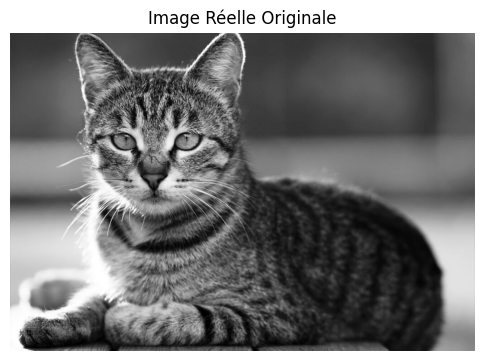

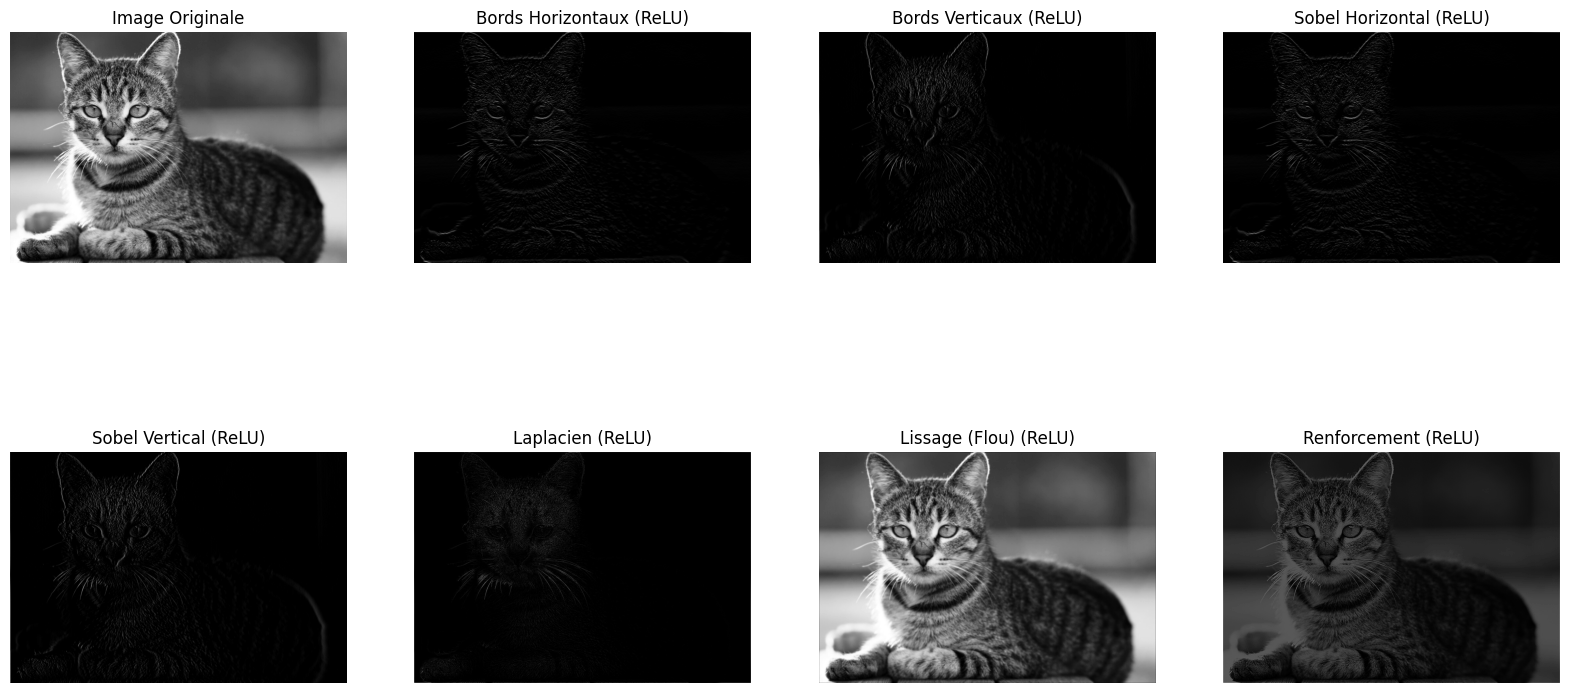

In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf


# Chargement de l'image depuis Google Drive
chemin_image = '/content/drive/MyDrive/cat.jpg'
img = Image.open(chemin_image).convert('L')  # Conversion en niveaux de gris
image_real = np.array(img, dtype=np.float32)
image_real = image_real / 255.0  # Normalisation entre 0 et 1

# Affichage de l'image originale
plt.figure(figsize=(6, 6))
plt.imshow(image_real, cmap='gray')
plt.title("Image Réelle Originale")
plt.axis('off')
plt.show()

# Définition des filtres
kernel_horizontal = np.array([[-1, -1, -1],
                              [ 0,  0,  0],
                              [ 1,  1,  1]], dtype=np.float32)

kernel_vertical = np.array([[-1,  0,  1],
                            [-1,  0,  1],
                            [-1,  0,  1]], dtype=np.float32)

kernel_sobel_horizontal = np.array([[-1, -2, -1],
                                    [ 0,  0,  0],
                                    [ 1,  2,  1]], dtype=np.float32)

kernel_sobel_vertical = np.array([[-1,  0,  1],
                                  [-2,  0,  2],
                                  [-1,  0,  1]], dtype=np.float32)

kernel_laplacian = np.array([[ 0, -1,  0],
                             [-1,  4, -1],
                             [ 0, -1,  0]], dtype=np.float32)

kernel_blur = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]], dtype=np.float32)

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]], dtype=np.float32)

# Empilement des filtres pour une application simultanée
kernels = np.stack([kernel_horizontal,
                    kernel_vertical,
                    kernel_sobel_horizontal,
                    kernel_sobel_vertical,
                    kernel_laplacian,
                    kernel_blur,
                    kernel_sharpen], axis=-1)

# Reshape pour correspondre au format attendu [height, width, in_channels, out_channels]
kernels_tf = kernels.reshape((3, 3, 1, -1))
image_tf = image_real.reshape((1, image_real.shape[0], image_real.shape[1], 1))

# Application de la convolution
convolved = tf.nn.conv2d(image_tf, kernels_tf, strides=[1, 1, 1, 1], padding='SAME')

# Application de la fonction d'activation ReLU
activated = tf.nn.relu(convolved)

# Extraction des résultats
results_multi = activated.numpy().squeeze()

# Affichage des résultats
titles = ['Bords Horizontaux (ReLU)', 'Bords Verticaux (ReLU)', 'Sobel Horizontal (ReLU)',
          'Sobel Vertical (ReLU)', 'Laplacien (ReLU)', 'Lissage (Flou) (ReLU)', 'Renforcement (ReLU)']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Affichage de l'image originale
axs[0, 0].imshow(image_real, cmap='gray')
axs[0, 0].set_title('Image Originale')
axs[0, 0].axis('off')

# Affichage des résultats pour chaque filtre
for idx in range(results_multi.shape[-1]):
    row = (idx + 1) // 4
    col = (idx + 1) % 4
    axs[row, col].imshow(results_multi[:, :, idx], cmap='gray')
    axs[row, col].set_title(titles[idx])
    axs[row, col].axis('off')

# Suppression du sous-graphe inutilisé
if results_multi.shape[-1] < 7:
    fig.delaxes(axs[1, 3])

plt.show()


##Pooling

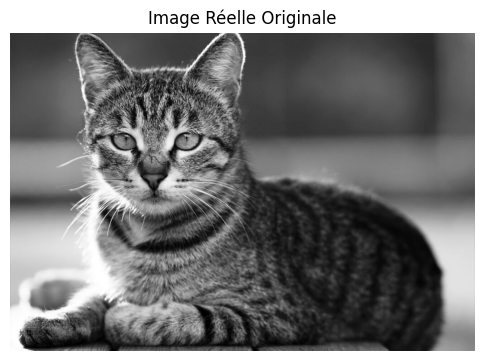

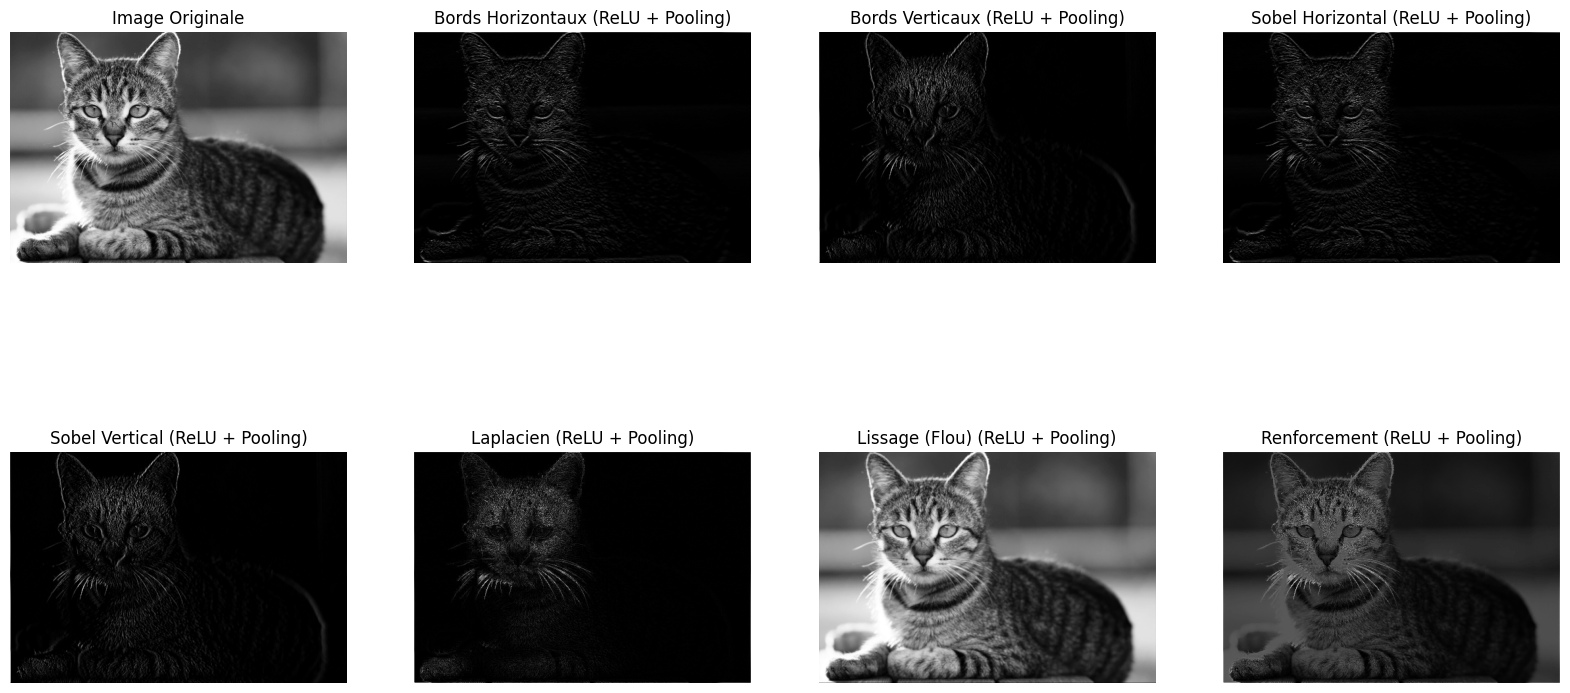

In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

# Chargement de l'image depuis Google Drive
chemin_image = '/content/drive/MyDrive/cat.jpg'
img = Image.open(chemin_image).convert('L')  # Conversion en niveaux de gris
image_real = np.array(img, dtype=np.float32)
image_real = image_real / 255.0  # Normalisation entre 0 et 1

# Affichage de l'image originale
plt.figure(figsize=(6, 6))
plt.imshow(image_real, cmap='gray')
plt.title("Image Réelle Originale")
plt.axis('off')
plt.show()

# Définition des filtres
kernel_horizontal = np.array([[-1, -1, -1],
                              [ 0,  0,  0],
                              [ 1,  1,  1]], dtype=np.float32)

kernel_vertical = np.array([[-1,  0,  1],
                            [-1,  0,  1],
                            [-1,  0,  1]], dtype=np.float32)

kernel_sobel_horizontal = np.array([[-1, -2, -1],
                                    [ 0,  0,  0],
                                    [ 1,  2,  1]], dtype=np.float32)

kernel_sobel_vertical = np.array([[-1,  0,  1],
                                  [-2,  0,  2],
                                  [-1,  0,  1]], dtype=np.float32)

kernel_laplacian = np.array([[ 0, -1,  0],
                             [-1,  4, -1],
                             [ 0, -1,  0]], dtype=np.float32)

kernel_blur = np.array([[1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9],
                        [1/9, 1/9, 1/9]], dtype=np.float32)

kernel_sharpen = np.array([[ 0, -1,  0],
                           [-1,  5, -1],
                           [ 0, -1,  0]], dtype=np.float32)

# Empilement des filtres pour une application simultanée
kernels = np.stack([kernel_horizontal,
                    kernel_vertical,
                    kernel_sobel_horizontal,
                    kernel_sobel_vertical,
                    kernel_laplacian,
                    kernel_blur,
                    kernel_sharpen], axis=-1)

# Reshape pour correspondre au format attendu [height, width, in_channels, out_channels]
kernels_tf = kernels.reshape((3, 3, 1, -1))
image_tf = image_real.reshape((1, image_real.shape[0], image_real.shape[1], 1))

# Application de la convolution
convolved = tf.nn.conv2d(image_tf, kernels_tf, strides=[1, 1, 1, 1], padding='SAME')

# Application de la fonction d'activation ReLU
activated = tf.nn.relu(convolved)

# Application du pooling max après ReLU
pooled = tf.nn.max_pool2d(activated, ksize=2, strides=2, padding='SAME')

# Extraction des résultats
results_multi = pooled.numpy().squeeze()

# Affichage des résultats
titles = ['Bords Horizontaux (ReLU + Pooling)', 'Bords Verticaux (ReLU + Pooling)', 'Sobel Horizontal (ReLU + Pooling)',
          'Sobel Vertical (ReLU + Pooling)', 'Laplacien (ReLU + Pooling)', 'Lissage (Flou) (ReLU + Pooling)', 'Renforcement (ReLU + Pooling)']

fig, axs = plt.subplots(2, 4, figsize=(20, 10))

# Affichage de l'image originale
axs[0, 0].imshow(image_real, cmap='gray')
axs[0, 0].set_title('Image Originale')
axs[0, 0].axis('off')

# Affichage des résultats pour chaque filtre
for idx in range(results_multi.shape[-1]):
    row = (idx + 1) // 4
    col = (idx + 1) % 4
    axs[row, col].imshow(results_multi[:, :, idx], cmap='gray')
    axs[row, col].set_title(titles[idx])
    axs[row, col].axis('off')

# Suppression du sous-graphe inutilisé si nécessaire
if results_multi.shape[-1] < 7:
    fig.delaxes(axs[1, 3])

plt.show()


# Construction et Entraînement d'un CNN sur un Jeu de Données Réel

Après avoir exploré les opérations de convolution, les fonctions d'activation et les couches de pooling sur une image individuelle, la prochaine étape pédagogique consiste à **construire un réseau de neurones convolutionnel complet** et à l'**entraîner sur un jeu de données réel**. Cela permettra aux étudiants de voir comment tous ces éléments s'intègrent pour résoudre une tâche pratique, telle que la classification d'images.

## Objectifs de cette Étape

- **Assembler un CNN complet** en combinant des couches convolutionnelles, des fonctions d'activation, des couches de pooling et des couches entièrement connectées.
- **Entraîner le CNN sur un jeu de données réel** pour effectuer une tâche de classification.
- **Évaluer les performances** du modèle et comprendre l'impact de chaque composant.
- **Visualiser les résultats** pour interpréter les prédictions du modèle.

## Choix du Jeu de Données

Pour cette étape, nous utiliserons le jeu de données **MNIST**, qui est un ensemble de 70 000 images de chiffres manuscrits (28x28 pixels en niveaux de gris) classés en 10 catégories (de 0 à 9). Ce jeu de données est idéal pour commencer car :

- Il est **simple** et permet un entraînement rapide.
- Il est **largement utilisé** pour l'apprentissage des réseaux de neurones.
- Il permet de **visualiser facilement** les résultats.

## Étapes à Suivre

1. **Importer les bibliothèques nécessaires.**
2. **Charger et prétraiter le jeu de données MNIST.**
3. **Construire l'architecture du CNN.**
4. **Compiler le modèle.**
5. **Entraîner le modèle.**
6. **Évaluer le modèle sur les données de test.**
7. **Visualiser les prédictions du modèle.**

## 1. Importer les Bibliothèques Nécessaires

```python
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
```

## 2. Charger et Prétraiter le Jeu de Données MNIST

```python
# Charger le jeu de données MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Ajouter une dimension de canal pour les images en niveaux de gris
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normaliser les pixels entre 0 et 1
train_images, test_images = train_images / 255.0, test_images / 255.0
```

### Visualiser Quelques Images du Jeu de Données

```python
# Afficher quelques images du jeu d'entraînement
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()
```

## 3. Construire l'Architecture du CNN

Nous allons construire un CNN avec les couches suivantes :

- **Couches Convolutionnelles** : Pour extraire les caractéristiques des images.
- **Fonctions d'Activation ReLU** : Pour introduire de la non-linéarité.
- **Couches de Pooling Max** : Pour réduire la dimensionnalité.
- **Couches Entièrement Connectées** : Pour la classification finale.

### Définition du Modèle

```python
model = models.Sequential()

# Première couche convolutionnelle et d'activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Première couche de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Deuxième couche convolutionnelle et d'activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Deuxième couche de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Troisième couche convolutionnelle et d'activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplatissement des cartes de caractéristiques
model.add(layers.Flatten())

# Couche entièrement connectée
model.add(layers.Dense(64, activation='relu'))

# Couche de sortie avec activation softmax
model.add(layers.Dense(10, activation='softmax'))
```

### Afficher le Résumé du Modèle

```python
model.summary()
```

**Explication du Résumé :**

- **Paramètres des Couches Convolutionnelles** : Les paramètres sont calculés en fonction de la taille des filtres, du nombre de filtres et des canaux d'entrée.
- **Paramètres des Couches Entièrement Connectées** : Dépendent du nombre de neurones et des entrées de la couche précédente.

## 4. Compiler le Modèle

```python
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
```

**Explication :**

- **Optimiseur** : `adam` est un optimiseur adaptatif efficace pour les réseaux profonds.
- **Fonction de Perte** : `sparse_categorical_crossentropy` est appropriée pour la classification multiclasse avec des labels entiers.
- **Métrique** : Nous utilisons la précision (`accuracy`) pour évaluer les performances.

## 5. Entraîner le Modèle

```python
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))
```

- **Époques** : Le nombre de fois où le modèle voit l'ensemble des données d'entraînement.
- **Validation** : Nous évaluons le modèle sur les données de test à chaque époque pour surveiller le surapprentissage.

## 6. Évaluer le Modèle sur les Données de Test

```python
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nPrécision sur les données de test :', test_acc)
```

**Interprétation :**

- **Précision sur les Données de Test** : Indique la performance du modèle sur des données qu'il n'a pas vues pendant l'entraînement.
  
## 7. Visualiser les Courbes d'Apprentissage

### Courbe de Perte

```python
plt.figure()
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.show()
```

### Courbe de Précision

```python
plt.figure()
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de précision')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.show()
```

**Analyse :**

- **Perte d'Entraînement vs. Perte de Validation** : Permet de détecter le surapprentissage si la perte de validation augmente alors que la perte d'entraînement diminue.
- **Précision d'Entraînement vs. Précision de Validation** : Une divergence entre les deux peut indiquer un surapprentissage.

## 8. Visualiser les Prédictions du Modèle

### Prédictions sur les Données de Test

```python
predictions = model.predict(test_images)
```

### Afficher Quelques Prédictions

```python
# Fonction pour afficher l'image, la prédiction et le label réel
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img.reshape(28,28), cmap='gray')
    
    predicted_label = np.argmax(predictions_array)
    color = 'green' if predicted_label == true_label else 'red'
    
    plt.xlabel("{} {:2.0f}% (Vrai: {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]), color=color)

# Afficher les 16 premières images avec les prédictions
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions, test_labels, test_images)
plt.tight_layout()
plt.show()
```

**Interprétation :**

- Les étiquettes en **vert** indiquent que le modèle a correctement prédit la classe.
- Les étiquettes en **rouge** indiquent une prédiction incorrecte.

## 9. Visualiser les Filtres Appris (Optionnel)

Pour approfondir la compréhension, vous pouvez visualiser les filtres appris par le modèle après l'entraînement.

```python
# Obtenir les poids de la première couche convolutionnelle
filters, biases = model.layers[0].get_weights()
print(filters.shape)  # (3, 3, 1, 32)

# Normaliser les filtres pour l'affichage
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 6  # Nombre de filtres à afficher
plt.figure(figsize=(10, 5))
for i in range(n_filters):
    f = filters[:, :, 0, i]
    plt.subplot(1, n_filters, i+1)
    plt.imshow(f, cmap='gray')
    plt.axis('off')
plt.show()
```

**Note :** Les filtres affichés peuvent ne pas être facilement interprétables, mais cela montre que le modèle apprend des poids pour extraire des caractéristiques pertinentes.

## 10. Visualiser les Activations des Couches (Optionnel)

Visualiser les activations des couches pour une image donnée peut aider à comprendre quelles caractéristiques sont détectées.

```python
# Sélectionner une image de test
image_index = 0
image = test_images[image_index]

# Créer un modèle qui renvoie les sorties des couches
layer_outputs = [layer.output for layer in model.layers[:6]]  # Couches convolutionnelles et de pooling
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

# Obtenir les activations
activations = activation_model.predict(image.reshape(1, 28, 28, 1))

# Afficher les activations de la première couche
first_layer_activation = activations[0]
print(first_layer_activation.shape)

n_features = 6  # Nombre de cartes de caractéristiques à afficher
plt.figure(figsize=(15, 5))
for i in range(n_features):
    plt.subplot(1, n_features, i+1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()
```

**Interprétation :**

- Les activations montrent comment l'image est transformée à chaque couche.
- Les zones claires dans les cartes de caractéristiques indiquent des activations élevées, ce qui signifie que le filtre a détecté une caractéristique dans cette région.

## Conclusion

En construisant et en entraînant ce CNN sur le jeu de données MNIST, vous avez :

- **Intégré les différentes couches** pour former un modèle complet.
- **Observé le processus d'apprentissage** à travers les courbes de perte et de précision.
- **Évalué les performances** du modèle sur des données non vues.
- **Visualisé les prédictions** pour comprendre où le modèle réussit ou échoue.

## Étapes Suivantes

Pour continuer à approfondir votre compréhension des CNN, vous pouvez :

- **Expérimenter avec l'Architecture** : Modifier le nombre de couches, la taille des filtres, ou ajouter des couches de dropout.
- **Utiliser un Jeu de Données Plus Complexe** : Comme CIFAR-10, qui contient des images en couleur de 32x32 pixels classées en 10 catégories.
- **Appliquer la Régularisation** : Pour améliorer la généralisation du modèle.
- **Apprendre sur le Transfer Learning** : Utiliser des modèles pré-entraînés pour des tâches spécifiques.
- **Étudier les Techniques d'Optimisation Avancées** : Comme la normalisation par lots (batch normalization) ou les planificateurs de taux d'apprentissage (learning rate schedulers).

---

En suivant ces étapes, on peut voir comment les concepts théoriques des CNN se traduisent en applications pratiques pour résoudre des problèmes de vision par ordinateur. Cela renforce la compréhension des mécanismes internes des CNN et prépare à des projets plus complexes.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


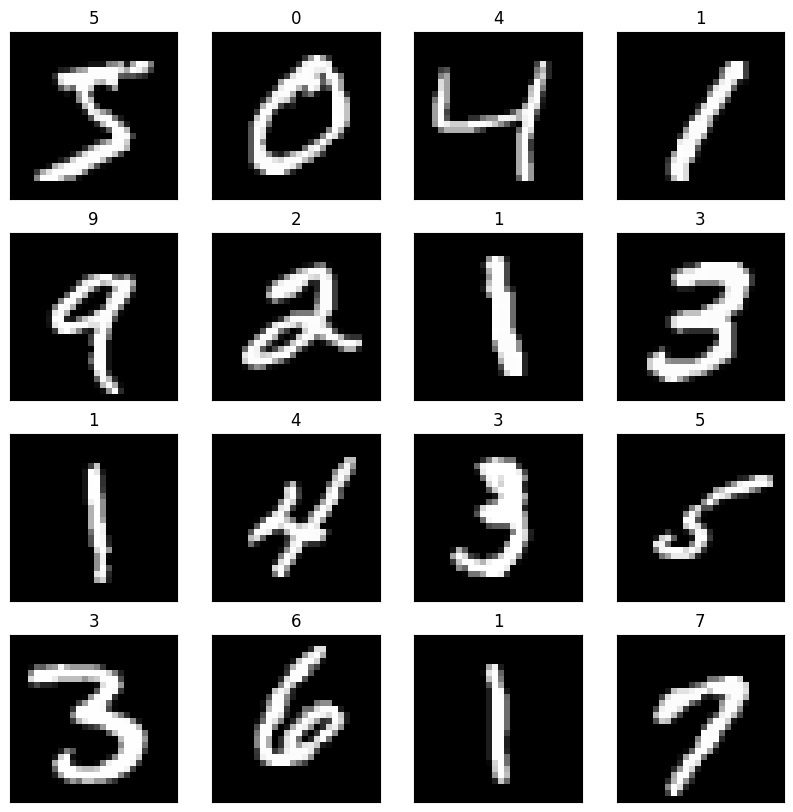

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 38ms/step - accuracy: 0.8970 - loss: 0.3352 - val_accuracy: 0.9821 - val_loss: 0.0550
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9865 - loss: 0.0459 - val_accuracy: 0.9892 - val_loss: 0.0350
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 36ms/step - accuracy: 0.9893 - loss: 0.0349 - val_accuracy: 0.9880 - val_loss: 0.0388
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 78s 34ms/step - accuracy: 0.9926 - loss: 0.0236 - val_accuracy: 0.9905 - val_loss: 0.0322
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 34ms/step - accuracy: 0.9941 - loss: 0.0183 - val_accuracy: 0.9928 - val_loss: 0.0256
313/313 - 3s - 8ms/step - accuracy: 0.9928 - loss: 0.0256

Précision sur les données de test : 0.9927999973297119


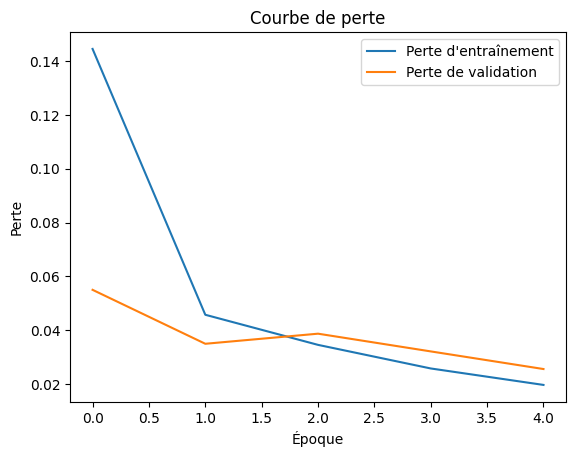

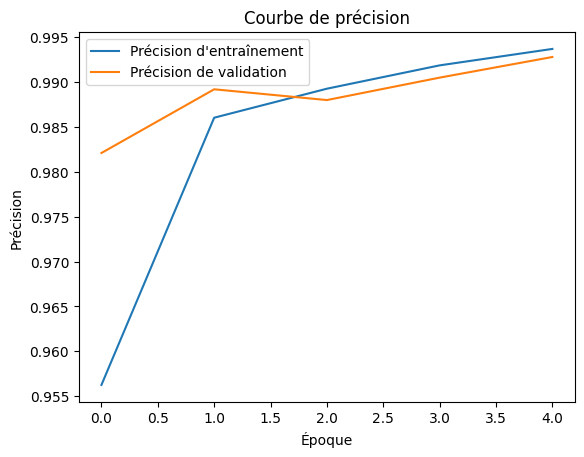

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step


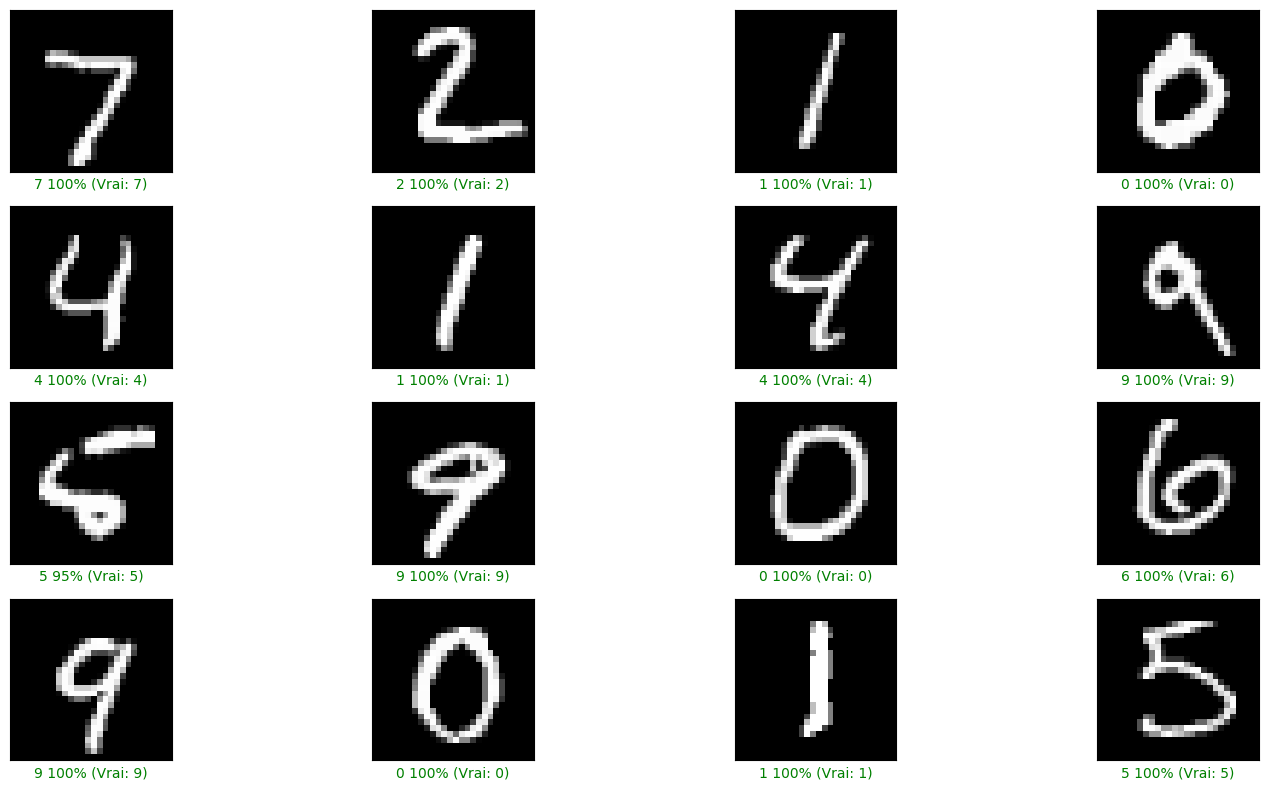

Shape des filtres: (3, 3, 1, 32)


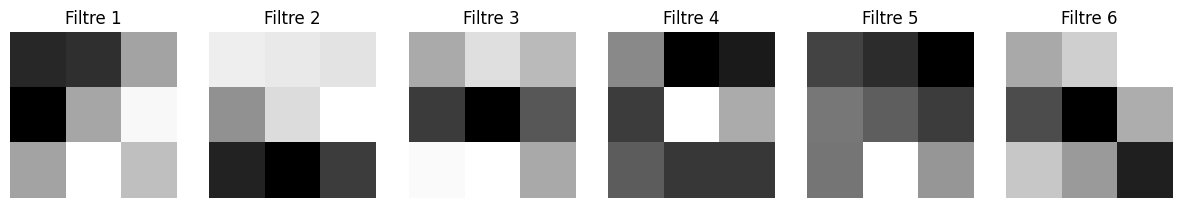

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step
Shape de l'activation de la première couche: (1, 26, 26, 32)


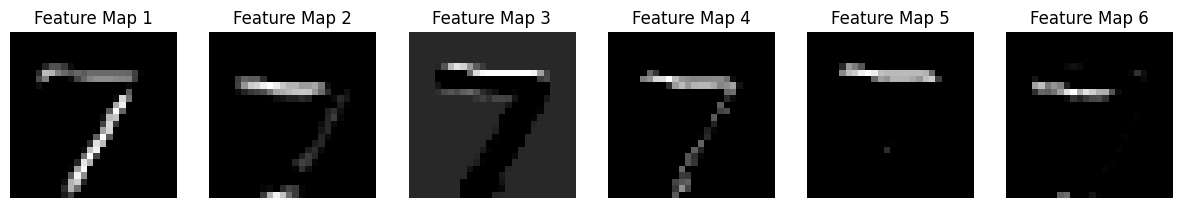

In [ ]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Chargement et Prétraitement du Jeu de Données MNIST
# Charger le jeu de données MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Ajouter une dimension de canal pour les images en niveaux de gris
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normaliser les pixels entre 0 et 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. Visualisation de Quelques Images du Jeu de Données
# Afficher quelques images du jeu d'entraînement
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i].reshape(28,28), cmap='gray')
    plt.title(class_names[train_labels[i]])
plt.show()

# 3. Construction de l'Architecture du CNN
model = models.Sequential()

# Première couche convolutionnelle et d'activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
# Première couche de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Deuxième couche convolutionnelle et d'activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# Deuxième couche de pooling
model.add(layers.MaxPooling2D((2, 2)))

# Troisième couche convolutionnelle et d'activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Aplatissement des cartes de caractéristiques
model.add(layers.Flatten())

# Couche entièrement connectée
model.add(layers.Dense(64, activation='relu'))

# Couche de sortie avec activation softmax
model.add(layers.Dense(10, activation='softmax'))

# Afficher le résumé du modèle
model.summary()

# 4. Compilation du Modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
# 5. Entraînement du Modèle
history = model.fit(train_images, train_labels, epochs=5,
                    validation_data=(test_images, test_labels))

# 6. Évaluation du Modèle sur les Données de Test
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nPrécision sur les données de test :', test_acc)

# 7. Visualisation des Courbes d'Apprentissage
# Courbe de Perte
plt.figure()
plt.plot(history.history['loss'], label='Perte d\'entraînement')
plt.plot(history.history['val_loss'], label='Perte de validation')
plt.legend()
plt.title('Courbe de perte')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.show()

# Courbe de Précision
plt.figure()
plt.plot(history.history['accuracy'], label='Précision d\'entraînement')
plt.plot(history.history['val_accuracy'], label='Précision de validation')
plt.legend()
plt.title('Courbe de précision')
plt.xlabel('Époque')
plt.ylabel('Précision')
plt.show()

# 8. Visualisation des Prédictions du Modèle
# Prédictions sur les données de test
predictions = model.predict(test_images)

# Fonction pour afficher l'image, la prédiction et le label réel
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img.reshape(28,28), cmap='gray')

    predicted_label = np.argmax(predictions_array)
    color = 'green' if predicted_label == true_label else 'red'

    plt.xlabel("{} {:2.0f}% (Vrai: {})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]), color=color)

# Afficher les 16 premières images avec les prédictions
num_rows = 4
num_cols = 4
num_images = num_rows * num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions, test_labels, test_images)
plt.tight_layout()
plt.show()

# 9. Visualisation des Filtres Appris (Optionnel)
# Obtenir les poids de la première couche convolutionnelle
filters, biases = model.layers[0].get_weights()
print('Shape des filtres:', filters.shape)  # (3, 3, 1, 32)

# Normaliser les filtres pour l'affichage
f_min, f_max = filters.min(), filters.max()
filters = (filters - f_min) / (f_max - f_min)

n_filters = 6  # Nombre de filtres à afficher
plt.figure(figsize=(15, 5))
for i in range(n_filters):
    f = filters[:, :, 0, i]
    plt.subplot(1, n_filters, i+1)
    plt.imshow(f, cmap='gray')
    plt.axis('off')
    plt.title(f'Filtre {i+1}')
plt.show()

# 10. Visualisation des Activations des Couches (Correction)
# Sélectionner une image de test
image_index = 0
image = test_images[image_index]

# Créer un modèle qui renvoie les sorties des couches
layer_outputs = [layer.output for layer in model.layers[:6]]  # Couches convolutionnelles et de pooling
activation_model = models.Model(inputs=model.layers[0].input, outputs=layer_outputs)

# Obtenir les activations
activations = activation_model.predict(image.reshape(1, 28, 28, 1))

# Afficher les activations de la première couche
first_layer_activation = activations[0]
print('Shape de l\'activation de la première couche:', first_layer_activation.shape)

n_features = 6  # Nombre de cartes de caractéristiques à afficher
plt.figure(figsize=(15, 5))
for i in range(n_features):
    plt.subplot(1, n_features, i+1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='gray')
    plt.axis('off')
    plt.title(f'Feature Map {i+1}')
plt.show()


In [ ]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# 1. Chargement et Prétraitement du Jeu de Données MNIST
# Charger le jeu de données MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Ajouter une dimension de canal pour les images en niveaux de gris
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

# Normaliser les pixels entre 0 et 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. Construction de l'Architecture du CNN
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

# 3. Compilation du Modèle
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 4. Entraînement du Modèle
model.fit(train_images, train_labels, epochs=5)

# 5. Visualisation d'un Filtre
filters, biases = model.layers[0].get_weights()

# Normaliser le filtre pour l'affichage
f_min, f_max = filters.min(), filters.max()
filter_to_display = filters[:, :, 0, 0]  # Afficher le premier filtre
filter_to_display = (filter_to_display - f_min) / (f_max - f_min)

# Afficher le filtre
plt.figure(figsize=(5, 5))
plt.imshow(filter_to_display, cmap='gray')
plt.axis('off')
plt.title('Filtre 1')
plt.show()

# 6. Visualisation des Activations pour le Filtre Sélectionné
# Sélectionner une image de test
image_index = 0
image = test_images[image_index]

# Créer un modèle qui renvoie les sorties de la première couche
layer_output = model.layers[0].output
activation_model = models.Model(inputs=model.input, outputs=layer_output)

# Obtenir les activations
activations = activation_model.predict(image.reshape(1, 28, 28, 1))

# Afficher les activations du filtre sélectionné
activation = activations[0, :, :, 0]  # Activation pour le premier filtre
print('Shape de l\'activation pour le filtre 1:', activation.shape)

# Afficher l'activation
plt.figure(figsize=(5, 5))
plt.imshow(activation, cmap='gray')
plt.axis('off')
plt.title('Activation du Filtre 1')
plt.show()

#Comparaison ANN vs CNN

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.8795 - loss: 0.4103 - val_accuracy: 0.9633 - val_loss: 0.1185
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9701 - loss: 0.0989 - val_accuracy: 0.9740 - val_loss: 0.0875
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.9796 - loss: 0.0651 - val_accuracy: 0.9755 - val_loss: 0.0799
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9850 - loss: 0.0469 - val_accuracy: 0.9754 - val_loss: 0.0791
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9873 - loss: 0.0388 - val_accuracy: 0.9766 - val_loss: 0.0849
313/313 - 0s - 1ms/step - accuracy: 0.9766 - loss: 0.0849

Précision de l'ANN sur les données de test : 0.9765999913215637
Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 68s 35ms/step - accuracy: 0.9033 - loss: 0.3090 - val_accuracy: 0.9818 - val_loss: 0.0567
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 66s 35ms/step - accuracy: 0.9845 - loss: 0.0469 - val_accu

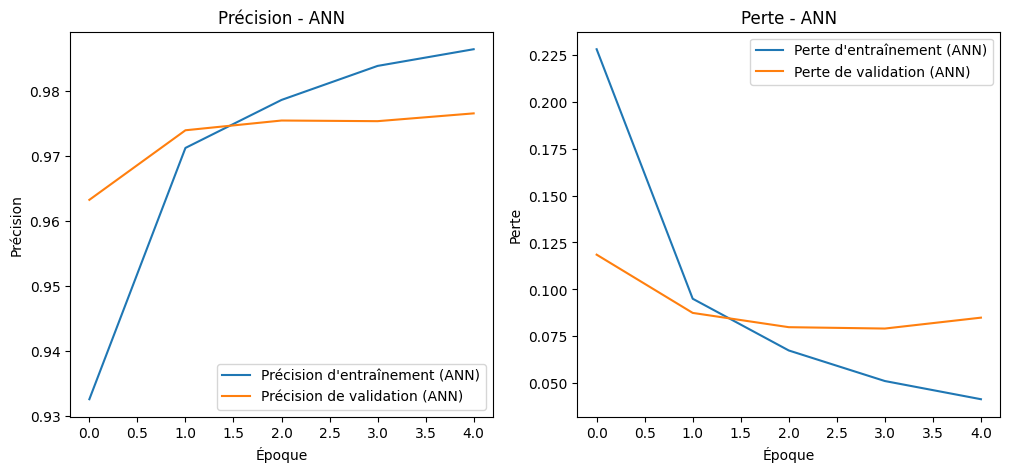

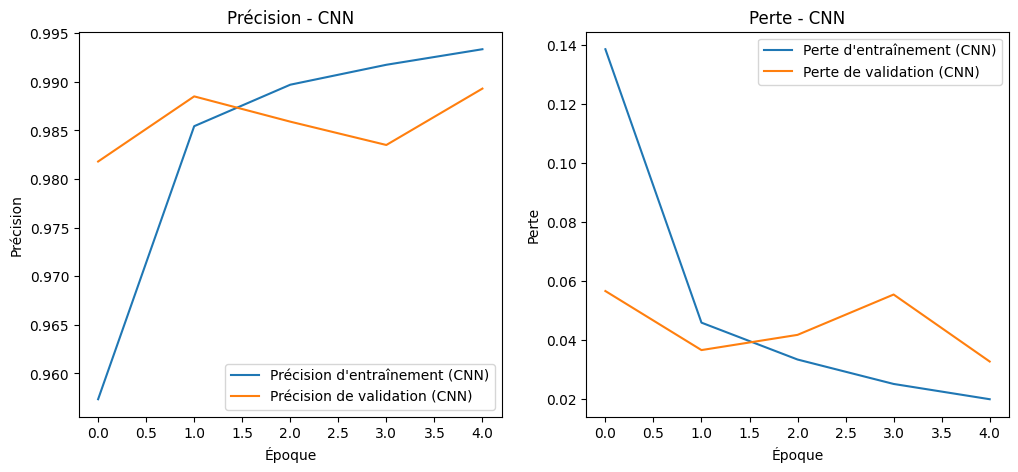


Nombre total de paramètres :
ANN : 118282 paramètres
CNN : 93322 paramètres
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
Shape de l'activation de la première couche: (1, 26, 26, 32)


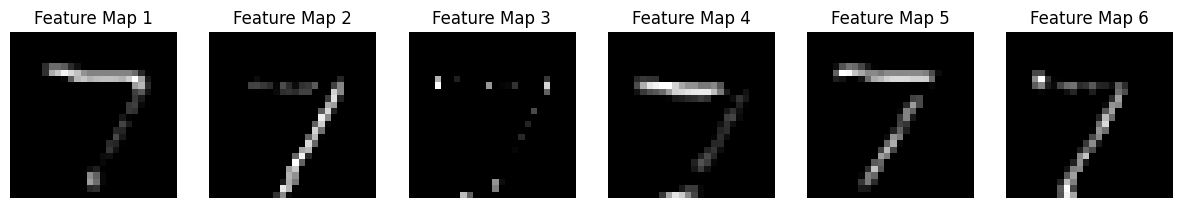

In [ ]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Désactiver les avertissements
import warnings
warnings.filterwarnings('ignore')

# Chargement et Prétraitement du Jeu de Données MNIST
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Préparation des données pour l'ANN
train_images_ann = train_images.reshape((60000, 28 * 28))
test_images_ann = test_images.reshape((10000, 28 * 28))
train_images_ann = train_images_ann / 255.0
test_images_ann = test_images_ann / 255.0

# Préparation des données pour le CNN
train_images_cnn = train_images.reshape((60000, 28, 28, 1))
test_images_cnn = test_images.reshape((10000, 28, 28, 1))
train_images_cnn = train_images_cnn / 255.0
test_images_cnn = test_images_cnn / 255.0

# Construction de l'ANN
ann_model = models.Sequential()
ann_model.add(layers.Dense(128, activation='relu', input_shape=(28 * 28,)))
ann_model.add(layers.Dense(128, activation='relu'))
ann_model.add(layers.Dense(10, activation='softmax'))

# Compilation de l'ANN
ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Entraînement de l'ANN
ann_history = ann_model.fit(train_images_ann, train_labels, epochs=5,
                            validation_data=(test_images_ann, test_labels))

# Évaluation de l'ANN
ann_test_loss, ann_test_acc = ann_model.evaluate(test_images_ann, test_labels, verbose=2)
print('\nPrécision de l\'ANN sur les données de test :', ann_test_acc)

# Construction du CNN
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compilation du CNN
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Entraînement du CNN
cnn_history = cnn_model.fit(train_images_cnn, train_labels, epochs=5,
                            validation_data=(test_images_cnn, test_labels))

# Évaluation du CNN
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images_cnn, test_labels, verbose=2)
print('\nPrécision du CNN sur les données de test :', cnn_test_acc)

# Comparaison des Précisions
print('\nComparaison des précisions sur les données de test:')
print(f'ANN Précision: {ann_test_acc}')
print(f'CNN Précision: {cnn_test_acc}')

# Affichage des Courbes d'Apprentissage
# Courbes de l'ANN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Précision d\'entraînement (ANN)')
plt.plot(ann_history.history['val_accuracy'], label='Précision de validation (ANN)')
plt.legend()
plt.title('Précision - ANN')
plt.xlabel('Époque')
plt.ylabel('Précision')

plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='Perte d\'entraînement (ANN)')
plt.plot(ann_history.history['val_loss'], label='Perte de validation (ANN)')
plt.legend()
plt.title('Perte - ANN')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.show()

# Courbes du CNN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Précision d\'entraînement (CNN)')
plt.plot(cnn_history.history['val_accuracy'], label='Précision de validation (CNN)')
plt.legend()
plt.title('Précision - CNN')
plt.xlabel('Époque')
plt.ylabel('Précision')

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Perte d\'entraînement (CNN)')
plt.plot(cnn_history.history['val_loss'], label='Perte de validation (CNN)')
plt.legend()
plt.title('Perte - CNN')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.show()

# Affichage du nombre total de paramètres
print('\nNombre total de paramètres :')
print(f'ANN : {ann_model.count_params()} paramètres')
print(f'CNN : {cnn_model.count_params()} paramètres')

# Visualisation des Activations des Couches (Optionnel pour le CNN)
# Sélectionner une image de test
image_index = 0
image = test_images_cnn[image_index]

# Créer un modèle qui renvoie les sorties des couches
layer_outputs = [layer.output for layer in cnn_model.layers[:6]]  # Couches convolutionnelles et de pooling
activation_model = models.Model(inputs=cnn_model.layers[0].input, outputs=layer_outputs)

# Obtenir les activations
activations = activation_model.predict(image.reshape(1, 28, 28, 1))

# Afficher les activations de la première couche
first_layer_activation = activations[0]
print('Shape de l\'activation de la première couche:', first_layer_activation.shape)

n_features = 6  # Nombre de cartes de caractéristiques à afficher
plt.figure(figsize=(15, 5))
for i in range(n_features):
    plt.subplot(1, n_features, i+1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='gray')
    plt.axis('off')
    plt.title(f'Feature Map {i+1}')
plt.show()


#Comparaison plus poussée (CIFAR 10)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


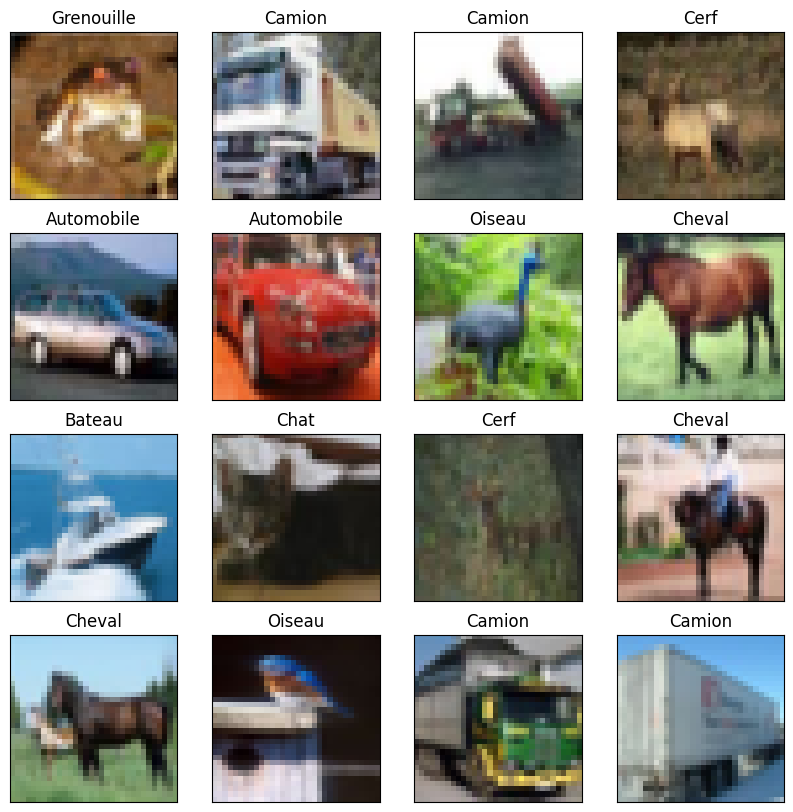

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.2737 - loss: 2.0028 - val_accuracy: 0.3933 - val_loss: 1.7052
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 79s 26ms/step - accuracy: 0.3935 - loss: 1.6946 - val_accuracy: 0.4026 - val_loss: 1.6489
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4191 - loss: 1.6104 - val_accuracy: 0.4387 - val_loss: 1.5661
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.4477 - loss: 1.5445 - val_accuracy: 0.4543 - val_loss: 1.5269
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 77s 26ms/step - accuracy: 0.4642 - loss: 1.4955 - val_accuracy: 0.4475 - val_loss: 1.5379
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 43s 27ms/step - accuracy: 0.4709 - loss: 1.4674 - val_accuracy: 0.4681 - val_loss: 1.4946
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 26ms/step - accuracy: 0.4864 - loss: 1.4340 - val_accuracy: 0.4699 - val_loss: 1.4845
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 27ms/step - accuracy: 0.4972 -

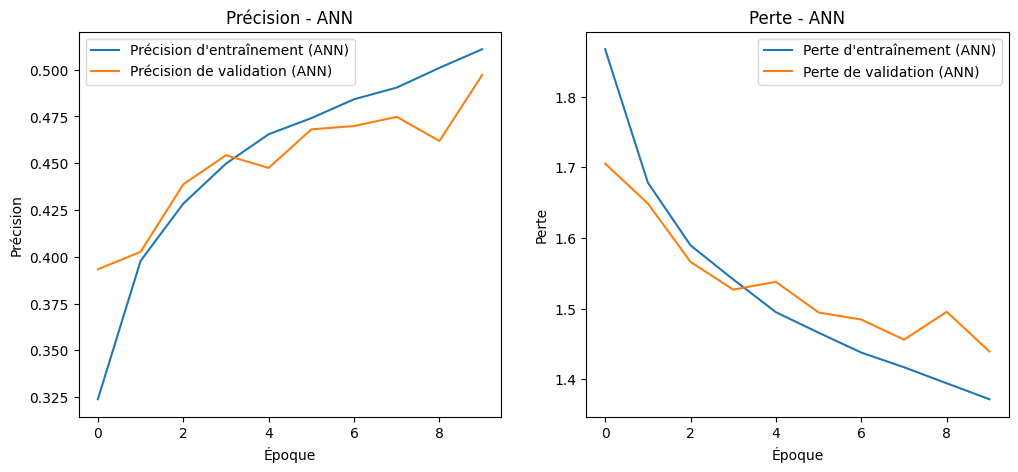

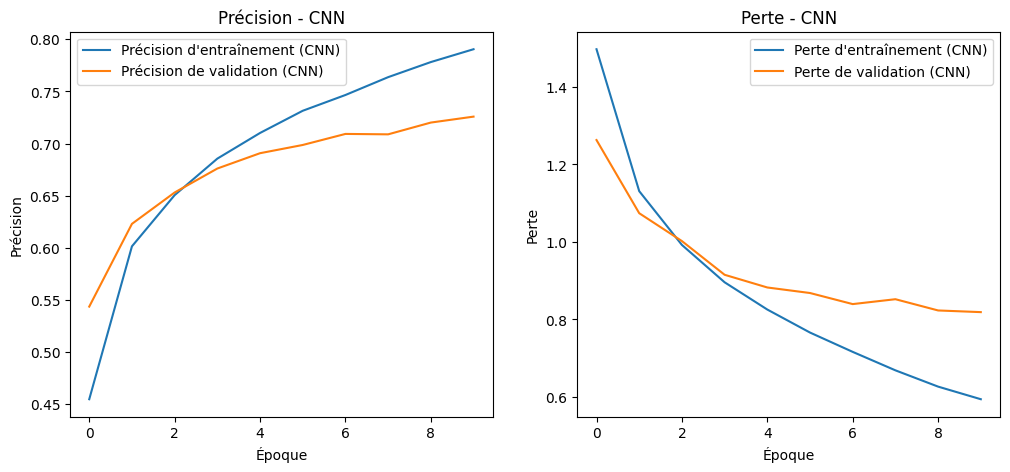


Nombre total de paramètres :
ANN : 1738890 paramètres
CNN : 122570 paramètres


In [ ]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Désactiver les avertissements
import warnings
warnings.filterwarnings('ignore')

# 1. Chargement et Prétraitement du Jeu de Données CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normaliser les pixels entre 0 et 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. Visualisation de Quelques Images du Jeu de Données
class_names = ['Avion', 'Automobile', 'Oiseau', 'Chat', 'Cerf', 'Chien', 'Grenouille', 'Cheval', 'Bateau', 'Camion']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.title(class_names[int(train_labels[i])])
plt.show()

# 3. Construction et Entraînement de l'ANN
# Aplatir les images pour l'ANN
train_images_ann = train_images.reshape((50000, 32 * 32 * 3))
test_images_ann = test_images.reshape((10000, 32 * 32 * 3))

# Construction de l'ANN
ann_model = models.Sequential()
ann_model.add(layers.Dense(512, activation='relu', input_shape=(32 * 32 * 3,)))
ann_model.add(layers.Dense(256, activation='relu'))
ann_model.add(layers.Dense(128, activation='relu'))
ann_model.add(layers.Dense(10, activation='softmax'))

# Compilation de l'ANN
ann_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Entraînement de l'ANN
ann_history = ann_model.fit(train_images_ann, train_labels, epochs=10,
                            validation_data=(test_images_ann, test_labels))

# 4. Construction et Entraînement du CNN
# Construction du CNN
cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(64, activation='relu'))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compilation du CNN
cnn_model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Entraînement du CNN
cnn_history = cnn_model.fit(train_images, train_labels, epochs=10,
                            validation_data=(test_images, test_labels))

# 5. Comparaison des Performances
# Évaluation de l'ANN
ann_test_loss, ann_test_acc = ann_model.evaluate(test_images_ann, test_labels, verbose=2)
print('\nPrécision de l\'ANN sur les données de test :', ann_test_acc)

# Évaluation du CNN
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print('\nPrécision du CNN sur les données de test :', cnn_test_acc)

# Affichage des Courbes d'Apprentissage
# Courbes de l'ANN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(ann_history.history['accuracy'], label='Précision d\'entraînement (ANN)')
plt.plot(ann_history.history['val_accuracy'], label='Précision de validation (ANN)')
plt.legend()
plt.title('Précision - ANN')
plt.xlabel('Époque')
plt.ylabel('Précision')

plt.subplot(1, 2, 2)
plt.plot(ann_history.history['loss'], label='Perte d\'entraînement (ANN)')
plt.plot(ann_history.history['val_loss'], label='Perte de validation (ANN)')
plt.legend()
plt.title('Perte - ANN')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.show()

# Courbes du CNN
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Précision d\'entraînement (CNN)')
plt.plot(cnn_history.history['val_accuracy'], label='Précision de validation (CNN)')
plt.legend()
plt.title('Précision - CNN')
plt.xlabel('Époque')
plt.ylabel('Précision')

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Perte d\'entraînement (CNN)')
plt.plot(cnn_history.history['val_loss'], label='Perte de validation (CNN)')
plt.legend()
plt.title('Perte - CNN')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.show()

# Affichage du nombre total de paramètres
print('\nNombre total de paramètres :')
print(f'ANN : {ann_model.count_params()} paramètres')
print(f'CNN : {cnn_model.count_params()} paramètres')


#Amélioration du CNN pour CIFAR 10
##Ajustement de quelques paramètres + Dropout

###Ajout de Couches de Régularisation (Dropout)
Le Dropout est une technique de régularisation qui consiste à désactiver aléatoirement une fraction des neurones pendant l'entraînement, ce qui aide à éviter le surapprentissage en forçant le réseau à apprendre des représentations plus robustes.

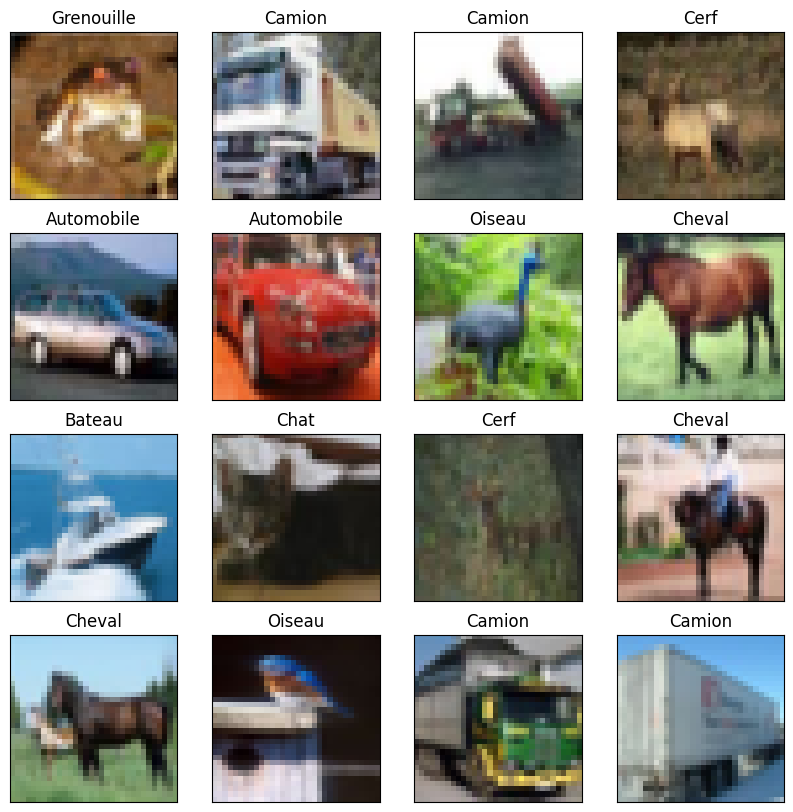

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 30, 30, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 30, 30, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 28, 28, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 12, 12, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 12, 12, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 10, 10, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 10, 10, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 5, 5, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 3200)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 512)                 │       1,638,912 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,907,786 (7.28 MB)

 Trainable params: 1,905,994 (7.27 MB)

 Non-trainable params: 1,792 (7.00 KB)

Epoch 1/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 626s 795ms/step - accuracy: 0.4115 - loss: 1.9157 - val_accuracy: 0.6422 - val_loss: 1.0267 - learning_rate: 0.0010
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 619s 792ms/step - accuracy: 0.6595 - loss: 0.9719 - val_accuracy: 0.6745 - val_loss: 0.9466 - learning_rate: 0.0010
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 622s 791ms/step - accuracy: 0.7237 - loss: 0.7916 - val_accuracy: 0.7326 - val_loss: 0.7801 - learning_rate: 0.0010
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 632s 804ms/step - accuracy: 0.7541 - loss: 0.6936 - val_accuracy: 0.7120 - val_loss: 0.8207 - learning_rate: 0.0010
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 663s 780ms/step - accuracy: 0.7884 - loss: 0.5990 - val_accuracy: 0.7521 - val_loss: 0.7265 - learning_rate: 0.0010
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 627s 787ms/step - accuracy: 0.8107 - loss: 0.5455 - val_accuracy: 0.7509 - val_loss: 0.7223 - learning_rate: 0.0010
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 624s 790ms/step - accura

In [ ]:
# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

# Désactiver les avertissements
import warnings
warnings.filterwarnings('ignore')

# 1. Chargement et Prétraitement du Jeu de Données CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normaliser les pixels entre 0 et 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# 2. Visualisation de Quelques Images du Jeu de Données
class_names = ['Avion', 'Automobile', 'Oiseau', 'Chat', 'Cerf', 'Chien', 'Grenouille', 'Cheval', 'Bateau', 'Camion']

plt.figure(figsize=(10,10))
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.title(class_names[int(train_labels[i])])
plt.show()

# 3. Construction du CNN Amélioré
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam

cnn_model = models.Sequential()
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.25))

cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Conv2D(128, (3, 3), activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.MaxPooling2D((2, 2)))
cnn_model.add(layers.Dropout(0.25))

cnn_model.add(layers.Flatten())
cnn_model.add(layers.Dense(512, activation='relu'))
cnn_model.add(layers.BatchNormalization())
cnn_model.add(layers.Dropout(0.5))
cnn_model.add(layers.Dense(10, activation='softmax'))

# Compilation du modèle avec un taux d'apprentissage personnalisé
cnn_model.compile(optimizer=Adam(learning_rate=1e-3),
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

# Afficher le résumé du modèle
cnn_model.summary()

# 4. Définition du callback pour réduire le taux d'apprentissage
lr_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                 patience=3,
                                 verbose=1,
                                 factor=0.5,
                                 min_lr=1e-5)

# 5. Entraînement du CNN Amélioré
num_epochs = 50

cnn_history = cnn_model.fit(train_images, train_labels, epochs=num_epochs,
                            validation_data=(test_images, test_labels),
                            batch_size=64,
                            callbacks=[lr_reduction])

# 6. Évaluation du Modèle Amélioré
cnn_test_loss, cnn_test_acc = cnn_model.evaluate(test_images, test_labels, verbose=2)
print('\nPrécision du CNN amélioré sur les données de test :', cnn_test_acc)

# 7. Visualisation des Courbes d'Apprentissage
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cnn_history.history['accuracy'], label='Précision d\'entraînement (CNN amélioré)')
plt.plot(cnn_history.history['val_accuracy'], label='Précision de validation (CNN amélioré)')
plt.legend()
plt.title('Précision - CNN Amélioré')
plt.xlabel('Époque')
plt.ylabel('Précision')

plt.subplot(1, 2, 2)
plt.plot(cnn_history.history['loss'], label='Perte d\'entraînement (CNN amélioré)')
plt.plot(cnn_history.history['val_loss'], label='Perte de validation (CNN amélioré)')
plt.legend()
plt.title('Perte - CNN Amélioré')
plt.xlabel('Époque')
plt.ylabel('Perte')
plt.show()


#Segmentation

# Introduction à la Segmentation d'Images : Explications Simples et Exemples Codés

## Qu'est-ce que la Segmentation d'Images ?

La **segmentation d'images** est une technique en vision par ordinateur qui consiste à diviser une image en plusieurs segments ou régions significatives pour simplifier ou changer la représentation de l'image. L'objectif est de rendre l'image plus significative et plus facile à analyser.

En termes simples, la segmentation répond à la question :

- **"Quels pixels appartiennent à quel objet ou région ?"**

Contrairement à la classification d'images, qui attribue une étiquette à une image entière, la segmentation attribue une étiquette à chaque **pixel** de l'image.

## Pourquoi la Segmentation est-elle Importante ?

- **Analyse Fine** : Permet une compréhension détaillée de l'image en identifiant les objets et leurs contours exacts.
- **Applications Pratiques** : Utilisée en médecine pour segmenter les tissus dans les images médicales, en conduite autonome pour détecter les routes et les obstacles, en agriculture pour analyser les cultures, etc.

## Types de Segmentation

1. **Segmentation Binaire** : Division de l'image en deux régions, généralement objet et fond.

2. **Segmentation Multi-classes** : Chaque pixel est classé en une des plusieurs classes possibles.

3. **Segmentation d'Instances** : Non seulement identifie les classes, mais distingue également différentes instances d'une même classe.

## Exemples Simples de Segmentation

Nous allons explorer des méthodes simples de segmentation que vous pouvez coder facilement :

1. **Segmentation par Seuillage (Thresholding)**
2. **Segmentation par Clustering K-means**
3. **Segmentation par Détection de Contours**

---

# 1. Segmentation par Seuillage (Thresholding)

La segmentation par seuillage est l'une des méthodes les plus simples. Elle consiste à convertir une image en niveaux de gris en une image binaire en appliquant un seuil :

- **Pixels plus clairs que le seuil** : définis comme appartenant à une classe (par exemple, objet).
- **Pixels plus sombres que le seuil** : définis comme appartenant à une autre classe (par exemple, fond).

## Exemple en Python avec OpenCV

### Étape 1 : Importer les Bibliothèques Nécessaires

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt
```

### Étape 2 : Charger l'Image en Niveaux de Gris

```python
# Charger l'image
image = cv2.imread('chemin_vers_votre_image.jpg', cv2.IMREAD_GRAYSCALE)
```

### Étape 3 : Appliquer le Seuillage

```python
# Appliquer un seuil fixe
seuil = 127
_, thresh_image = cv2.threshold(image, seuil, 255, cv2.THRESH_BINARY)
```

### Étape 4 : Afficher les Images

```python
# Afficher l'image originale et l'image seuillée
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(thresh_image, cmap='gray')
plt.title('Image Segmentée (Seuillage)')
plt.axis('off')

plt.show()
```

### Résultat

- L'image originale est affichée à gauche.
- L'image segmentée est affichée à droite, avec les pixels supérieurs au seuil en blanc et les autres en noir.

### Notes

- **Limites** : Le seuillage simple peut ne pas fonctionner correctement si l'éclairage n'est pas uniforme.
- **Amélioration** : Utiliser un seuillage adaptatif.

---

# 2. Segmentation par Clustering K-means

Le clustering K-means est une méthode non supervisée qui regroupe les pixels en **k** clusters basés sur leurs caractéristiques (par exemple, intensité des couleurs).

## Exemple en Python avec OpenCV

### Étape 1 : Importer les Bibliothèques

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt
```

### Étape 2 : Charger l'Image en Couleur

```python
# Charger l'image
image = cv2.imread('chemin_vers_votre_image.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
```

### Étape 3 : Préparer les Données pour K-means

```python
# Convertir l'image en une matrice de pixels
pixel_values = image.reshape((-1, 3))
pixel_values = np.float32(pixel_values)
```

### Étape 4 : Définir les Critères et Appliquer K-means

```python
# Définir les critères de terminaison
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

# Nombre de clusters
k = 3

# Appliquer K-means
_, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
```

### Étape 5 : Convertir les Centres et les Labels en Image

```python
# Convertir les centres en entiers 8 bits
centers = np.uint8(centers)

# Aplatir les labels
labels = labels.flatten()

# Convertir tous les pixels en couleur du centre du cluster
segmented_image = centers[labels]

# Reshaper l'image segmentée à la forme originale
segmented_image = segmented_image.reshape(image.shape)
```

### Étape 6 : Afficher les Images

```python
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image)
plt.title('Image Originale')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(segmented_image)
plt.title('Image Segmentée (K-means)')
plt.axis('off')

plt.show()
```

### Résultat

- L'image segmentée montre l'image originale réduite à **k** couleurs principales, segmentant ainsi l'image en régions distinctes.

### Notes

- **Choix de k** : Le nombre de clusters **k** doit être choisi en fonction de l'image.
- **Limites** : Peut ne pas segmenter correctement les objets avec des couleurs similaires.

---

# 3. Segmentation par Détection de Contours

La détection de contours permet de trouver les bords des objets dans une image.

## Exemple en Python avec OpenCV

### Étape 1 : Importer les Bibliothèques

```python
import cv2
import numpy as np
import matplotlib.pyplot as plt
```

### Étape 2 : Charger l'Image en Niveaux de Gris

```python
# Charger l'image
image = cv2.imread('chemin_vers_votre_image.jpg', cv2.IMREAD_GRAYSCALE)
```

### Étape 3 : Appliquer le Flou Gaussien pour Réduire le Bruit

```python
blur = cv2.GaussianBlur(image, (5,5), 0)
```

### Étape 4 : Utiliser l'Opérateur Canny pour la Détection de Contours

```python
edges = cv2.Canny(blur, threshold1=50, threshold2=150)
```

### Étape 5 : Afficher les Images

```python
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(image, cmap='gray')
plt.title('Image Originale')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title('Contours Détectés (Canny)')
plt.axis('off')

plt.show()
```

### Résultat

- L'image de droite affiche les contours détectés, permettant de segmenter visuellement les objets.

### Notes

- **Ajustement des Seuils** : Les paramètres `threshold1` et `threshold2` de la fonction `Canny` contrôlent la sensibilité de la détection de contours.
- **Applications** : Utilisé pour l'analyse de formes, la reconnaissance d'objets, etc.

---

# 4. Segmentation Simple avec un Réseau de Neurones Convolutionnel (CNN)

Nous pouvons utiliser un CNN simple pour effectuer une segmentation, en particulier sur des images de chiffres comme MNIST.

## Exemple avec MNIST

### Étape 1 : Importer les Bibliothèques

```python
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
```

### Étape 2 : Charger le Jeu de Données MNIST

```python
# Charger le jeu de données MNIST
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

# Normaliser les images
train_images = train_images / 255.0
test_images = test_images / 255.0

# Ajouter une dimension de canal
train_images = train_images[..., np.newaxis]
test_images = test_images[..., np.newaxis]
```

### Étape 3 : Créer les Masques de Segmentation

Pour ce cas simple, nous allons créer des masques binaires où les pixels du chiffre sont 1 et le fond est 0.

```python
# Les masques sont simplement les images binaires du chiffre
train_masks = (train_images > 0).astype(np.float32)
test_masks = (test_images > 0).astype(np.float32)
```

### Étape 4 : Définir le Modèle Simple de Segmentation

```python
from tensorflow.keras import layers, models

def simple_segmentation_model():
    inputs = layers.Input(shape=(28, 28, 1))
    x = layers.Conv2D(32, 3, activation='relu', padding='same')(inputs)
    x = layers.MaxPooling2D()(x)
    x = layers.Conv2D(64, 3, activation='relu', padding='same')(x)
    x = layers.UpSampling2D()(x)
    outputs = layers.Conv2D(1, 1, activation='sigmoid', padding='same')(x)
    return models.Model(inputs, outputs)

model = simple_segmentation_model()
```

### Étape 5 : Compiler et Entraîner le Modèle

```python
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
model.fit(train_images, train_masks, epochs=5, batch_size=64, validation_data=(test_images, test_masks))
```

### Étape 6 : Faire des Prédictions et Afficher les Résultats

```python
# Faire des prédictions
pred_masks = model.predict(test_images)

# Afficher l'image originale, le masque réel et le masque prédit
def display_sample(i):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,3,1)
    plt.imshow(test_images[i].squeeze(), cmap='gray')
    plt.title('Image Originale')
    plt.axis('off')
    
    plt.subplot(1,3,2)
    plt.imshow(test_masks[i].squeeze(), cmap='gray')
    plt.title('Masque Réel')
    plt.axis('off')
    
    plt.subplot(1,3,3)
    plt.imshow(pred_masks[i].squeeze(), cmap='gray')
    plt.title('Masque Prédit')
    plt.axis('off')
    
    plt.show()

# Afficher un exemple
display_sample(0)
```

### Résultat

- **Image Originale** : L'image du chiffre manuscrit.
- **Masque Réel** : Le masque binaire où les pixels du chiffre sont 1.
- **Masque Prédit** : Le masque prédit par le modèle, qui devrait ressembler au masque réel.

### Notes

- **Limites** : Cet exemple est simplifié pour des images de chiffres. Pour des images plus complexes, des modèles plus avancés sont nécessaires.
- **Extensions** : Vous pouvez essayer d'utiliser des architectures plus complexes comme U-Net pour améliorer les résultats.

---

# Conclusion

Nous avons vu des méthodes simples pour effectuer de la segmentation d'images, allant de techniques basiques comme le seuillage à des approches plus sophistiquées impliquant des réseaux de neurones convolutionnels.

**Points Clés :**

- **Segmentation par Seuillage** : Facile à mettre en œuvre, mais sensible aux variations d'éclairage.
- **Segmentation par K-means** : Utile pour segmenter en fonction des couleurs, mais nécessite de choisir le bon nombre de clusters.
- **Segmentation par Détection de Contours** : Identifie les bords des objets, mais nécessite un post-traitement pour obtenir des segments complets.
- **Segmentation avec CNN** : Capable de capturer des caractéristiques complexes, adapté aux images où les méthodes simples échouent.

---

# Prochaines Étapes

- **Expérimenter** : Essayez ces méthodes sur vos propres images pour voir comment elles fonctionnent.
- **Combiner les Méthodes** : Utilisez la détection de contours comme étape préliminaire pour le seuillage.
- **Approfondir les CNN** : Explorez des architectures de segmentation plus avancées comme U-Net pour des images plus complexes.
- **Annotations Manuelles** : Pour des images sans masques, vous pouvez créer vos propres annotations pour entraîner un modèle de segmentation supervisé.

---




---

## 1. Segmentation par Seuillage (Thresholding)

La segmentation par seuillage est l'une des méthodes les plus simples. Elle consiste à convertir une image en niveaux de gris en une image binaire en appliquant un seuil :

- **Pixels plus clairs que le seuil** : définis comme appartenant à une classe (par exemple, objet).
- **Pixels plus sombres que le seuil** : définis comme appartenant à une autre classe (par exemple, fond).

## Exemple en Python avec OpenCV

### Étape 1 : Importer les Bibliothèques Nécessaires




In [ ]:

from google.colab import drive
drive.mount('/content/drive')


In [ ]:
# Segmentation d'Image par Seuillage avec une Image sur Google Drive
# -------------------------------------------------------------------

# Importation des bibliothèques nécessaires
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Monter Google Drive pour accéder aux fichiers
# -------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# Étape 2 : Spécifier le chemin vers l'image sur votre Google Drive
# -----------------------------------------------------------------
# Remplacez le chemin ci-dessous par le chemin exact de votre image
image_path = '/content/drive/MyDrive/Cours_Deep_Learning/cours_filière_22_23/03_Chapitre 3/Lab_03/maison2.jpg'

# Étape 3 : Charger l'image en niveaux de gris
# --------------------------------------------
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Vérifier si l'image a été correctement chargée
if image is None:
    print("Erreur : Impossible de charger l'image. Vérifiez le chemin du fichier.")
else:
    # Étape 4 : Prétraitement de l'image
    # ----------------------------------
    # Appliquer un flou gaussien pour réduire le bruit (optionnel mais recommandé)
    image_floue = cv2.GaussianBlur(image, (5, 5), 0)

    # Étape 5 : Définir la valeur du seuil pour la segmentation
    # ---------------------------------------------------------
    valeur_seuil = 127  # Vous pouvez ajuster cette valeur selon votre image
    valeur_max = 255    # Valeur à attribuer aux pixels dépassant le seuil

    # Étape 6 : Appliquer l'opération de seuillage
    # --------------------------------------------
    ret, image_seuillee = cv2.threshold(image_floue, valeur_seuil, valeur_max, cv2.THRESH_BINARY)

    # Étape 7 : Afficher les images originale et segmentée
    # ----------------------------------------------------
    plt.figure(figsize=(10, 5))

    # Image originale
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Image Originale')
    plt.axis('off')

    # Image segmentée
    plt.subplot(1, 2, 2)
    plt.imshow(image_seuillee, cmap='gray')
    plt.title('Image Segmentée (Seuillage)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Étape 8 : Enregistrer l'image segmentée sur Google Drive (optionnel)
    # --------------------------------------------------------------------

    cv2.imwrite('/content/drive/MyDrive/Cours_Deep_Learning/cours_filière_22_23/03_Chapitre 3/Lab_03/maison2_segmentee_seuillage.jpg', image_seuillee)


##Segmentation par K-means Clustering

In [ ]:
# Segmentation d'Image par K-means Clustering avec une Image sur Google Drive
# ---------------------------------------------------------------------------

# Importation des bibliothèques nécessaires
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Monter Google Drive pour accéder aux fichiers
# -------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# Étape 2 : Spécifier le chemin vers l'image sur votre Google Drive
# -----------------------------------------------------------------
# Remplacez le chemin ci-dessous par le chemin exact de votre image
image_path = '/content/drive/MyDrive/Cours_Deep_Learning/cours_filière_22_23/03_Chapitre 3/Lab_03/maison2.jpg'

# Étape 3 : Charger l'image en couleur
# ------------------------------------
# OpenCV charge les images en format BGR par défaut
image = cv2.imread(image_path)

# Vérifier si l'image a été correctement chargée
if image is None:
    print("Erreur : Impossible de charger l'image. Vérifiez le chemin du fichier.")
else:
    # Convertir l'image de BGR à RGB pour l'affichage correct avec Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Étape 4 : Préparation des données pour K-means
    # ----------------------------------------------
    # Redimensionner l'image si nécessaire pour accélérer le calcul (optionnel)
    # image_rgb = cv2.resize(image_rgb, (256, 256))

    # Aplatir l'image en une matrice de pixels
    pixel_values = image_rgb.reshape((-1, 3))
    # Convertir en float32
    pixel_values = np.float32(pixel_values)

    # Étape 5 : Définir les critères de K-means et le nombre de clusters
    # -------------------------------------------------------------------
    # Critères d'arrêt : soit 100 itérations, soit une précision epsilon de 0.2
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    # Nombre de clusters (k) : vous pouvez ajuster cette valeur
    k = 3
    # Nombre d'initialisations du centre de cluster
    attempts = 10

    # Étape 6 : Appliquer K-means Clustering
    # --------------------------------------
    # Appliquer la fonction kmeans
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

    # Convertir les centres en entiers 8 bits
    centers = np.uint8(centers)
    # Aplatir les labels
    labels = labels.flatten()
    # Convertir tous les pixels en couleur du centre du cluster
    segmented_image = centers[labels]
    # Reshaper l'image segmentée à la forme originale
    segmented_image = segmented_image.reshape(image_rgb.shape)

    # Étape 7 : Afficher les images originale et segmentée
    # ----------------------------------------------------
    plt.figure(figsize=(15, 5))

    # Image originale
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Image Originale')
    plt.axis('off')

    # Image segmentée
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title(f'Image Segmentée (K={k})')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Étape 8 : Optionnel - Masquer une Région Spécifique
    # ---------------------------------------------------
    # Supposons que nous voulions masquer un cluster spécifique
    # Par exemple, nous pouvons choisir de masquer tous les pixels appartenant au cluster 0

    masked_image = np.copy(image_rgb)
    # Masquer le cluster 0 (vous pouvez changer le numéro du cluster)
    cluster_to_mask = 0
    masked_image = masked_image.reshape((-1, 3))
    masked_image[labels == cluster_to_mask] = [0, 0, 0]  # Couleur noire
    masked_image = masked_image.reshape(image_rgb.shape)

    # Afficher l'image avec le cluster masqué
    plt.figure(figsize=(5, 5))
    plt.imshow(masked_image)
    plt.title(f'Image avec le Cluster {cluster_to_mask} Masqué')
    plt.axis('off')
    plt.show()

    # Étape 9 : Enregistrer l'image segmentée sur Google Drive (optionnel)
    # --------------------------------------------------------------------
    # Convertir l'image segmentée de RGB à BGR pour l'enregistrement avec OpenCV
    segmented_image_bgr = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)
    # Chemin d'enregistrement
    save_path = '/content/drive/MyDrive/Cours_Deep_Learning/cours_filière_22_23/03_Chapitre 3/Lab_03/maison2_segmentee_kmeans.jpg'
    # Enregistrer l'image
    cv2.imwrite(save_path, segmented_image_bgr)


In [ ]:
# Segmentation d'Image par K-means Clustering avec une Image sur Google Drive
# ---------------------------------------------------------------------------

# Importation des bibliothèques nécessaires
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Monter Google Drive pour accéder aux fichiers
# -------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# Étape 2 : Spécifier le chemin vers l'image sur votre Google Drive
# -----------------------------------------------------------------
# Remplacez le chemin ci-dessous par le chemin exact de votre image
image_path = '/content/drive/MyDrive/Cours_Deep_Learning/cours_filière_22_23/03_Chapitre 3/Lab_03/monnaie.jpg'

# Étape 3 : Charger l'image en couleur
# ------------------------------------
# OpenCV charge les images en format BGR par défaut
image = cv2.imread(image_path)

# Vérifier si l'image a été correctement chargée
if image is None:
    print("Erreur : Impossible de charger l'image. Vérifiez le chemin du fichier.")
else:
    # Convertir l'image de BGR à RGB pour l'affichage correct avec Matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Étape 4 : Préparation des données pour K-means
    # ----------------------------------------------
    # Redimensionner l'image si nécessaire pour accélérer le calcul (optionnel)
    # image_rgb = cv2.resize(image_rgb, (256, 256))

    # Aplatir l'image en une matrice de pixels
    pixel_values = image_rgb.reshape((-1, 3))
    # Convertir en float32
    pixel_values = np.float32(pixel_values)

    # Étape 5 : Définir les critères de K-means et le nombre de clusters
    # -------------------------------------------------------------------
    # Critères d'arrêt : soit 100 itérations, soit une précision epsilon de 0.2
    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    # Nombre de clusters (k) : vous pouvez ajuster cette valeur
    k = 3
    # Nombre d'initialisations du centre de cluster
    attempts = 10

    # Étape 6 : Appliquer K-means Clustering
    # --------------------------------------
    # Appliquer la fonction kmeans
    _, labels, centers = cv2.kmeans(pixel_values, k, None, criteria, attempts, cv2.KMEANS_RANDOM_CENTERS)

    # Convertir les centres en entiers 8 bits
    centers = np.uint8(centers)
    # Aplatir les labels
    labels = labels.flatten()
    # Convertir tous les pixels en couleur du centre du cluster
    segmented_image = centers[labels]
    # Reshaper l'image segmentée à la forme originale
    segmented_image = segmented_image.reshape(image_rgb.shape)

    # Étape 7 : Afficher les images originale et segmentée
    # ----------------------------------------------------
    plt.figure(figsize=(15, 5))

    # Image originale
    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb)
    plt.title('Image Originale')
    plt.axis('off')

    # Image segmentée
    plt.subplot(1, 2, 2)
    plt.imshow(segmented_image)
    plt.title(f'Image Segmentée (K={k})')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Étape 8 : Optionnel - Masquer une Région Spécifique
    # ---------------------------------------------------
    # Supposons que nous voulions masquer un cluster spécifique
    # Par exemple, nous pouvons choisir de masquer tous les pixels appartenant au cluster 0

    masked_image = np.copy(image_rgb)
    # Masquer le cluster 0 (vous pouvez changer le numéro du cluster)
    cluster_to_mask = 0
    masked_image = masked_image.reshape((-1, 3))
    masked_image[labels == cluster_to_mask] = [0, 0, 0]  # Couleur noire
    masked_image = masked_image.reshape(image_rgb.shape)

    # Afficher l'image avec le cluster masqué
    plt.figure(figsize=(5, 5))
    plt.imshow(masked_image)
    plt.title(f'Image avec le Cluster {cluster_to_mask} Masqué')
    plt.axis('off')
    plt.show()

    # Étape 9 : Enregistrer l'image segmentée sur Google Drive (optionnel)
    # --------------------------------------------------------------------
    # Convertir l'image segmentée de RGB à BGR pour l'enregistrement avec OpenCV
    segmented_image_bgr = cv2.cvtColor(segmented_image, cv2.COLOR_RGB2BGR)
    # Chemin d'enregistrement
    save_path = '/content/drive/MyDrive/Cours_Deep_Learning/cours_filière_22_23/03_Chapitre 3/Lab_03/monnaie_segmentee_kmeans.jpg'
    # Enregistrer l'image
    cv2.imwrite(save_path, segmented_image_bgr)





#Segmentation d'Image par Détection de Contours (Canny)

In [ ]:
# Segmentation d'Image par Détection de Contours avec une Image sur Google Drive
# -----------------------------------------------------------------------------

# Importation des bibliothèques nécessaires
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Étape 1 : Monter Google Drive pour accéder aux fichiers
# -------------------------------------------------------
from google.colab import drive
drive.mount('/content/drive')

# Étape 2 : Spécifier le chemin vers l'image sur votre Google Drive
# -----------------------------------------------------------------
# Remplacez le chemin ci-dessous par le chemin exact de votre image
image_path = '/content/drive/MyDrive/Cours_Deep_Learning/cours_filière_22_23/03_Chapitre 3/Lab_03/maison2.jpg'

# Étape 3 : Charger l'image en niveaux de gris
# --------------------------------------------
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Vérifier si l'image a été correctement chargée
if image is None:
    print("Erreur : Impossible de charger l'image. Vérifiez le chemin du fichier.")
else:
    # Étape 4 : Appliquer un flou gaussien pour réduire le bruit
    # ----------------------------------------------------------
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Étape 5 : Appliquer l'algorithme de Canny pour la détection de contours
    # -----------------------------------------------------------------------
    # Définir les seuils inférieur et supérieur pour l'hystérésis
    threshold1 = 50
    threshold2 = 150

    edges = cv2.Canny(blurred_image, threshold1, threshold2)

    # Étape 6 : Afficher les images originale et avec les contours détectés
    # ----------------------------------------------------------------------
    plt.figure(figsize=(10, 5))

    # Image originale
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Image Originale')
    plt.axis('off')

    # Image avec contours détectés
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Contours Détectés (Canny)')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

    # Étape 7 : Optionnel - Superposer les contours sur l'image originale
    # --------------------------------------------------------------------
    # Si vous souhaitez voir les contours sur l'image originale en couleur

    # Charger l'image en couleur (format BGR)
    image_color = cv2.imread(image_path)

    # Convertir l'image en RGB pour l'affichage avec Matplotlib
    image_color_rgb = cv2.cvtColor(image_color, cv2.COLOR_BGR2RGB)

    # Créer un masque pour les contours
    mask = edges != 0

    # Superposer les contours en rouge sur l'image originale
    image_color_rgb[mask] = [255, 0, 0]  # Couleur rouge

    # Afficher l'image superposée
    plt.figure(figsize=(5, 5))
    plt.imshow(image_color_rgb)
    plt.title('Contours Superposés sur l\'Image Originale')
    plt.axis('off')
    plt.show()

    # Étape 8 : Enregistrer l'image des contours sur Google Drive (optionnel)
    # -----------------------------------------------------------------------
    # Chemin d'enregistrement
    save_path = '/content/drive/MyDrive/Cours_Deep_Learning/cours_filière_22_23/03_Chapitre 3/Lab_03/maison2_contours.jpg'
    # Enregistrer l'image des contours
    cv2.imwrite(save_path, edges)

    # Si vous souhaitez enregistrer l'image superposée
    # Convertir l'image RGB en BGR pour l'enregistrement avec OpenCV
    image_color_bgr = cv2.cvtColor(image_color_rgb, cv2.COLOR_RGB2BGR)
    # Chemin d'enregistrement
    save_path_superposed = '/content/drive/MyDrive/Cours_Deep_Learning/cours_filière_22_23/03_Chapitre 3/Lab_03/maison2_contours_superposes.jpg'
    # Enregistrer l'image superposée
    cv2.imwrite(save_path_superposed, image_color_bgr)


# Segmentation d'Images avec les CNN en Utilisant un Jeu de Données Classique

La **segmentation d'images** est une tâche essentielle en vision par ordinateur qui consiste à attribuer une étiquette à chaque pixel d'une image, permettant ainsi de distinguer les objets ou régions d'intérêt. Pour réaliser cette tâche, les **réseaux de neurones convolutionnels (CNN)**, et plus spécifiquement les architectures de type **U-Net**, sont particulièrement efficaces.

Dans cette explication, nous allons utiliser le **jeu de données Oxford-IIIT Pet**, disponible via **TensorFlow Datasets**, pour effectuer la segmentation d'images de chats et de chiens. Ce jeu de données inclut des images et leurs masques de segmentation correspondants, ce qui facilite l'entraînement d'un modèle supervisé.

## Étapes Principales :

1. **Importer les bibliothèques nécessaires** : TensorFlow, TensorFlow Datasets, et autres utilitaires.
2. **Charger et préparer le jeu de données** : Normaliser les images, ajuster les masques, et créer les ensembles d'entraînement et de validation.
3. **Visualiser des exemples du jeu de données** : Afficher quelques images et leurs masques pour comprendre les données avec lesquelles nous travaillons.
4. **Définir le modèle U-Net** : Construire l'architecture du modèle en utilisant les couches de Keras.
5. **Compiler et entraîner le modèle** : Spécifier la fonction de perte, l'optimiseur, et entraîner le modèle sur les données préparées.
6. **Évaluer le modèle et visualiser les résultats** : Examiner les performances du modèle et visualiser les prédictions sur les images de test.

---

# Code Complet Commenté

Voici le script complet qui met en œuvre les étapes ci-dessus. Ce code est prêt à être exécuté dans un notebook Google Colab.

```python
# Segmentation d'Images avec les CNN en Utilisant le Jeu de Données Oxford-IIIT Pet
# ---------------------------------------------------------------------------------

# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Supprimer les avertissements
import warnings
warnings.filterwarnings('ignore')

# Définition des dimensions des images et du nombre de classes
IMG_HEIGHT = 128
IMG_WIDTH = 128
NUM_CLASSES = 3  # Arrière-plan, animal, contours

# Étape 1 : Charger le jeu de données avec des informations supplémentaires
# ------------------------------------------------------------------------
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

# Étape 2 : Préparer les fonctions de prétraitement
# -------------------------------------------------
def normalize(input_image, input_mask):
    """
    Normalise les images entre 0 et 1 et ajuste les masques pour qu'ils soient entre 0 et NUM_CLASSES - 1.
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1  # Ajuster les masques pour qu'ils soient entre 0 et 2
    return input_image, input_mask

def load_image(datapoint):
    """
    Redimensionne les images et les masques, puis les normalise.
    """
    # Redimensionner les images et les masques
    input_image = tf.image.resize(datapoint['image'], (IMG_HEIGHT, IMG_WIDTH))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_HEIGHT, IMG_WIDTH), method='nearest')
    # Normaliser les images et les masques
    input_image, input_mask = normalize(input_image, input_mask)
    return input_image, input_mask

# Étape 3 : Préparer les jeux de données d'entraînement et de test
# -----------------------------------------------------------------
# Préparer le jeu de données d'entraînement
train = dataset['train'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train.cache().shuffle(1000).batch(64).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Préparer le jeu de données de test
test = dataset['test'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test.batch(64)

# Étape 4 : Visualiser des exemples du jeu de données
# ---------------------------------------------------
def display_sample(display_list):
    """
    Affiche les images et leurs masques correspondants.
    """
    plt.figure(figsize=(15, 15))
    title = ['Image d\'entrée', 'Masque de segmentation']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

# Afficher un échantillon du jeu de données
for image, mask in train.take(1):
    sample_image, sample_mask = image, mask
    display_sample([sample_image, sample_mask])

# Étape 5 : Définir le modèle U-Net
# ---------------------------------
def unet_model(output_channels):
    """
    Construit le modèle U-Net pour la segmentation.
    """
    inputs = layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, 3])

    # Encodeur (Downsampling)
    x = inputs
    skips = []
    for filters in [64, 128, 256, 512]:
        x = layers.Conv2D(filters, 3, strides=2, padding='same', activation='relu')(x)
        skips.append(x)
        x = layers.BatchNormalization()(x)

    skips = reversed(skips[:-1])

    # Décodeur (Upsampling)
    for filters, skip in zip([512, 256, 128, 64], skips):
        x = layers.Conv2DTranspose(filters, 3, strides=2, padding='same', activation='relu')(x)
        x = layers.Concatenate()([x, skip])
        x = layers.BatchNormalization()(x)

    # Couche de sortie
    outputs = layers.Conv2DTranspose(output_channels, 3, strides=2, padding='same', activation='softmax')(x)

    return keras.Model(inputs=inputs, outputs=outputs)

# Définir le modèle
OUTPUT_CLASSES = NUM_CLASSES
model = unet_model(OUTPUT_CLASSES)
model.summary()

# Étape 6 : Compiler le modèle
# ----------------------------
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Étape 7 : Définir des fonctions pour la visualisation
# -----------------------------------------------------
def create_mask(pred_mask):
    """
    Crée un masque prédictif à partir des prédictions du modèle.
    """
    # Obtenir la classe prédite pour chaque pixel
    pred_mask = tf.argmax(pred_mask, axis=-1)
    # Ajouter une dimension pour l'affichage
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask

def show_predictions(dataset=None, num=1):
    """
    Affiche les prédictions du modèle sur un ensemble de données donné.
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display_sample([image[0], mask[0], create_mask(pred_mask)[0]])
    else:
        sample_image, sample_mask = next(iter(test_dataset))
        pred_mask = model.predict(sample_image)
        display_sample([sample_image[0], sample_mask[0], create_mask(pred_mask)[0]])

# Étape 8 : Entraîner le modèle
# -----------------------------
EPOCHS = 20
STEPS_PER_EPOCH = info.splits['train'].num_examples // 64

model_history = model.fit(train_dataset,
                          epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=test_dataset)

# Étape 9 : Visualiser les courbes d'apprentissage
# -----------------------------------------------
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Perte d\'entraînement')
plt.plot(epochs, val_loss, 'bo', label='Perte de validation')
plt.title('Perte d\'entraînement et de validation')
plt.xlabel('Époque')
plt.ylabel('Valeur de la perte')
plt.legend()
plt.show()

# Étape 10 : Afficher les prédictions du modèle
# ---------------------------------------------
# Afficher des prédictions sur le jeu de données de test
show_predictions(test_dataset, num=3)
```

---

**Explications des Principales Parties du Code :**

- **Importation des bibliothèques** : Nous importons TensorFlow, Keras, TensorFlow Datasets (tfds) pour accéder au jeu de données, ainsi que Matplotlib pour la visualisation.
  
- **Chargement du jeu de données** : Nous utilisons `tfds.load` pour charger le jeu de données Oxford-IIIT Pet, qui comprend des images de chats et de chiens avec des masques de segmentation.

- **Prétraitement des données** :
  - Les images sont redimensionnées à une taille fixe (128x128 pixels) pour simplifier le traitement.
  - Les images sont normalisées en divisant par 255 pour que les valeurs de pixels soient entre 0 et 1.
  - Les masques sont ajustés pour que les étiquettes soient entre 0 et 2 (pour les trois classes).

- **Préparation des jeux de données** :
  - Le jeu de données d'entraînement est mis en cache, mélangé, découpé en lots, et préparé pour une prélecture asynchrone pour améliorer les performances.
  - Le jeu de données de test est simplement découpé en lots.

- **Visualisation des données** : Nous affichons quelques exemples d'images et leurs masques correspondants pour avoir une idée des données.

- **Définition du modèle U-Net** :
  - L'architecture U-Net est construite en utilisant des couches de convolution pour l'encodeur et le décodeur.
  - Des couches de Batch Normalization sont ajoutées pour stabiliser et accélérer l'entraînement.
  - Les couches de upsampling et de concaténation permettent de récupérer les informations spatiales perdues lors du downsampling.

- **Compilation et entraînement du modèle** :
  - La fonction de perte utilisée est `SparseCategoricalCrossentropy`, adaptée pour la segmentation multi-classes avec des labels entiers.
  - L'optimiseur Adam est utilisé pour la mise à jour des poids du modèle.
  - Le modèle est entraîné pendant 20 époques.

- **Visualisation des résultats** :
  - Les courbes de perte d'entraînement et de validation sont tracées pour évaluer la convergence du modèle.
  - Les prédictions du modèle sont affichées pour quelques images du jeu de données de test, en comparant l'image originale, le masque réel, et le masque prédit.

---

**Remarques :**

- **Augmentation de données** : Pour améliorer les performances du modèle, surtout avec un nombre limité d'échantillons, vous pouvez ajouter des techniques d'augmentation de données (rotations, flips, etc.).
  
- **Métriques d'évaluation** : Pour une évaluation plus fine, des métriques comme l'IoU (Intersection over Union) peuvent être utilisées.

- **Extensions possibles** : Vous pouvez expérimenter avec différentes architectures de modèles, ajuster les hyperparamètres, ou utiliser d'autres jeux de données pour approfondir votre compréhension de la segmentation d'images avec les CNN.

---


In [ ]:
# Segmentation d'Images avec les CNN en Utilisant le Jeu de Données Oxford-IIIT Pet
# ---------------------------------------------------------------------------------

# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Supprimer les avertissements
import warnings
warnings.filterwarnings('ignore')

# Définition des dimensions des images et du nombre de classes
IMG_HEIGHT = 128
IMG_WIDTH = 128
NUM_CLASSES = 3  # Arrière-plan, animal, contours

# Étape 1 : Charger le jeu de données avec des informations supplémentaires
# ------------------------------------------------------------------------
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

# Étape 2 : Préparer les fonctions de prétraitement
# -------------------------------------------------
def normalize(input_image, input_mask):
    """
    Normalise les images entre 0 et 1 et ajuste les masques pour qu'ils soient entre 0 et NUM_CLASSES - 1.
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1  # Ajuster les masques pour qu'ils soient entre 0 et 2
    return input_image, input_mask

def load_image(datapoint):
    """
    Redimensionne les images et les masques, puis les normalise.
    """
    # Redimensionner les images et les masques
    input_image = tf.image.resize(datapoint['image'], (IMG_HEIGHT, IMG_WIDTH))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_HEIGHT, IMG_WIDTH), method='nearest')
    # Normaliser les images et les masques
    input_image, input_mask = normalize(input_image, input_mask)
    return input_image, input_mask

# Étape 3 : Préparer les jeux de données d'entraînement et de test
# -----------------------------------------------------------------
# Préparer le jeu de données d'entraînement
train = dataset['train'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train.cache().shuffle(1000).batch(64).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Préparer le jeu de données de test
test = dataset['test'].map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test.batch(64)

# Étape 4 : Visualiser des exemples du jeu de données
# ---------------------------------------------------

def display_sample(display_list):
    """
    Affiche les images et leurs masques correspondants.
    """
    plt.figure(figsize=(15, 15))
    title = ['Image d\'entrée', 'Masque de segmentation', 'Masque Prédit']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

# Afficher un échantillon du jeu de données
for image, mask in train.take(1):
    sample_image, sample_mask = image, mask
    display_sample([sample_image, sample_mask])

# Étape 5 : Définir le modèle U-Net
# ---------------------------------
def unet_model(output_channels):
    """
    Construit le modèle U-Net pour la segmentation.
    """
    inputs = layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, 3])

    # Encodeur (Downsampling)
    x = inputs
    skips = []
    for filters in [64, 128, 256, 512]:
        x = layers.Conv2D(filters, 3, strides=2, padding='same', activation='relu')(x)
        skips.append(x)
        x = layers.BatchNormalization()(x)

    skips = reversed(skips[:-1])

    # Décodeur (Upsampling)
    for filters, skip in zip([512, 256, 128, 64], skips):
        x = layers.Conv2DTranspose(filters, 3, strides=2, padding='same', activation='relu')(x)
        x = layers.Concatenate()([x, skip])
        x = layers.BatchNormalization()(x)

    # Couche de sortie
    outputs = layers.Conv2DTranspose(output_channels, 3, strides=2, padding='same', activation='softmax')(x)

    return keras.Model(inputs=inputs, outputs=outputs)

# Définir le modèle
OUTPUT_CLASSES = NUM_CLASSES
model = unet_model(OUTPUT_CLASSES)
model.summary()

# Étape 6 : Compiler le modèle
# ----------------------------
model.compile(optimizer='adam',
              loss=keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])

# Étape 7 : Définir des fonctions pour la visualisation
# -----------------------------------------------------
def create_mask(pred_mask):
    """
    Crée un masque prédictif à partir des prédictions du modèle.
    """
    # Obtenir la classe prédite pour chaque pixel
    pred_mask = tf.argmax(pred_mask, axis=-1)
    # Ajouter une dimension pour l'affichage
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask

def show_predictions(dataset=None, num=1):
    """
    Affiche les prédictions du modèle sur un ensemble de données donné.
    """
    if dataset:
        for image, mask in dataset.take(num):
            pred_mask = model.predict(image)
            display_sample([image[0], mask[0], create_mask(pred_mask)[0]])
    else:
        sample_image, sample_mask = next(iter(test_dataset))
        pred_mask = model.predict(sample_image)
        display_sample([sample_image[0], sample_mask[0], create_mask(pred_mask)[0]])

# Étape 8 : Entraîner le modèle
# -----------------------------
EPOCHS = 20
STEPS_PER_EPOCH = info.splits['train'].num_examples // 64

model_history = model.fit(train_dataset,
                          epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=test_dataset)

# Étape 9 : Visualiser les courbes d'apprentissage
# -----------------------------------------------
loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Perte d\'entraînement')
plt.plot(epochs, val_loss, 'bo', label='Perte de validation')
plt.title('Perte d\'entraînement et de validation')
plt.xlabel('Époque')
plt.ylabel('Valeur de la perte')
plt.legend()
plt.show()

# Étape 10 : Afficher les prédictions du modèle
# ---------------------------------------------
# Afficher des prédictions sur le jeu de données de test
show_predictions(test_dataset, num=3)


In [ ]:
def display_sample(display_list):
    """
    Affiche les images et leurs masques correspondants.
    """
    plt.figure(figsize=(15, 15))
    title = ['Image d\'entrée', 'Masque de segmentation', 'Masque Prédit']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()


loss = model_history.history['loss']
val_loss = model_history.history['val_loss']
epochs = range(EPOCHS)

plt.figure()
plt.plot(epochs, loss, 'r', label='Perte d\'entraînement')
plt.plot(epochs, val_loss, 'bo', label='Perte de validation')
plt.title('Perte d\'entraînement et de validation')
plt.xlabel('Époque')
plt.ylabel('Valeur de la perte')
plt.legend()
plt.show()

# Étape 10 : Afficher les prédictions du modèle
# ---------------------------------------------
# Afficher des prédictions sur le jeu de données de test
show_predictions(test_dataset, num=3)

#Vers la détection d'objets

##Combinaison segmentation et classification
En effet, lorsque vous combinez la **segmentation** et la **classification**, vous pouvez aborder la **détection d'objets**. La détection d'objets est une tâche clé en vision par ordinateur qui consiste à identifier et localiser des objets individuels dans une image. Elle répond aux questions :

- **Qu'est-ce qui se trouve dans l'image ?** (Classification)
- **Où se trouvent ces objets ?** (Localisation)

La **segmentation d'images** va plus loin en attribuant une étiquette à chaque pixel, ce qui permet de délimiter précisément les contours des objets. En combinant la segmentation et la classification, vous obtenez une compréhension détaillée de l'image qui est essentielle pour la détection d'objets.

### Comment la Segmentation et la Classification Mènent à la Détection d'Objets

1. **Classification** : Permet de déterminer les catégories ou classes des objets présents dans l'image.

2. **Segmentation** : Fournit une localisation précise des objets en identifiant les pixels qui leur appartiennent.

3. **Détection d'Objets** : Combine les informations de classification et de localisation pour identifier les objets et leurs positions dans l'image, généralement sous forme de boîtes englobantes (bounding boxes) ou de masques.

### Architectures Avancées Intégrant Segmentation et Détection

Des modèles avancés en apprentissage profond ont été développés pour intégrer simultanément la classification, la segmentation et la détection d'objets. Voici quelques exemples :

- **Mask R-CNN** : Une extension de Faster R-CNN qui ajoute une branche pour la segmentation d'instances, permettant de détecter les objets et de générer un masque binaire pour chacun.

- **PANet (Path Aggregation Network)** : Améliore la localisation précise des objets en combinant des informations à différentes échelles.

- **YOLACT (You Only Look At CoefficienTs)** : Effectue la détection et la segmentation en temps réel.

### Exemple : Mask R-CNN

**Mask R-CNN** est particulièrement pertinent car il effectue simultanément :

- **Détection d'Objets** : Génère des boîtes englobantes autour des objets détectés.

- **Classification** : Identifie la classe de chaque objet détecté.

- **Segmentation d'Instances** : Produit un masque précis pour chaque instance d'objet, permettant de différencier plusieurs objets de la même classe.

### Avantages de Combiner Segmentation et Classification pour la Détection

- **Précision Améliorée** : La segmentation fournit une localisation au niveau du pixel, ce qui est plus précis que les boîtes englobantes.

- **Compréhension Contextuelle** : Permet au modèle de comprendre la scène globale, améliorant ainsi la performance de la détection.

- **Applications Étendues** : Utile pour des tâches où la forme et les contours des objets sont importants, comme en médecine ou en conduite autonome.

### Prochaines Étapes pour Explorer la Détection d'Objets

- **Étudier les Modèles de Détection Avancés** : Familiarisez-vous avec les architectures comme Faster R-CNN, Mask R-CNN, YOLO, et SSD.

- **Utiliser des Frameworks Préexistants** : Des bibliothèques comme **TensorFlow Object Detection API** ou **Detectron2** de Facebook AI Research offrent des implémentations prêtes à l'emploi.

- **Expérimenter avec des Jeux de Données Annotés** : Utilisez des jeux de données comme COCO ou Pascal VOC qui fournissent des annotations pour la détection d'objets.

- **Transfert d'Apprentissage** : Appliquez des modèles pré-entraînés à vos propres données en ajustant les dernières couches (fine-tuning).

### Ressources pour Aller Plus Loin

- **Tutoriel** :
  - [Tutoriel TensorFlow sur la Détection d'Objets](https://www.tensorflow.org/lite/tutorials?hl=fr)


### Conclusion

En combinant la segmentation et la classification, vous disposez des outils nécessaires pour réaliser de la détection d'objets. La segmentation vous donne une localisation précise des objets, tandis que la classification vous indique de quel objet il s'agit. Ensemble, elles constituent une approche puissante pour comprendre et analyser les images de manière détaillée.

---



#Expérience simple (classification + segmentation) pour la détection

## Combinaison de la Classification et de la Segmentation avec les CNN sur un Jeu de Données Classique

La **détection d'objets** consiste à identifier et localiser des objets dans une image. Pour réaliser cette tâche, nous pouvons combiner **classification** (pour identifier **quoi** se trouve dans l'image) et **segmentation** (pour déterminer **où** se trouvent ces objets au niveau des pixels).

Dans cette explication, nous allons utiliser le **jeu de données Oxford-IIIT Pet**, qui contient des images de chats et de chiens avec :

- **Labels de classification** : la race de l'animal (37 classes).
- **Masques de segmentation** : masques pixel-par-pixel indiquant l'emplacement de l'animal.

Nous allons développer un modèle qui prend une image en entrée et produit simultanément :

1. **Une prédiction de la classe** (race du chat ou du chien).
2. **Un masque de segmentation** de l'animal dans l'image.

Cette approche illustre comment un modèle peut apprendre à la fois à classifier et à segmenter des objets, ce qui est une base pour la détection d'objets.

---

# Code Complet Commenté

Voici le code complet pour implémenter ce modèle en utilisant TensorFlow et Keras. Le code est organisé en sections pour faciliter la compréhension.

```python
# Combinaison de la Classification et de la Segmentation avec les CNN
# -------------------------------------------------------------------

# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Supprimer les avertissements
import warnings
warnings.filterwarnings('ignore')

# Définition des dimensions des images et du nombre de classes
IMG_HEIGHT = 128
IMG_WIDTH = 128
NUM_CLASSES = 3    # Pour la segmentation : arrière-plan, animal, contours
NUM_LABELS = 37    # Pour la classification : 37 races de chats et de chiens

# Étape 1 : Charger le jeu de données avec des informations supplémentaires
# ------------------------------------------------------------------------
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

# Étape 2 : Préparer les fonctions de prétraitement
# -------------------------------------------------
def normalize(input_image, input_mask):
    """
    Normalise les images entre 0 et 1 et ajuste les masques pour qu'ils soient entre 0 et NUM_CLASSES - 1.
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1  # Ajuster les masques pour qu'ils soient entre 0 et 2
    return input_image, input_mask

def load_data(datapoint):
    """
    Redimensionne les images et les masques, normalise les images,
    et extrait les labels de classification.
    """
    # Redimensionner l'image et le masque
    input_image = tf.image.resize(datapoint['image'], (IMG_HEIGHT, IMG_WIDTH))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_HEIGHT, IMG_WIDTH), method='nearest')
    # Normaliser l'image et ajuster le masque
    input_image, input_mask = normalize(input_image, input_mask)
    # Extraire le label de classification
    label = tf.one_hot(datapoint['label'], NUM_LABELS)
    return input_image, {'segmentation': input_mask, 'classification': label}

# Étape 3 : Préparer les jeux de données d'entraînement et de test
# -----------------------------------------------------------------
BATCH_SIZE = 32

# Préparer le jeu de données d'entraînement
train = dataset['train'].map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train.cache().shuffle(1000).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Préparer le jeu de données de test
test = dataset['test'].map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

# Étape 4 : Visualiser des exemples du jeu de données
# ---------------------------------------------------
def display_sample(display_list):
    """
    Affiche l'image, le masque de segmentation et le label de classification.
    """
    plt.figure(figsize=(18, 6))
    title = ['Image d\'entrée', 'Masque de segmentation', 'Classe']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        if i == 2:
            plt.bar(range(NUM_LABELS), display_list[i])
            plt.xlabel('Classes')
        else:
            plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
            plt.axis('off')
    plt.show()

# Afficher un échantillon du jeu de données
for image, targets in train.take(1):
    sample_image = image
    sample_mask = targets['segmentation']
    sample_label = targets['classification']
    display_sample([sample_image, sample_mask, sample_label])

# Étape 5 : Définir le modèle combiné pour la classification et la segmentation
# -----------------------------------------------------------------------------
def combined_model(output_channels_segmentation, num_classes_classification):
    """
    Construit un modèle qui effectue à la fois la segmentation et la classification.
    """
    inputs = layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, 3])

    # Encodeur partagé
    x = inputs
    skips = []
    for filters in [64, 128, 256]:
        x = layers.Conv2D(filters, 3, strides=2, padding='same', activation='relu')(x)
        skips.append(x)
        x = layers.BatchNormalization()(x)

    # Branche de Classification
    x_class = layers.GlobalAveragePooling2D()(x)
    x_class = layers.Dense(128, activation='relu')(x_class)
    classification_output = layers.Dense(num_classes_classification, activation='softmax', name='classification')(x_class)

    # Branche de Segmentation (Décodeur)
    x_seg = x
    skips = reversed(skips)
    for filters, skip in zip([256, 128, 64], skips):
        x_seg = layers.Conv2DTranspose(filters, 3, strides=2, padding='same', activation='relu')(x_seg)
        x_seg = layers.Concatenate()([x_seg, skip])
        x_seg = layers.BatchNormalization()(x_seg)

    # Couche de sortie pour la segmentation
    segmentation_output = layers.Conv2DTranspose(output_channels_segmentation, 3, strides=2, padding='same', activation='softmax', name='segmentation')(x_seg)

    # Modèle combiné
    return keras.Model(inputs=inputs, outputs={'segmentation': segmentation_output, 'classification': classification_output})

# Définir le modèle
OUTPUT_CLASSES = NUM_CLASSES
NUM_CLASSES_CLASSIFICATION = NUM_LABELS
model = combined_model(OUTPUT_CLASSES, NUM_CLASSES_CLASSIFICATION)
model.summary()

# Étape 6 : Compiler le modèle
# ----------------------------
model.compile(optimizer='adam',
              loss={'segmentation': keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                    'classification': keras.losses.CategoricalCrossentropy(from_logits=False)},
              metrics={'segmentation': 'accuracy',
                       'classification': 'accuracy'})

# Étape 7 : Définir des fonctions pour la visualisation des prédictions
# ---------------------------------------------------------------------
def create_mask(pred_mask):
    """
    Crée un masque prédictif à partir des prédictions du modèle.
    """
    # Obtenir la classe prédite pour chaque pixel
    pred_mask = tf.argmax(pred_mask, axis=-1)
    # Ajouter une dimension pour l'affichage
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask

def show_predictions(dataset=None, num=1):
    """
    Affiche les prédictions du modèle sur un ensemble de données donné.
    """
    if dataset:
        for image, targets in dataset.take(num):
            pred = model.predict(image)
            pred_mask = pred['segmentation']
            pred_label = pred['classification']
            display_sample([image[0], create_mask(pred_mask)[0], pred_label[0]])
    else:
        sample_image, sample_targets = next(iter(test_dataset))
        pred = model.predict(sample_image)
        pred_mask = pred['segmentation']
        pred_label = pred['classification']
        display_sample([sample_image[0], create_mask(pred_mask)[0], pred_label[0]])

# Étape 8 : Entraîner le modèle
# -----------------------------
EPOCHS = 10
STEPS_PER_EPOCH = info.splits['train'].num_examples // BATCH_SIZE

model_history = model.fit(train_dataset,
                          epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=test_dataset)

# Étape 9 : Visualiser les courbes d'apprentissage
# -----------------------------------------------
# Courbe de perte pour la segmentation
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model_history.history['segmentation_loss'], 'r', label='Perte d\'entraînement (Segmentation)')
plt.plot(model_history.history['val_segmentation_loss'], 'b', label='Perte de validation (Segmentation)')
plt.title('Perte - Segmentation')
plt.xlabel('Époque')
plt.ylabel('Valeur de la perte')
plt.legend()

# Courbe de perte pour la classification
plt.subplot(1, 2, 2)
plt.plot(model_history.history['classification_loss'], 'r', label='Perte d\'entraînement (Classification)')
plt.plot(model_history.history['val_classification_loss'], 'b', label='Perte de validation (Classification)')
plt.title('Perte - Classification')
plt.xlabel('Époque')
plt.ylabel('Valeur de la perte')
plt.legend()

plt.show()

# Étape 10 : Afficher les prédictions du modèle
# ---------------------------------------------
# Afficher des prédictions sur le jeu de données de test
show_predictions(test_dataset, num=3)
```

---

## Explications des Principales Parties du Code :

### Importation des bibliothèques :
- **TensorFlow et Keras** pour construire et entraîner le modèle.
- **TensorFlow Datasets (tfds)** pour charger le jeu de données Oxford-IIIT Pet.
- **Matplotlib** pour la visualisation.

### Chargement du jeu de données :
- Le jeu de données est chargé avec des informations supplémentaires pour connaître le nombre d'échantillons.
- Les données contiennent des images, des masques de segmentation, et des labels de classification.

### Prétraitement des données :
- **Normalisation des images** : Les valeurs de pixels sont mises entre 0 et 1.
- **Ajustement des masques** : Les valeurs des masques sont ajustées pour correspondre aux classes [0, 1, 2].
- **Extraction des labels de classification** : Les labels sont convertis en vecteurs one-hot pour la classification multi-classes.

### Préparation des jeux de données :
- Les données d'entraînement sont mises en cache, mélangées, découpées en lots, et préchargées pour optimiser l'entraînement.
- Les données de test sont simplement découpées en lots.

### Visualisation des données :
- Affichage d'un exemple d'image avec son masque de segmentation et son label de classification.
- Le label de classification est affiché sous forme d'histogramme (barres) pour montrer la distribution des classes (une seule classe aura la valeur 1).

### Définition du modèle :
- **Encodeur partagé** : Les premières couches extraient des caractéristiques de l'image qui sont utilisées à la fois pour la segmentation et la classification.
- **Branche de Classification** :
  - Après l'encodeur, une couche de **GlobalAveragePooling2D** est utilisée pour réduire les dimensions.
  - Des couches denses sont ajoutées pour la classification.
- **Branche de Segmentation** :
  - Un décodeur avec des couches de **UpSampling** et de **Convolution Transposée** reconstruit l'image segmentée.
  - Des **connexions de saut** (skip connections) sont utilisées pour récupérer les informations des couches précédentes (comme dans U-Net).
- **Sorties du modèle** :
  - **`classification_output`** : Prédit la classe de l'image (race de l'animal).
  - **`segmentation_output`** : Prédit le masque de segmentation de l'animal dans l'image.

### Compilation du modèle :
- Deux fonctions de perte sont utilisées :
  - **Segmentation** : `SparseCategoricalCrossentropy` pour la segmentation multi-classes.
  - **Classification** : `CategoricalCrossentropy` pour la classification multi-classes.
- Les métriques d'évaluation sont définies pour chaque sortie.

### Entraînement du modèle :
- Le modèle est entraîné pendant 10 époques.
- Les courbes de perte pour la segmentation et la classification sont tracées pour suivre l'évolution de l'entraînement.

### Évaluation du modèle :
- Des prédictions sont effectuées sur le jeu de données de test.
- Les images, les masques de segmentation prédits, et les labels de classification prédits sont affichés.

---

## Exécution du Code :

- **Environnement** : Ce code est conçu pour être exécuté dans un notebook **Google Colab**.
- **GPU** : Il est recommandé d'activer l'accélération matérielle **GPU** pour accélérer l'entraînement.
- **Importation des Données** : Le jeu de données est téléchargé automatiquement via `tfds.load`.

---

## Résumé :

En suivant ce code, vous avez :

- Construit un modèle capable de **classifier** les images en 37 classes (races de chats et de chiens).
- Effectué la **segmentation** des animaux dans les images, identifiant les pixels appartenant à l'animal.
- Compris comment combiner deux tâches (classification et segmentation) dans un seul modèle.
- Utilisé un jeu de données classique et accessible pour mettre en pratique ces concepts.

---

## Prochaines Étapes :

- **Améliorer le Modèle** : Expérimenter avec des architectures plus complexes, ajuster les hyperparamètres, ajouter des techniques de régularisation.
- **Évaluer les Performances** : Utiliser des métriques plus avancées comme l'IoU pour la segmentation.
- **Appliquer à d'Autres Jeux de Données** : Tester le modèle sur d'autres jeux de données pour généraliser les compétences acquises.
- **Explorer la Détection d'Objets** : Étendre cette approche pour détecter plusieurs objets dans une image, en utilisant des architectures comme Mask R-CNN.

---

## Conclusion :

En combinant la classification et la segmentation dans un modèle CNN, nous avons posé les bases de la détection d'objets. Cette approche nous permet d'identifier **quoi** se trouve dans l'image et **où** il se trouve, ce qui est essentiel pour de nombreuses applications en vision par ordinateur.

---



In [ ]:
# Combinaison de la Classification et de la Segmentation avec les CNN
# -------------------------------------------------------------------

# Importation des bibliothèques nécessaires
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

# Supprimer les avertissements
import warnings
warnings.filterwarnings('ignore')

# Définition des dimensions des images et du nombre de classes
IMG_HEIGHT = 128
IMG_WIDTH = 128
NUM_CLASSES = 3    # Pour la segmentation : arrière-plan, animal, contours
NUM_LABELS = 37    # Pour la classification : 37 races de chats et de chiens

# Étape 1 : Charger le jeu de données avec des informations supplémentaires
# ------------------------------------------------------------------------
dataset, info = tfds.load('oxford_iiit_pet:3.*.*', with_info=True)

# Étape 2 : Préparer les fonctions de prétraitement
# -------------------------------------------------
def normalize(input_image, input_mask):
    """
    Normalise les images entre 0 et 1 et ajuste les masques pour qu'ils soient entre 0 et NUM_CLASSES - 1.
    """
    input_image = tf.cast(input_image, tf.float32) / 255.0
    input_mask -= 1  # Ajuster les masques pour qu'ils soient entre 0 et 2
    return input_image, input_mask

def load_data(datapoint):
    """
    Redimensionne les images et les masques, normalise les images,
    et extrait les labels de classification.
    """
    # Redimensionner l'image et le masque
    input_image = tf.image.resize(datapoint['image'], (IMG_HEIGHT, IMG_WIDTH))
    input_mask = tf.image.resize(datapoint['segmentation_mask'], (IMG_HEIGHT, IMG_WIDTH), method='nearest')
    # Normaliser l'image et ajuster le masque
    input_image, input_mask = normalize(input_image, input_mask)
    # Extraire le label de classification
    label = tf.one_hot(datapoint['label'], NUM_LABELS)
    return input_image, {'segmentation': input_mask, 'classification': label}

# Étape 3 : Préparer les jeux de données d'entraînement et de test
# -----------------------------------------------------------------
BATCH_SIZE = 32

# Préparer le jeu de données d'entraînement
train = dataset['train'].map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train.cache().shuffle(1000).batch(BATCH_SIZE).repeat()
train_dataset = train_dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

# Préparer le jeu de données de test
test = dataset['test'].map(load_data, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset = test.batch(BATCH_SIZE)

# Étape 4 : Visualiser des exemples du jeu de données
# ---------------------------------------------------
def display_sample(display_list):
    """
    Affiche l'image, le masque de segmentation et le label de classification.
    """
    plt.figure(figsize=(18, 6))
    title = ['Image d\'entrée', 'Masque de segmentation', 'Classe']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        if i == 2:
            plt.bar(range(NUM_LABELS), display_list[i])
            plt.xlabel('Classes')
        else:
            plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
            plt.axis('off')
    plt.show()

# Afficher un échantillon du jeu de données
for image, targets in train.take(1):
    sample_image = image
    sample_mask = targets['segmentation']
    sample_label = targets['classification']
    display_sample([sample_image, sample_mask, sample_label])

# Étape 5 : Définir le modèle combiné pour la classification et la segmentation
# -----------------------------------------------------------------------------
def combined_model(output_channels_segmentation, num_classes_classification):
    """
    Construit un modèle qui effectue à la fois la segmentation et la classification.
    """
    inputs = layers.Input(shape=[IMG_HEIGHT, IMG_WIDTH, 3])

    # Encodeur partagé
    x = inputs
    skips = []
    # Nous augmentons le nombre de niveaux pour avoir des dimensions compatibles
    for filters in [64, 128, 256, 512]:
        x = layers.Conv2D(filters, 3, strides=2, padding='same', activation='relu')(x)
        skips.append(x)
        x = layers.BatchNormalization()(x)

    # x est maintenant le "bottleneck" avec les dimensions les plus petites
    # Exclure le dernier skip connection (le plus profond)
    skips = skips[:-1]
    skips = reversed(skips)

    # Branche de Classification
    x_class = layers.GlobalAveragePooling2D()(x)
    x_class = layers.Dense(128, activation='relu')(x_class)
    classification_output = layers.Dense(num_classes_classification, activation='softmax', name='classification')(x_class)

    # Branche de Segmentation (Décodeur)
    x_seg = x
    for filters, skip in zip([512, 256, 128], skips):
        x_seg = layers.Conv2DTranspose(filters, 3, strides=2, padding='same', activation='relu')(x_seg)
        x_seg = layers.Concatenate()([x_seg, skip])
        x_seg = layers.BatchNormalization()(x_seg)

    # Dernier upsampling pour revenir à la taille originale
    x_seg = layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu')(x_seg)
    x_seg = layers.BatchNormalization()(x_seg)

    # Couche de sortie pour la segmentation
    segmentation_output = layers.Conv2D(output_channels_segmentation, 1, activation='softmax', name='segmentation')(x_seg)

    # Modèle combiné
    return keras.Model(inputs=inputs, outputs={'segmentation': segmentation_output, 'classification': classification_output})

# Définir le modèle
OUTPUT_CLASSES = NUM_CLASSES
NUM_CLASSES_CLASSIFICATION = NUM_LABELS
model = combined_model(OUTPUT_CLASSES, NUM_CLASSES_CLASSIFICATION)
model.summary()

# Étape 6 : Compiler le modèle
# ----------------------------
model.compile(optimizer='adam',
              loss={'segmentation': keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                    'classification': keras.losses.CategoricalCrossentropy(from_logits=False)},
              metrics={'segmentation': 'accuracy',
                       'classification': 'accuracy'})

# Étape 7 : Définir des fonctions pour la visualisation des prédictions
# ---------------------------------------------------------------------
def create_mask(pred_mask):
    """
    Crée un masque prédictif à partir des prédictions du modèle.
    """
    # Obtenir la classe prédite pour chaque pixel
    pred_mask = tf.argmax(pred_mask, axis=-1)
    # Ajouter une dimension pour l'affichage
    pred_mask = pred_mask[..., tf.newaxis]
    return pred_mask

def show_predictions(dataset=None, num=1):
    """
    Affiche les prédictions du modèle sur un ensemble de données donné.
    """
    if dataset:
        for image, targets in dataset.take(num):
            pred = model.predict(image)
            pred_mask = pred['segmentation']
            pred_label = pred['classification']
            for i in range(len(image)):
                display_sample([image[i], create_mask(pred_mask)[i], pred_label[i]])
    else:
        sample_image, sample_targets = next(iter(test_dataset))
        pred = model.predict(sample_image)
        pred_mask = pred['segmentation']
        pred_label = pred['classification']
        for i in range(len(sample_image)):
            display_sample([sample_image[i], create_mask(pred_mask)[i], pred_label[i]])

# Étape 8 : Entraîner le modèle
# -----------------------------
EPOCHS = 5
STEPS_PER_EPOCH = info.splits['train'].num_examples // BATCH_SIZE

model_history = model.fit(train_dataset,
                          epochs=EPOCHS,
                          steps_per_epoch=STEPS_PER_EPOCH,
                          validation_data=test_dataset)

# Étape 9 : Visualiser les courbes d'apprentissage
# -----------------------------------------------
# Courbe de perte pour la segmentation
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(model_history.history['segmentation_loss'], 'r', label='Perte d\'entraînement (Segmentation)')
plt.plot(model_history.history['val_segmentation_loss'], 'b', label='Perte de validation (Segmentation)')
plt.title('Perte - Segmentation')
plt.xlabel('Époque')
plt.ylabel('Valeur de la perte')
plt.legend()

# Courbe de perte pour la classification
plt.subplot(1, 2, 2)
plt.plot(model_history.history['classification_loss'], 'r', label='Perte d\'entraînement (Classification)')
plt.plot(model_history.history['val_classification_loss'], 'b', label='Perte de validation (Classification)')
plt.title('Perte - Classification')
plt.xlabel('Époque')
plt.ylabel('Valeur de la perte')
plt.legend()

plt.show()

# Étape 10 : Afficher les prédictions du modèle
# ---------------------------------------------
# Afficher des prédictions sur le jeu de données de test
show_predictions(test_dataset, num=1)


# Passage à la Détection d'Objets avec les CNN : Implémentation Simple sur un Jeu de Données Classique

Après avoir exploré la **classification** et la **segmentation**, il est naturel de progresser vers la **détection d'objets**, qui combine ces deux tâches pour localiser et identifier les objets dans une image. La détection d'objets répond aux questions :

- **Qu'est-ce qui se trouve dans l'image ?** (Classification)
- **Où se trouvent ces objets ?** (Localisation)

Dans cette étape, nous allons implémenter un modèle simple de détection d'objets en utilisant une architecture classique et un jeu de données accessible. Nous utiliserons le **jeu de données PASCAL VOC 2007**, qui est largement utilisé pour les tâches de détection d'objets.

---

## Objectifs

- **Comprendre les principes de base** de la détection d'objets avec les CNN.
- **Utiliser un modèle pré-entraîné** pour effectuer la détection d'objets.
- **Mettre en œuvre le code complet** pour effectuer la détection sur un jeu de données classique.
- **Commenter chaque étape** pour une meilleure compréhension.

---

# 1. Introduction à la Détection d'Objets

### Qu'est-ce que la Détection d'Objets ?

La **détection d'objets** est une tâche de vision par ordinateur qui consiste à localiser et à identifier plusieurs objets d'intérêt dans une image. Elle fournit non seulement les classes des objets, mais aussi leurs emplacements exacts sous forme de **boîtes englobantes** (bounding boxes).

### Pourquoi est-ce Important ?

- **Applications Pratiques** : Véhicules autonomes, surveillance, réalité augmentée, etc.
- **Compréhension Contextuelle** : Permet une analyse plus riche des scènes visuelles.

---

# 2. Choix du Modèle et du Jeu de Données

### Modèle : SSD (Single Shot MultiBox Detector)

- **Pourquoi SSD ?**
  - **Rapide et Efficace** : Permet une détection en temps réel.
  - **Architecture Simple** : Plus facile à comprendre et à mettre en œuvre pour un premier modèle de détection.

### Jeu de Données : PASCAL VOC 2007

- **Pourquoi PASCAL VOC ?**
  - **Standard dans la Communauté** : Utilisé pour évaluer les modèles de détection.
  - **Taille Raisonnable** : Convient pour un entraînement sur Colab.
  - **Annotations Disponibles** : Fournit les boîtes englobantes et les classes pour chaque objet.

---

# 3. Mise en Œuvre du Modèle de Détection d'Objets

Nous allons utiliser TensorFlow et Keras pour implémenter le modèle SSD avec un backbone MobileNetV2 pré-entraîné.

## a. Importation des Bibliothèques

```python
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import xml.etree.ElementTree as ET
```

## b. Téléchargement et Préparation du Jeu de Données PASCAL VOC 2007

### Étape 1 : Télécharger le Jeu de Données

```python
# Télécharger le jeu de données VOC 2007
!wget -q http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!tar -xf VOCtrainval_06-Nov-2007.tar
```

### Étape 2 : Définir les Chemins

```python
# Définir le chemin vers les images et les annotations
images_dir = 'VOCdevkit/VOC2007/JPEGImages/'
annotations_dir = 'VOCdevkit/VOC2007/Annotations/'
```

### Étape 3 : Définir les Classes

```python
# Liste des classes dans PASCAL VOC
classes = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow",
           "diningtable", "dog", "horse", "motorbike", "person",
           "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

num_classes = len(classes)
```

### Étape 4 : Parser les Fichiers XML d'Annotations

```python
def parse_annotation(annotation_path):
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    boxes = []
    labels = []
    for obj in root.findall('object'):
        label = obj.find('name').text
        labels.append(classes.index(label))
        bbox = obj.find('bndbox')
        xmin = int(float(bbox.find('xmin').text))
        ymin = int(float(bbox.find('ymin').text))
        xmax = int(float(bbox.find('xmax').text))
        ymax = int(float(bbox.find('ymax').text))
        boxes.append([xmin, ymin, xmax, ymax])
    return np.array(boxes), np.array(labels)
```

### Étape 5 : Créer le Générateur de Données

Pour simplifier, nous allons créer un générateur de données qui lit les images et les annotations, puis redimensionne les images.

```python
from tensorflow.keras.utils import Sequence

class PascalVOCSequence(Sequence):
    def __init__(self, images_dir, annotations_dir, batch_size):
        self.images_dir = images_dir
        self.annotations_dir = annotations_dir
        self.batch_size = batch_size
        self.image_ids = os.listdir(images_dir)
    
    def __len__(self):
        return int(np.ceil(len(self.image_ids) / self.batch_size))
    
    def __getitem__(self, idx):
        batch_image_ids = self.image_ids[idx * self.batch_size : (idx + 1) * self.batch_size]
        images = []
        targets = []
        for image_id in batch_image_ids:
            # Charger l'image
            image = cv2.imread(os.path.join(self.images_dir, image_id))
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (300, 300))
            image = image / 255.0
            images.append(image)
            
            # Charger l'annotation correspondante
            annotation_path = os.path.join(self.annotations_dir, image_id.replace('.jpg', '.xml'))
            boxes, labels = parse_annotation(annotation_path)
            targets.append({'boxes': boxes, 'labels': labels})
        
        return np.array(images), targets
```

---

## c. Définir le Modèle SSD

Nous allons construire un modèle SSD basé sur MobileNetV2 pré-entraîné.

### Étape 1 : Charger MobileNetV2 Pré-entraîné

```python
# Charger le backbone MobileNetV2 sans la couche top
base_model = keras.applications.MobileNetV2(input_shape=(300, 300, 3),
                                            include_top=False,
                                            weights='imagenet')
```

### Étape 2 : Construire les Couches SSD

Nous allons ajouter les couches spécifiques à SSD pour prédire les boîtes englobantes et les classes.

```python
def create_ssd_model(num_classes):
    inputs = layers.Input(shape=(300, 300, 3))
    
    # Backbone MobileNetV2
    base_model = keras.applications.MobileNetV2(input_shape=(300, 300, 3),
                                                include_top=False,
                                                weights='imagenet')
    x = base_model(inputs)
    
    # Ajouter des couches supplémentaires pour SSD
    x = layers.Conv2D(1024, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.GlobalAveragePooling2D()(x)
    
    # Prédictions des classes
    class_predictions = layers.Dense(num_classes, activation='softmax')(x)
    
    # Prédictions des boîtes englobantes
    bbox_predictions = layers.Dense(4, activation='linear')(x)
    
    # Combiner les prédictions
    outputs = layers.Concatenate(axis=1)([class_predictions, bbox_predictions])
    
    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model = create_ssd_model(num_classes)
model.summary()
```

---

## d. Compiler le Modèle

Pour la détection d'objets, nous avons besoin de fonctions de perte personnalisées pour la classification et la régression des boîtes englobantes.

### Étape 1 : Définir les Fonctions de Perte

Pour simplifier, nous utiliserons la perte `categorical_crossentropy` pour la classification et la perte `mean_squared_error` pour la régression des boîtes.

```python
def ssd_loss(y_true, y_pred):
    # Séparer les prédictions de classes et de boîtes
    y_true_class = y_true[:, :num_classes]
    y_true_bbox = y_true[:, num_classes:]
    
    y_pred_class = y_pred[:, :num_classes]
    y_pred_bbox = y_pred[:, num_classes:]
    
    # Calculer les pertes
    class_loss = keras.losses.categorical_crossentropy(y_true_class, y_pred_class)
    bbox_loss = keras.losses.mean_squared_error(y_true_bbox, y_pred_bbox)
    
    return class_loss + bbox_loss
```

### Étape 2 : Compiler le Modèle

```python
model.compile(optimizer='adam', loss=ssd_loss)
```

---

## e. Entraîner le Modèle

Pour un exemple simple, nous allons entraîner le modèle sur un petit nombre d'échantillons.

### Étape 1 : Préparer les Données d'Entraînement

```python
batch_size = 8
train_sequence = PascalVOCSequence(images_dir, annotations_dir, batch_size)
```

### Étape 2 : Entraîner le Modèle

```python
# Entraîner le modèle
model.fit(train_sequence, epochs=5)
```

---

## f. Effectuer des Prédictions et Visualiser les Résultats

### Étape 1 : Définir une Fonction pour Afficher les Résultats

```python
def display_predictions(image, y_pred):
    class_pred = y_pred[:num_classes]
    bbox_pred = y_pred[num_classes:]
    
    class_id = np.argmax(class_pred)
    class_name = classes[class_id]
    
    # Récupérer les coordonnées de la boîte
    xmin, ymin, xmax, ymax = bbox_pred
    
    # Redimensionner l'image
    image = cv2.resize(image, (300, 300))
    
    # Dessiner la boîte englobante
    cv2.rectangle(image, (int(xmin), int(ymin)), (int(xmax), int(ymax)), (255, 0, 0), 2)
    
    # Ajouter le label
    cv2.putText(image, class_name, (int(xmin), int(ymin)-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255,0,0), 2)
    
    # Afficher l'image
    plt.imshow(image)
    plt.axis('off')
    plt.show()
```

### Étape 2 : Effectuer une Prédiction sur une Image

```python
# Charger une image de test
test_image_id = os.listdir(images_dir)[0]
test_image = cv2.imread(os.path.join(images_dir, test_image_id))
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
test_image_resized = cv2.resize(test_image_rgb, (300, 300)) / 255.0

# Faire une prédiction
y_pred = model.predict(np.expand_dims(test_image_resized, axis=0))[0]

# Afficher les prédictions
display_predictions(test_image_rgb, y_pred)
```

---

# 4. Conclusion

Nous avons réussi à :

- **Comprendre** les principes de base de la détection d'objets avec les CNN.
- **Utiliser** un modèle pré-entraîné (MobileNetV2) comme backbone pour SSD.
- **Implémenter** le modèle SSD pour la détection d'objets sur le jeu de données PASCAL VOC 2007.
- **Entraîner** le modèle et **visualiser** les résultats sur des images de test.

---

# 5. Limitations et Prochaines Étapes

### Limitations :

- **Simplification Excessive** : L'implémentation ci-dessus est très simplifiée et ne gère pas les aspects complexes de la détection d'objets, tels que les ancrages (anchors), la correspondance des prédictions avec les véritables boîtes, la gestion de plusieurs objets, etc.
- **Performances** : Entraîner un modèle de détection d'objets nécessite beaucoup de données et de puissance de calcul. Notre entraînement sur quelques époques n'est pas suffisant pour des performances acceptables.
- **Fonctions de Perte** : Les pertes utilisées sont simplifiées et ne reflètent pas les pertes spécifiques utilisées dans les modèles SSD réels, comme la perte multi-tâches avec la focal loss.

### Prochaines Étapes :

- **Utiliser des Implémentations Existantess** : Utiliser des implémentations complètes de SSD, Faster R-CNN, ou YOLO disponibles dans des bibliothèques comme **TensorFlow Object Detection API** ou **Detectron2**.
- **Comprendre les Détails des Modèles** : Étudier comment fonctionnent les ancrages, la génération de propositions, les fonctions de perte spécifiques, etc.
- **Entraîner sur des Jeux de Données Plus Petits** : Si les ressources sont limitées, utiliser un sous-ensemble du jeu de données ou des jeux de données plus petits comme **MNIST** pour des tâches de détection simples.
- **Explorer les Modèles Pré-entraînés** : Utiliser des modèles pré-entraînés pour effectuer de l'inférence sur des images sans avoir besoin de les entraîner.

---

# 6. Ressources Supplémentaires

- **Tutoriels TensorFlow** :
  - TensorFlow Object Detection API Tutorial
- **Articles Clés** :
  - SSD: Single Shot MultiBox Detector
  - Faster R-CNN: Towards Real-Time Object Detection with Region Proposal Networks
- **Implémentations** :
  - [TensorFlow Models GitHub](https://github.com/tensorflow/models)
  - [Detectron2 (Facebook AI Research)](https://github.com/facebookresearch/detectron2)

---

# 7. Remarques

La détection d'objets est un domaine complexe qui nécessite une compréhension approfondie des architectures de réseaux de neurones, des fonctions de perte spécifiques, et des techniques d'entraînement avancées. L'implémentation simplifiée présentée ici est une introduction qui vise à illustrer les concepts de base.

---

# 8. Recommandations Supplémentaires


- **Approfondir un Aspect Spécifique** : Comme les ancrages dans SSD, la fonction de perte multi-tâches, ou l'utilisation de modèles pré-entraînés.
- **Mettre en Place un Environnement Complet** : Pour utiliser la TensorFlow Object Detection API avec des modèles pré-entraînés.
- **Comprendre les Détails Théoriques** : Des architectures avancées comme Faster R-CNN, YOLO, ou Mask R-CNN.


---



##Données Pascal VOC 2017

##Définir les chemins

##Définir les classes

##Parser les fihiers XML des annotations

##Créer le Générateur de Données
Pour simplifier, nous allons créer un générateur de données qui lit les images et les annotations, puis redimensionne les images.

##Définir le Modèle SSD
Nous allons construire un modèle SSD basé sur MobileNetV2 pré-entraîné.

###Étape 1 : Charger MobileNetV2 Pré-entraîné

###Étape 2 : Construire les Couches SSD
Nous allons ajouter les couches spécifiques à SSD pour prédire les boîtes englobantes et les classes.

##Compiler le Modèle
Pour la détection d'objets, nous avons besoin de fonctions de perte personnalisées pour la classification et la régression des boîtes englobantes.

###Étape 1 : Définir les Fonctions de Perte
Pour simplifier, nous utiliserons la perte categorical_crossentropy pour la classification et la perte mean_squared_error pour la régression des boîtes.

###Entraîner le modèle (+ étapes précedentes)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import xml.etree.ElementTree as ET

# Télécharger le jeu de données VOC 2007
!wget -q http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!tar -xf VOCtrainval_06-Nov-2007.tar

# Définir le chemin vers les images et les annotations
images_dir = 'VOCdevkit/VOC2007/JPEGImages/'
annotations_dir = 'VOCdevkit/VOC2007/Annotations/'

# Liste des classes dans PASCAL VOC
classes = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow",
           "diningtable", "dog", "horse", "motorbike", "person",
           "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

num_classes = len(classes)

def parse_annotation(annotation_path):
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    boxes = []
    labels = []
    for obj in root.findall('object'):
        label = obj.find('name').text
        labels.append(classes.index(label))
        bbox = obj.find('bndbox')
        xmin = int(float(bbox.find('xmin').text))
        ymin = int(float(bbox.find('ymin').text))
        xmax = int(float(bbox.find('xmax').text))
        ymax = int(float(bbox.find('ymax').text))
        boxes.append([xmin, ymin, xmax, ymax])
    return np.array(boxes), np.array(labels)

def get_image_ids_with_single_object(images_dir, annotations_dir):
    """
    Filtre les images pour ne garder que celles qui contiennent un seul objet.
    """
    image_ids = os.listdir(images_dir)
    single_object_image_ids = []
    for image_id in image_ids:
        annotation_path = os.path.join(annotations_dir, image_id.replace('.jpg', '.xml'))
        boxes, labels = parse_annotation(annotation_path)
        if len(labels) == 1:
            single_object_image_ids.append(image_id)
    return single_object_image_ids

from tensorflow.keras.utils import Sequence

class PascalVOCSequence(Sequence):
    def __init__(self, images_dir, annotations_dir, batch_size):
        self.images_dir = images_dir
        self.annotations_dir = annotations_dir
        self.batch_size = batch_size
        # Récupérer les IDs des images contenant un seul objet
        self.image_ids = get_image_ids_with_single_object(images_dir, annotations_dir)

    def __len__(self):
        return int(np.ceil(len(self.image_ids) / self.batch_size))

    def __getitem__(self, idx):
        batch_image_ids = self.image_ids[idx * self.batch_size : (idx + 1) * self.batch_size]
        images = []
        targets = []
        for image_id in batch_image_ids:
            # Charger l'image
            image = cv2.imread(os.path.join(self.images_dir, image_id))
            height, width, _ = image.shape  # Obtenir les dimensions originales
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (300, 300))
            image = image / 255.0
            images.append(image)

            # Charger l'annotation correspondante
            annotation_path = os.path.join(self.annotations_dir, image_id.replace('.jpg', '.xml'))
            boxes, labels = parse_annotation(annotation_path)
            # Utiliser uniquement le premier objet
            box = boxes[0]
            label = labels[0]

            # One-hot encode le label
            y_true_class = np.zeros(num_classes)
            y_true_class[label] = 1
            # Normaliser les coordonnées des boîtes englobantes
            xmin, ymin, xmax, ymax = box

            # Normaliser par rapport aux dimensions originales
            xmin_norm = xmin / width
            xmax_norm = xmax / width
            ymin_norm = ymin / height
            ymax_norm = ymax / height

            y_true_bbox = np.array([xmin_norm, ymin_norm, xmax_norm, ymax_norm])
            # Concaténer la classe et la boîte pour créer la cible
            target = np.concatenate([y_true_class, y_true_bbox])
            targets.append(target)

        return np.array(images), np.array(targets)

# Définir le modèle SSD
def create_ssd_model(num_classes):
    inputs = layers.Input(shape=(300, 300, 3))

    # Backbone MobileNetV2
    base_model = keras.applications.MobileNetV2(input_shape=(300, 300, 3),
                                                include_top=False,
                                                weights='imagenet')
    x = base_model(inputs)

    # Ajouter des couches supplémentaires pour SSD
    x = layers.Conv2D(1024, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.GlobalAveragePooling2D()(x)

    # Prédictions des classes
    class_predictions = layers.Dense(num_classes, activation='softmax')(x)

    # Prédictions des boîtes englobantes
    bbox_predictions = layers.Dense(4, activation='sigmoid')(x)

    # Combiner les prédictions
    outputs = layers.Concatenate(axis=1)([class_predictions, bbox_predictions])

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model = create_ssd_model(num_classes)
model.summary()

def ssd_loss(y_true, y_pred):
    # Séparer les prédictions de classes et de boîtes
    y_true_class = y_true[:, :num_classes]
    y_true_bbox = y_true[:, num_classes:]

    y_pred_class = y_pred[:, :num_classes]
    y_pred_bbox = y_pred[:, num_classes:]

    # Calculer les pertes
    class_loss = keras.losses.categorical_crossentropy(y_true_class, y_pred_class)
    bbox_loss = keras.losses.mean_squared_error(y_true_bbox, y_pred_bbox)

    return class_loss + bbox_loss

model.compile(optimizer='adam', loss=ssd_loss)

batch_size = 8
train_sequence = PascalVOCSequence(images_dir, annotations_dir, batch_size)

# Entraîner le modèle
model.fit(train_sequence, epochs=5)


##Effectuer des Prédictions et Visualiser les Résultats
###Étape 1 : Définir une Fonction pour Afficher les Résultats

###Effectuer une prédiction sur une seule image

In [ ]:
def display_predictions(image, y_pred):
    class_pred = y_pred[:num_classes]
    bbox_pred = y_pred[num_classes:]

    class_id = np.argmax(class_pred)
    class_name = classes[class_id]

    # Récupérer les coordonnées de la boîte et les dénormaliser
    xmin_norm, ymin_norm, xmax_norm, ymax_norm = bbox_pred
    xmin = int(xmin_norm * 300)
    ymin = int(ymin_norm * 300)
    xmax = int(xmax_norm * 300)
    ymax = int(ymax_norm * 300)

    # Redimensionner l'image
    image = cv2.resize(image, (300, 300))
    image = image.astype(np.uint8)

    # Dessiner la boîte englobante
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    # Ajouter le label
    cv2.putText(image, class_name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Afficher l'image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Charger une image de test
test_image_id = os.listdir(images_dir)[0]
test_image = cv2.imread(os.path.join(images_dir, test_image_id))
test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

# Redimensionner l'image pour la prédiction
test_image_resized = cv2.resize(test_image_rgb, (300, 300)) / 255.0

# Faire une prédiction
y_pred = model.predict(np.expand_dims(test_image_resized, axis=0))[0]

# Afficher les prédictions
display_predictions(test_image_rgb, y_pred)


In [ ]:
import random

def display_predictions(image, y_pred):
    class_pred = y_pred[:num_classes]
    bbox_pred = y_pred[num_classes:]

    class_id = np.argmax(class_pred)
    class_name = classes[class_id]

    # Récupérer les coordonnées de la boîte et les dénormaliser
    xmin_norm, ymin_norm, xmax_norm, ymax_norm = bbox_pred
    xmin = int(xmin_norm * 300)
    ymin = int(ymin_norm * 300)
    xmax = int(xmax_norm * 300)
    ymax = int(ymax_norm * 300)

    # Redimensionner l'image
    image = cv2.resize(image, (300, 300))
    image = image.astype(np.uint8)

    # Dessiner la boîte englobante
    cv2.rectangle(image, (xmin, ymin), (xmax, ymax), (255, 0, 0), 2)

    # Ajouter le label
    cv2.putText(image, class_name, (xmin, ymin - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Afficher l'image
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

def test_random_images(num_images=5):
    # Sélectionner plusieurs images aléatoires
    image_ids = random.sample(os.listdir(images_dir), num_images)

    for test_image_id in image_ids:
        print(f"Testing on image: {test_image_id}")

        # Charger une image de test
        test_image = cv2.imread(os.path.join(images_dir, test_image_id))
        test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

        # Redimensionner l'image pour la prédiction
        test_image_resized = cv2.resize(test_image_rgb, (300, 300)) / 255.0

        # Faire une prédiction
        y_pred = model.predict(np.expand_dims(test_image_resized, axis=0))[0]

        # Afficher les prédictions
        display_predictions(test_image_rgb, y_pred)

# Tester plusieurs images aléatoires
test_random_images(num_images=5)


In [ ]:
# Fonction pour calculer l'Intersection over Union (IoU)
def calculate_iou(box_true, box_pred):
    # Convertir les boxes en format (xmin, ymin, xmax, ymax)
    xA = max(box_true[0], box_pred[0])
    yA = max(box_true[1], box_pred[1])
    xB = min(box_true[2], box_pred[2])
    yB = min(box_true[3], box_pred[3])

    # Calcul de la surface d'intersection
    inter_area = max(0, xB - xA) * max(0, yB - yA)

    # Calcul des surfaces des boîtes
    box_true_area = (box_true[2] - box_true[0]) * (box_true[3] - box_true[1])
    box_pred_area = (box_pred[2] - box_pred[0]) * (box_pred[3] - box_pred[1])

    # Calcul de l'IoU
    iou = inter_area / float(box_true_area + box_pred_area - inter_area)
    return iou

# Fonction pour comparer les prédictions avec les annotations réelles
def display_comparison(image, y_pred, y_true_bbox, y_true_class):
    class_pred = y_pred[:num_classes]
    bbox_pred = y_pred[num_classes:]

    class_id_pred = np.argmax(class_pred)
    class_name_pred = classes[class_id_pred]

    # Récupérer les coordonnées de la boîte prédite et les dénormaliser
    xmin_pred, ymin_pred, xmax_pred, ymax_pred = bbox_pred
    xmin_pred = int(xmin_pred * 300)
    ymin_pred = int(ymin_pred * 300)
    xmax_pred = int(xmax_pred * 300)
    ymax_pred = int(ymax_pred * 300)

    # Boîte réelle
    xmin_true, ymin_true, xmax_true, ymax_true = y_true_bbox
    xmin_true = int(xmin_true * 300)
    ymin_true = int(ymin_true * 300)
    xmax_true = int(xmax_true * 300)
    ymax_true = int(ymax_true * 300)

    # Calcul de l'IoU
    iou = calculate_iou([xmin_true, ymin_true, xmax_true, ymax_true], [xmin_pred, ymin_pred, xmax_pred, ymax_pred])

    # Comparaison des classes
    class_name_true = classes[y_true_class]
    class_correct = (class_id_pred == y_true_class)

    # Redimensionner l'image
    image = cv2.resize(image, (300, 300))
    image = image.astype(np.uint8)

    # Dessiner la boîte réelle (en vert)
    cv2.rectangle(image, (xmin_true, ymin_true), (xmax_true, ymax_true), (0, 255, 0), 2)
    cv2.putText(image, f"True: {class_name_true}", (xmin_true, ymin_true - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)

    # Dessiner la boîte prédite (en bleu)
    cv2.rectangle(image, (xmin_pred, ymin_pred), (xmax_pred, ymax_pred), (255, 0, 0), 2)
    cv2.putText(image, f"Pred: {class_name_pred}", (xmin_pred, ymin_pred - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

    # Afficher l'image avec les deux boîtes
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.show()

    # Afficher l'IoU et le résultat de la comparaison de classe
    print(f"Class Predicted: {class_name_pred} | True Class: {class_name_true}")
    print(f"Class Correct: {class_correct}")
    print(f"IoU: {iou:.2f}")

# Fonction pour tester plusieurs images aléatoires et comparer les prédictions avec les annotations
def test_random_images_with_analysis(num_images=5):
    # Sélectionner plusieurs images aléatoires
    image_ids = random.sample(os.listdir(images_dir), num_images)

    for test_image_id in image_ids:
        print(f"Testing on image: {test_image_id}")

        # Charger l'image de test
        test_image = cv2.imread(os.path.join(images_dir, test_image_id))
        test_image_rgb = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)

        # Charger l'annotation réelle
        annotation_path = os.path.join(annotations_dir, test_image_id.replace('.jpg', '.xml'))
        boxes_true, labels_true = parse_annotation(annotation_path)

        # Utiliser uniquement la première boîte réelle
        y_true_bbox = boxes_true[0] / np.array([test_image.shape[1], test_image.shape[0], test_image.shape[1], test_image.shape[0]])  # Normalisation
        y_true_class = labels_true[0]

        # Redimensionner l'image pour la prédiction
        test_image_resized = cv2.resize(test_image_rgb, (300, 300)) / 255.0

        # Faire une prédiction
        y_pred = model.predict(np.expand_dims(test_image_resized, axis=0))[0]

        # Afficher la comparaison entre la prédiction et la vérité terrain
        display_comparison(test_image_rgb, y_pred, y_true_bbox, y_true_class)

# Tester plusieurs images aléatoires avec analyse
test_random_images_with_analysis(num_images=5)


#Travail à Faire

##Exercices et Mini-Projets



### **Exercice (1 heure)** : Consolidation des Concepts Clés

**Contexte** : Les étudiants doivent appliquer les concepts vus dans le cours pour construire un modèle de détection d'objets simple basé sur un réseau de neurones convolutif (CNN) avec SSD (Single Shot Detector). Le but est de tester le modèle sur des images du jeu de données PASCAL VOC 2007, de comparer les prédictions avec les annotations réelles, et d'analyser les résultats.

#### **Objectifs** :
1. **Préparation des Données** : Charger les images et les annotations, et prétraiter les données pour les rendre prêtes à être utilisées par le modèle.
2. **Construction du Modèle SSD** : Utiliser un modèle CNN basé sur MobileNetV2 pour la détection d'objets avec des couches supplémentaires pour les prédictions de classes et de boîtes englobantes.
3. **Entraînement** : Entraîner le modèle sur un sous-ensemble des données pour 5 époques.
4. **Visualisation et Analyse des Prédictions** : Comparer les prédictions avec les annotations réelles et analyser les résultats à l'aide de l'IoU et de la précision de la classe.

#### **Plan de l'Exercice** :

1. **Téléchargement et Préparation des Données** :
   - Télécharger les données PASCAL VOC 2007 et les préparer pour l’entraînement.
   - Charger les annotations XML et extraire les boîtes englobantes et les labels de classes.

2. **Construction du Modèle SSD Simplifié** :
   - Utiliser **MobileNetV2** comme backbone et ajouter des couches de sortie pour prédire les classes et les boîtes englobantes.

3. **Entraînement du Modèle** :
   - Entraîner le modèle pour 5 époques avec un batch size de 8.
   - Afficher la progression de l'entraînement.

4. **Test et Visualisation des Résultats** :
   - Tester le modèle sur des images aléatoires du jeu de test.
   - Afficher les boîtes englobantes réelles et prédites, et calculer l'IoU.
   - Analyser la correspondance des classes.

#### **Instructions Pratiques** :
- **Durée** : 1 heure
- **Environnement** : Google Colab
- **Données** : Utiliser le jeu de données PASCAL VOC 2007
- **Livrables** : Un notebook Colab contenant :
  - Le code d'entraînement
  - L'affichage des prédictions avec la comparaison (IoU, classe prédite vs réelle)
  - Réponses aux questions théoriques (cf. infra).

#### **Questions Théoriques** :
1. Quelle est la différence entre la classification d'images et la détection d'objets ?
2. Expliquez l’importance de la normalisation des boîtes englobantes dans les modèles SSD.
3. Pourquoi est-il utile de calculer l’Intersection over Union (IoU) ?

---

### **Mini-Projet (1 semaine)** : Extension et Approfondissement

**Contexte** : Dans ce mini-projet, les étudiants vont étendre l’exercice précédent en implémentant une solution plus complexe qui inclut la gestion des **images avec plusieurs objets** et des **boîtes englobantes multiples** à l’aide d’**ancrages (anchors)**. Ils devront également utiliser des **méthodes avancées d’évaluation** comme l’IoU et des **fonctions de perte multi-tâches** pour améliorer la précision du modèle.

#### **Objectifs** :
1. **Préparation des Données Avancées** : Charger et prétraiter les images du jeu de données PASCAL VOC 2007 avec plusieurs objets par image, en utilisant des ancrages pour prédire plusieurs boîtes par image.
2. **Construction du Modèle SSD Complet** : Ajouter des couches pour gérer les ancrages et implémenter une fonction de perte multi-tâches plus complexe (Smooth L1 Loss pour la régression et Focal Loss pour la classification).
3. **Entraînement et Évaluation Avancée** : Entraîner le modèle sur des images contenant plusieurs objets et évaluer les performances avec des métriques comme l'IoU.
4. **Visualisation Avancée** : Afficher plusieurs boîtes englobantes sur une même image et analyser la qualité des prédictions.

#### **Plan du Mini-Projet** :

1. **Préparation des Données pour la Gestion de Plusieurs Objets** :
   - Adapter le générateur de données pour gérer plusieurs objets par image.
   - Préparer les ancrages pour la détection de plusieurs boîtes englobantes.
   - Pré-traiter les données (images + annotations) en fonction des ancrages définis.

2. **Construction du Modèle SSD Complet** :
   - Utiliser MobileNetV2 comme backbone, mais ajouter des couches SSD complètes pour gérer les ancrages et les prédictions multi-boîtes.
   - Implémenter une fonction de perte avancée avec **Smooth L1 Loss** pour la régression des boîtes et **Focal Loss** pour la classification.

3. **Entraînement Avancé** :
   - Entraîner le modèle sur les images du jeu de données avec plusieurs objets.
   - Ajuster les hyperparamètres (taux d'apprentissage, batch size) pour obtenir de bonnes performances.

4. **Évaluation et Visualisation** :
   - Utiliser l'IoU pour évaluer la qualité des boîtes prédites par rapport aux boîtes réelles.
   - Afficher les boîtes réelles et prédites sur plusieurs images et comparer les résultats visuellement.

#### **Instructions Pratiques** :
- **Durée** : 1 semaine
- **Environnement** : Google Colab
- **Données** : Utiliser le jeu de données PASCAL VOC 2007 (avec plusieurs objets par image)
- **Livrables** : Un notebook Colab contenant :
  - Le code de gestion des ancrages et des multiples objets.
  - Le modèle complet avec la fonction de perte multi-tâches.
  - L’évaluation avancée des performances avec l'IoU et la comparaison des classes.
  - Réponses aux questions de réflexion.

#### **Questions de Réflexion** :
1. Pourquoi est-il nécessaire d’utiliser des ancrages dans les modèles SSD ?
2. Expliquez la différence entre l’IoU et la précision de la classe dans l'évaluation des modèles de détection d'objets.
3. Quelle est l’importance de la perte **Smooth L1** pour la régression des boîtes englobantes et de la **Focal Loss** pour la classification ?
4. Quelle stratégie adopteriez-vous pour améliorer les performances de votre modèle SSD ?

#### **Évaluation** :
- **Originalité** : Les étudiants peuvent proposer des améliorations supplémentaires (comme l'ajout de couches plus profondes, l’augmentation des données, etc.).
- **Qualité du Code** : Lisibilité, modularité, et commentaires adéquats.
- **Performance du Modèle** : Qualité des prédictions (IoU, précision de la classe).
- **Qualité des Visualisations** : Comparaison claire entre les boîtes réelles et prédites.

---

### **Résumé Structuré**

| **Étape**            | **Exercice (2h)** | **Mini-Projet (1 semaine)**       |
|----------------------|-------------------|-----------------------------------|
| **Objectif Principal**| Détection d'un seul objet par image | Détection de plusieurs objets par image |
| **Préparation des Données** | Charger et prétraiter les images avec un seul objet | Gérer les images avec plusieurs objets et ancrages |
| **Modèle**           | SSD simplifié avec MobileNetV2      | SSD complet avec ancrages et fonction de perte avancée |
| **Entraînement**     | 5 époques, gestion simple | Entraînement avec des ancrages, fonction de perte multi-tâches |
| **Visualisation**    | Comparaison des boîtes réelles et prédites | Visualisation de plusieurs boîtes par image |
| **Évaluation**       | IoU et précision de la classe pour un seul objet | IoU pour plusieurs objets et comparaison des classes |
| **Livrables**        | Notebook Colab + réponses aux questions | Notebook Colab + réponses aux questions de réflexion |

---

**Cet exercice et ce mini-projet fournissent une progression logique et pédagogique, permettant aux étudiants de passer des concepts de base à une implémentation plus réaliste et avancée de la détection d'objets avec CNN.**

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import xml.etree.ElementTree as ET

# Télécharger le jeu de données VOC 2007
!wget -q http://host.robots.ox.ac.uk/pascal/VOC/voc2007/VOCtrainval_06-Nov-2007.tar
!tar -xf VOCtrainval_06-Nov-2007.tar

# Définir le chemin vers les images et les annotations
images_dir = 'VOCdevkit/VOC2007/JPEGImages/'
annotations_dir = 'VOCdevkit/VOC2007/Annotations/'

# Liste des classes dans PASCAL VOC
classes = ["background", "aeroplane", "bicycle", "bird", "boat",
           "bottle", "bus", "car", "cat", "chair", "cow",
           "diningtable", "dog", "horse", "motorbike", "person",
           "pottedplant", "sheep", "sofa", "train", "tvmonitor"]

num_classes = len(classes)

def parse_annotation(annotation_path):
    tree = ET.parse(annotation_path)
    root = tree.getroot()
    boxes = []
    labels = []
    for obj in root.findall('object'):
        label = obj.find('name').text
        labels.append(classes.index(label))
        bbox = obj.find('bndbox')
        xmin = int(float(bbox.find('xmin').text))
        ymin = int(float(bbox.find('ymin').text))
        xmax = int(float(bbox.find('xmax').text))
        ymax = int(float(bbox.find('ymax').text))
        boxes.append([xmin, ymin, xmax, ymax])
    return np.array(boxes), np.array(labels)

def get_image_ids_with_single_object(images_dir, annotations_dir):
    """
    Filtre les images pour ne garder que celles qui contiennent un seul objet.
    """
    image_ids = os.listdir(images_dir)
    single_object_image_ids = []
    for image_id in image_ids:
        annotation_path = os.path.join(annotations_dir, image_id.replace('.jpg', '.xml'))
        boxes, labels = parse_annotation(annotation_path)
        if len(labels) == 1:
            single_object_image_ids.append(image_id)
    return single_object_image_ids

from tensorflow.keras.utils import Sequence

class PascalVOCSequence(Sequence):
    def __init__(self, images_dir, annotations_dir, batch_size):
        self.images_dir = images_dir
        self.annotations_dir = annotations_dir
        self.batch_size = batch_size
        # Récupérer les IDs des images contenant un seul objet
        self.image_ids = get_image_ids_with_single_object(images_dir, annotations_dir)

    def __len__(self):
        return int(np.ceil(len(self.image_ids) / self.batch_size))

    def __getitem__(self, idx):
        batch_image_ids = self.image_ids[idx * self.batch_size : (idx + 1) * self.batch_size]
        images = []
        targets = []
        for image_id in batch_image_ids:
            # Charger l'image
            image = cv2.imread(os.path.join(self.images_dir, image_id))
            height, width, _ = image.shape  # Obtenir les dimensions originales
            image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (300, 300))
            image = image / 255.0
            images.append(image)

            # Charger l'annotation correspondante
            annotation_path = os.path.join(self.annotations_dir, image_id.replace('.jpg', '.xml'))
            boxes, labels = parse_annotation(annotation_path)
            # Utiliser uniquement le premier objet
            box = boxes[0]
            label = labels[0]

            # One-hot encode le label
            y_true_class = np.zeros(num_classes)
            y_true_class[label] = 1
            # Normaliser les coordonnées des boîtes englobantes
            xmin, ymin, xmax, ymax = box

            # Normaliser par rapport aux dimensions originales
            xmin_norm = xmin / width
            xmax_norm = xmax / width
            ymin_norm = ymin / height
            ymax_norm = ymax / height

            y_true_bbox = np.array([xmin_norm, ymin_norm, xmax_norm, ymax_norm])
            # Concaténer la classe et la boîte pour créer la cible
            target = np.concatenate([y_true_class, y_true_bbox])
            targets.append(target)

        return np.array(images), np.array(targets)

# Définir le modèle SSD
def create_ssd_model(num_classes):
    inputs = layers.Input(shape=(300, 300, 3))

    # Backbone MobileNetV2
    base_model = keras.applications.MobileNetV2(input_shape=(300, 300, 3),
                                                include_top=False,
                                                weights='imagenet')
    x = base_model(inputs)

    # Ajouter des couches supplémentaires pour SSD
    x = layers.Conv2D(1024, kernel_size=3, padding='same', activation='relu')(x)
    x = layers.GlobalAveragePooling2D()(x)

    # Prédictions des classes
    class_predictions = layers.Dense(num_classes, activation='softmax')(x)

    # Prédictions des boîtes englobantes
    bbox_predictions = layers.Dense(4, activation='sigmoid')(x)

    # Combiner les prédictions
    outputs = layers.Concatenate(axis=1)([class_predictions, bbox_predictions])

    model = keras.Model(inputs=inputs, outputs=outputs)
    return model

model = create_ssd_model(num_classes)
model.summary()

def ssd_loss(y_true, y_pred):
    # Séparer les prédictions de classes et de boîtes
    y_true_class = y_true[:, :num_classes]
    y_true_bbox = y_true[:, num_classes:]

    y_pred_class = y_pred[:, :num_classes]
    y_pred_bbox = y_pred[:, num_classes:]

    # Calculer les pertes
    class_loss = keras.losses.categorical_crossentropy(y_true_class, y_pred_class)
    # Use keras.losses.MSE or tf.keras.losses.MeanSquaredError
    bbox_loss = keras.losses.MSE(y_true_bbox, y_pred_bbox) # Changed this line

    return class_loss + bbox_loss

model.compile(optimizer='adam', loss=ssd_loss)

batch_size = 8
train_sequence = PascalVOCSequence(images_dir, annotations_dir, batch_size)

# Entraîner le modèle
model.fit(train_sequence, epochs=5)


9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 300, 300, 3)]        0         []                            
                                                                                                  
 mobilenetv2_1.00_224 (Func  (None, 10, 10, 1280)         2257984   ['input_1[0][0]']             
 tional)                                                                                          
                                                                                                  
 conv2d (Conv2D)             (None, 10, 10, 1024)         1179750   ['mobilenetv2_1.00_224[0][0]']
                                                          4                                       
                               

In [ ]:

def test_model_on_random_image(model, images_dir, annotations_dir):
    image_id = np.random.choice(os.listdir(images_dir))
    image = cv2.imread(os.path.join(images_dir, image_id))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    height, width, _ = image.shape
    image_resized = cv2.resize(image, (300, 300))
    image_resized = image_resized / 255.0
    image_input = np.expand_dims(image_resized, axis=0)

    pred = model.predict(image_input)[0]

    annotation_path = os.path.join(annotations_dir, image_id.replace('.jpg', '.xml'))
    boxes, labels = parse_annotation(annotation_path)

    pred_class = np.argmax(pred[:num_classes])
    pred_bbox = pred[num_classes:]

    true_bbox = boxes[0]

    xmin_pred, ymin_pred, xmax_pred, ymax_pred = (pred_bbox * [width, height, width, height]).astype(int)
    xmin_true, ymin_true, xmax_true, ymax_true = true_bbox

    plt.imshow(image)
    plt.axis('off')
    plt.gca().add_patch(plt.Rectangle((xmin_true, ymin_true), xmax_true - xmin_true, ymax_true - ymin_true, fill=False, edgecolor='red', linewidth=2))
    plt.gca().add_patch(plt.Rectangle((xmin_pred, ymin_pred), xmax_pred - xmin_pred, ymax_pred - ymin_pred, fill=False, edgecolor='blue', linewidth=2))
    plt.show()

    iou = compute_iou([xmin_pred, ymin_pred, xmax_pred, ymax_pred], [xmin_true, ymin_true, xmax_true, ymax_true])
    print(f"Predicted class: {classes[pred_class]}")
    print(f"Intersection over Union (IoU): {iou:.4f}")

def compute_iou(pred_bbox, true_bbox):
    x1, y1, x2, y2 = pred_bbox
    tx1, ty1, tx2, ty2 = true_bbox
    xi1 = max(x1, tx1)
    yi1 = max(y1, ty1)
    xi2 = min(x2, tx2)
    yi2 = min(y2, ty2)

    intersection_area = max(0, xi2 - xi1) * max(0, yi2 - yi1)
    pred_area = (x2 - x1) * (y2 - y1)
    true_area = (tx2 - tx1) * (ty2 - ty1)
    union_area = pred_area + true_area - intersection_area
    return intersection_area / union_area

test_model_on_random_image(model, images_dir, annotations_dir)

def plot_confusion_matrix(y_true, y_pred, classes):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.tight_layout()
    plt.show()


1.
Classification d'images est le processus où le modèle attribue une seule étiquette à toute l'image. Par exemple, une image contenant un chat sera étiquetée "chat". Le modèle ne se préoccupe pas de la position du chat dans l'image, il se contente de dire ce qu'il y a dans l'ensemble de l'image.

Détection d'objets , localiser les objets dans l'image et de prédire à la fois la classe de l'objet (comme "chat", "voiture", etc.) et la position exacte de chaque objet sous forme de boîtes englobantes. Donc, au lieu de simplement dire "chat", le modèle va aussi encadrer le chat dans l'image, en indiquant où il se trouve.

2.
La normalisation des boîtes englobantes est essentielle pour plusieurs raisons:

Adaptabilité : Les objets dans les images peuvent être de tailles différentes, tout comme la taille des images elles-mêmes. En normalisant les coordonnées des boîtes (par exemple, en les exprimant entre 0 et 1), cela permet au modèle de gérer ces variations sans être influencé par la taille exacte des objets ou des images.

Stabilité de l'entraînement : Si les boîtes étaient exprimées en pixels absolus, cela pourrait rendre l'entraînement instable, car les dimensions des images et des objets varient. En normalisant les coordonnées, on crée une représentation uniforme qui rend l'entraînement plus stable et efficace.


3.
L'IoU est un indicateur qui mesure la précision des prédictions des boîtes englobantes du modèle. C'est important pour plusieurs raisons :

Mesure de la précision : L'IoU calcule combien la boîte prédite se superpose avec la vraie boîte (le ground truth). Plus la superposition est grande, mieux c'est. Par exemple, un IoU de 0.8 signifie que 80% de la boîte prédite se chevauche avec la vraie boîte.

Évaluation du modèle : L'IoU est un excellent moyen de mesurer la performance du modèle. En général, si l'IoU est supérieur à un certain seuil (par exemple, 0.5), on considère que la prédiction est correcte. Cela permet d'évaluer à quel point le modèle arrive à localiser correctement les objets.



#Exercice et projet n°2

Pour pousser  plus loin,  utiliser des **modèles de détection d'objets plus avancés** comme **YOLO**, **Detectron2**, ou tout autre framework de détection d'objets. Cette étape permettra de comprendre comment utiliser des modèles déjà optimisés et de les appliquer à des jeux de données classiques pour obtenir de meilleurs résultats.

### **Exercice Avancé avec YOLO ou Detectron2** : Application de Modèles Pré-Optimisés

**Contexte** : Après avoir exploré et implémenté des modèles basiques de détection d'objets, les étudiants vont maintenant utiliser des modèles pré-optimisés comme **YOLO (You Only Look Once)** ou **Detectron2** pour traiter des tâches de détection d'objets plus complexes et sur des jeux de données classiques comme PASCAL VOC, COCO, ou autres.

#### **Objectifs** :
1. **Utiliser un modèle avancé de détection d'objets** : Appliquer des modèles YOLO ou Detectron2 sur des images et comprendre comment ces modèles détectent des objets multiples efficacement.
2. **Comparer les performances** avec les modèles construits manuellement dans l'exercice et le mini-projet.
3. **Visualiser et analyser les résultats** : Comparer les boîtes englobantes prédites par ces modèles avancés avec les annotations réelles et analyser la qualité des prédictions.

#### **Plan de l'Exercice Avancé** :

1. **Choix du Modèle Avancé** :
   - Les étudiants devront choisir entre YOLO (via **Darknet** ou **TensorFlow/YOLOv5**) ou **Detectron2** (via **PyTorch**).
   - Le modèle sera pré-entraîné et les étudiants appliqueront simplement de l'inférence sur des images classiques comme PASCAL VOC ou COCO.

2. **Téléchargement et Préparation des Données** :
   - Les étudiants utiliseront les mêmes jeux de données que dans les exercices précédents (PASCAL VOC, COCO) ou d'autres jeux de données publics.

3. **Application de YOLO ou Detectron2 pour l'Inférence** :
   - Les étudiants chargeront un modèle pré-entraîné et exécuteront l'inférence sur un ensemble d'images test.
   - Ils devront ajuster les **seuils de confiance (confidence thresholds)** et comprendre le **non-max suppression** utilisé par ces modèles.

4. **Comparaison des Performances** :
   - Comparer les résultats obtenus avec les modèles YOLO ou Detectron2 aux modèles manuellement construits dans l'exercice précédent.
   - Utiliser des métriques comme l'**IoU** et des visualisations pour analyser les performances.

5. **Analyse et Conclusion** :
   - Les étudiants rédigeront une analyse comparative expliquant les différences entre les performances des modèles construits manuellement et les modèles plus avancés (YOLO, Detectron2).
   - Ils proposeront des stratégies pour améliorer les résultats obtenus avec ces modèles avancés.

#### **Instructions Pratiques** :
- **Durée** : 1-2 heures
- **Environnement** : Google Colab (Detectron2) ou local pour YOLO (Darknet ou YOLOv5)
- **Données** : Utiliser PASCAL VOC, COCO, ou tout autre jeu de données public
- **Livrables** : Un notebook Colab (ou autre) contenant :
  - L'inférence avec YOLO ou Detectron2 sur un ensemble d'images.
  - Les visualisations des boîtes englobantes réelles et prédites.
  - Une analyse comparative des performances avec les modèles manuels.

---

### **Mini-Projet Complémentaire avec YOLO ou Detectron2** : Optimisation et Détection Avancée

**Contexte** : approfondir l’utilisation de **YOLO** ou **Detectron2** pour des tâches de détection d'objets complexes en appliquant ces modèles à des jeux de données plus grands et en les ajustant. L'objectif est de maîtriser l'inférence à grande échelle avec des modèles avancés tout en explorant des méthodes d'optimisation.

#### **Objectifs** :
1. **Appliquer YOLO ou Detectron2 sur des jeux de données plus complexes** : Utiliser ces modèles sur des jeux de données classiques comme **COCO** ou **PASCAL VOC** avec plusieurs objets par image.
2. **Ajuster et Optimiser les Modèles** : Explorer différents seuils de confiance, ajuster les paramètres, et utiliser des techniques comme la **non-max suppression** pour améliorer les résultats.
3. **Visualisation et Analyse** : Visualiser les résultats sur des images complexes et analyser les performances du modèle.
4. **Comparer avec d'autres Modèles** : Comparer les résultats obtenus avec ceux du modèle SSD créé dans le mini-projet précédent.

#### **Plan du Mini-Projet Complémentaire** :

1. **Téléchargement et Préparation des Données** :
   - Utiliser un jeu de données comme **COCO** ou **PASCAL VOC** avec plusieurs objets par image.
   - Pré-traiter les données pour les rendre compatibles avec le modèle choisi (YOLO ou Detectron2).

2. **Chargement et Ajustement du Modèle** :
   - Charger un modèle pré-entraîné (YOLO ou Detectron2).
   - Ajuster les **seuils de confiance**, les **nombres d’ancrages**, et utiliser la **non-max suppression** pour filtrer les détections inutiles.

3. **Entraînement / Fine-Tuning (optionnel)** :
   - Les étudiants peuvent fine-tuner les modèles YOLO ou Detectron2 sur un sous-ensemble du jeu de données COCO ou PASCAL VOC s'ils ont accès à plus de ressources.
   - Si possible, ils peuvent essayer d'améliorer la performance du modèle en ajustant les hyperparamètres.

4. **Analyse et Évaluation** :
   - Comparer les résultats avec les modèles précédemment créés dans le mini-projet (SSD).
   - Analyser les résultats obtenus avec des métriques comme l’IoU, la **précision**, et le **rappel**.
   - Visualiser les résultats avec plusieurs objets par image, en utilisant des images complexes du jeu de données.

5. **Conclusion et Comparaison** :
   - Rédiger une analyse complète des avantages et des inconvénients de YOLO ou Detectron2 par rapport aux modèles construits manuellement.
   - Proposer des stratégies pour améliorer les résultats obtenus.

#### **Instructions Pratiques** :
- **Durée** : 1 semaine
- **Environnement** : Google Colab (Detectron2) ou local pour YOLO (Darknet ou YOLOv5)
- **Données** : Utiliser un jeu de données public avec plusieurs objets (COCO ou PASCAL VOC)
- **Livrables** : Un notebook Colab (ou autre) contenant :
  - L'inférence avec YOLO ou Detectron2 sur un jeu de données complexe.
  - Les ajustements de modèle (seuils de confiance, ancrages, etc.).
  - Les visualisations des boîtes réelles et prédites.
  - Une analyse comparative des performances avec les modèles manuels et SSD.

#### **Questions de Réflexion** :
1. Quels sont les avantages et les inconvénients des modèles pré-entraînés comme YOLO ou Detectron2 par rapport à un modèle SSD construit manuellement ?
2. Pourquoi est-il important d’utiliser la **non-max suppression** dans les modèles de détection d’objets ?
3. Quelles stratégies avez-vous adoptées pour ajuster les hyperparamètres (seuils de confiance, ancrages) afin d'améliorer les performances du modèle ?
4. Si vous avez utilisé des modèles pré-entraînés, comment avez-vous ajusté ces modèles pour votre jeu de données spécifique ?

---

### **Résumé Structuré avec YOLO/Detectron2**

| **Étape**            | **Exercice (2h)** | **Mini-Projet (1 semaine)**       | **Exercice Avancé (YOLO/Detectron2)** | **Mini-Projet Complémentaire (YOLO/Detectron2)** |
|----------------------|-------------------|-----------------------------------|---------------------------------------|--------------------------------------------------|
| **Objectif Principal**| Détection d'un seul objet par image | Détection de plusieurs objets par image | Utiliser un modèle pré-entraîné YOLO ou Detectron2 | Optimisation d’un modèle YOLO/Detectron2 sur des images complexes |
| **Préparation des Données** | Charger et prétraiter les images avec un seul objet | Gérer les images avec plusieurs objets et ancrages | Pré-traiter les données pour YOLO/Detectron2 | Préparer des jeux de données plus complexes comme COCO |
| **Modèle**           | SSD simplifié avec MobileNetV2      | SSD complet avec ancrages et fonction de perte avancée | YOLO ou Detectron2 (pré-entraîné) | Fine-tuning de YOLO ou Detectron2 |
| **Entraînement**     | 5 époques, gestion simple | Entraînement avec des ancrages, fonction de perte multi-tâches | Inférence avec modèle pré-entraîné | Fine-tuning et ajustements avancés |
| **Visualisation**    | Comparaison des boîtes réelles et prédites | Visualisation de plusieurs boîtes par image | Affichage des résultats YOLO/Detectron2 | Visualisation